In [10]:
import sys
!{sys.executable} -m pip install --upgrade git+https://github.com/AndersBjelland/IT3105_Project2.git@dev

  Cloning https://github.com/AndersBjelland/IT3105_Project2.git (to revision dev) to /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-req-build-zis9fnmf
  Created wheel for Project2: filename=Project2-1.0-py3-none-any.whl size=14795 sha256=fc4c4814bf1f25ebc2abe02d9202dddfaf9803ddf978e669556f792c938b877d
  Stored in directory: /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-ephem-wheel-cache-s_8kjvw4/wheels/b2/24/99/8fa89aec957ae3920f431ef10ca7ed9e2e3743c4e806a2fbf0
Successfully built Project2


In [11]:
# our code
from src import *

alpha zero ran 800 simulations in mcts

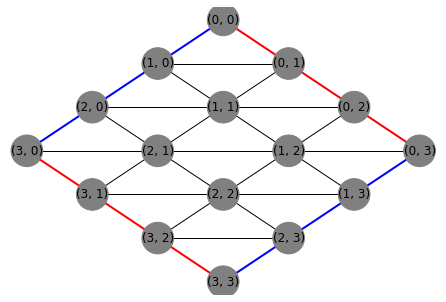

In [2]:
hex = Hex((4,4))
hex.display_board()

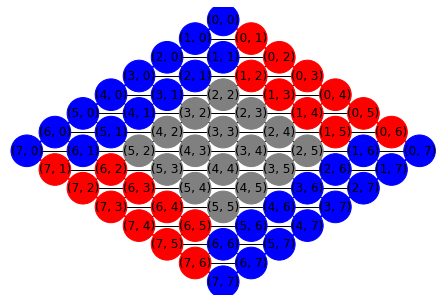

In [3]:
encoder.create_padded_env(hex, padding=2).display_board()

In [6]:
hex = Hex((4,4))
encoder = HexEncoder(padding=2)

actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(90,50,16),
             filters=(128, 128, 64),
             kernel_sizes=((4,4),(3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
              
            
                

In [7]:
#mcts = MCTS(target_policy=actor)
agent = Agent(actor)

In [8]:
agent.train_agent(hex, n_episodes=350, n_simulations=500, epochs=10, M=7)

  0%|          | 0/350 [00:00<?, ?it/s]

Epoch 1/10
1/1 [==============================] - 1s 584ms/step - loss: 2.7673 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 2.7076 - accuracy: 0.1818
Epoch 3/10
1/1 [==============================] - 0s 43ms/step - loss: 2.6540 - accuracy: 0.1818
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 2.5963 - accuracy: 0.1818
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 2.5489 - accuracy: 0.1818
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 2.4901 - accuracy: 0.2727
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4360 - accuracy: 0.2727
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3787 - accuracy: 0.2727
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 2.3272 - accuracy: 0.3636
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 2.2800 - accuracy: 0.2727


  0%|          | 1/350 [07:23<42:57:47, 443.17s/it]

Epoch 1/10
1/1 [==============================] - 0s 21ms/step - loss: 2.8139 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 2.6746 - accuracy: 0.2083
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 2.6081 - accuracy: 0.2083
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 2.5604 - accuracy: 0.2083
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 2.5181 - accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 2.4882 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 2.4540 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 2.4153 - accuracy: 0.2917
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 2.3708 - accuracy: 0.2917
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 2.3246 - accuracy: 0.2500


  1%|          | 2/350 [13:35<40:46:45, 421.86s/it]

Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 2.5301 - accuracy: 0.2162
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 2.5033 - accuracy: 0.2432
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 2.4648 - accuracy: 0.2432
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 2.4224 - accuracy: 0.2703
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 2.3807 - accuracy: 0.2703
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 2.3422 - accuracy: 0.3243
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 2.3063 - accuracy: 0.3243
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 2.2710 - accuracy: 0.3514
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 2.2365 - accuracy: 0.3784
Epoch 10/10
1/1 [==============================] - 0s 18ms/step - loss: 2.2028 - accuracy: 0.3514


  1%|          | 3/350 [20:02<39:38:59, 411.35s/it]

Epoch 1/10
1/1 [==============================] - 0s 14ms/step - loss: 2.3512 - accuracy: 0.3000
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 2.3159 - accuracy: 0.2600
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 2.2749 - accuracy: 0.3000
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 2.2403 - accuracy: 0.3400
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 2.2033 - accuracy: 0.3400
Epoch 6/10
1/1 [==============================] - 0s 18ms/step - loss: 2.1596 - accuracy: 0.3600
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 2.1213 - accuracy: 0.4200
Epoch 8/10
1/1 [==============================] - 0s 19ms/step - loss: 2.0867 - accuracy: 0.4000
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 2.0512 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 32ms/step - loss: 2.0172 - accuracy: 0.4000


  1%|          | 4/350 [24:33<35:30:41, 369.48s/it]

Epoch 1/10
1/1 [==============================] - 0s 16ms/step - loss: 2.2534 - accuracy: 0.3594
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 2.2082 - accuracy: 0.3906
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 2.1480 - accuracy: 0.3906
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 2.1157 - accuracy: 0.3594
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 2.0737 - accuracy: 0.4219
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 2.0390 - accuracy: 0.4219
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 2.0058 - accuracy: 0.4375
Epoch 8/10
1/1 [==============================] - 0s 26ms/step - loss: 1.9703 - accuracy: 0.4688
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9463 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 20ms/step - loss: 1.9180 - accuracy: 0.5469


  1%|▏         | 5/350 [30:22<34:47:38, 363.07s/it]

Epoch 1/10
1/1 [==============================] - 0s 19ms/step - loss: 2.0860 - accuracy: 0.4400
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 2.0453 - accuracy: 0.4933
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 2.0238 - accuracy: 0.5333
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 1.9957 - accuracy: 0.5467
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9744 - accuracy: 0.5200
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 1.9484 - accuracy: 0.5333
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9227 - accuracy: 0.5467
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 1.9046 - accuracy: 0.5733
Epoch 9/10
1/1 [==============================] - 0s 31ms/step - loss: 1.8876 - accuracy: 0.5467
Epoch 10/10
1/1 [==============================] - 0s 34ms/step - loss: 1.8739 - accuracy: 0.5600


  2%|▏         | 6/350 [35:29<33:05:37, 346.33s/it]

Epoch 1/10
1/1 [==============================] - 0s 21ms/step - loss: 2.0414 - accuracy: 0.5116
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 2.0198 - accuracy: 0.5116
Epoch 3/10
1/1 [==============================] - 0s 29ms/step - loss: 1.9955 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 26ms/step - loss: 1.9748 - accuracy: 0.5233
Epoch 5/10
1/1 [==============================] - 0s 29ms/step - loss: 1.9575 - accuracy: 0.5116
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 1.9370 - accuracy: 0.5116
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: 1.9205 - accuracy: 0.5116
Epoch 8/10
1/1 [==============================] - 0s 39ms/step - loss: 1.9103 - accuracy: 0.5116
Epoch 9/10
1/1 [==============================] - 0s 33ms/step - loss: 1.8975 - accuracy: 0.5116
Epoch 10/10
1/1 [==============================] - 0s 30ms/step - loss: 1.8871 - accuracy: 0.5116


  2%|▏         | 7/350 [41:34<33:32:59, 352.13s/it]

Epoch 1/10
1/1 [==============================] - 0s 21ms/step - loss: 2.0015 - accuracy: 0.4737
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 1.9781 - accuracy: 0.4632
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 1.9556 - accuracy: 0.4632
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 1.9438 - accuracy: 0.5053
Epoch 5/10
1/1 [==============================] - 0s 32ms/step - loss: 1.9227 - accuracy: 0.4842
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 1.9085 - accuracy: 0.5368
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 1.8974 - accuracy: 0.5158
Epoch 8/10
1/1 [==============================] - 0s 31ms/step - loss: 1.8862 - accuracy: 0.5053
Epoch 9/10
1/1 [==============================] - 0s 30ms/step - loss: 1.8788 - accuracy: 0.5263
Epoch 10/10
1/1 [==============================] - 0s 31ms/step - loss: 1.8610 - accuracy: 0.5158


  2%|▏         | 8/350 [46:41<32:09:35, 338.53s/it]

Epoch 1/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9787 - accuracy: 0.4952
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 1.9582 - accuracy: 0.5143
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 1.9424 - accuracy: 0.5143
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 1.9238 - accuracy: 0.5429
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 1.9122 - accuracy: 0.5714
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 1.8987 - accuracy: 0.5619
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 1.8856 - accuracy: 0.5524
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 1.8739 - accuracy: 0.5333
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 1.8673 - accuracy: 0.5238
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8553 - accuracy: 0.5524


  3%|▎         | 9/350 [52:38<32:35:47, 344.13s/it]

Epoch 1/10
1/1 [==============================] - 0s 25ms/step - loss: 1.9395 - accuracy: 0.4957
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 1.9306 - accuracy: 0.5128
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 1.9026 - accuracy: 0.5128
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 1.8938 - accuracy: 0.5043
Epoch 5/10
1/1 [==============================] - 0s 25ms/step - loss: 1.8762 - accuracy: 0.5214
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 1.8611 - accuracy: 0.5214
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 1.8522 - accuracy: 0.5299
Epoch 8/10
1/1 [==============================] - 0s 24ms/step - loss: 1.8361 - accuracy: 0.5470
Epoch 9/10
1/1 [==============================] - 0s 25ms/step - loss: 1.8231 - accuracy: 0.5641
Epoch 10/10
1/1 [==============================] - 0s 29ms/step - loss: 1.8118 - accuracy: 0.5812


  3%|▎         | 10/350 [58:27<32:38:00, 345.53s/it]

Epoch 1/10
1/1 [==============================] - 0s 36ms/step - loss: 1.8584 - accuracy: 0.5645
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 1.8471 - accuracy: 0.5726
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8375 - accuracy: 0.5565
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.8250 - accuracy: 0.5645
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 1.8175 - accuracy: 0.5726
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8100 - accuracy: 0.5645
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 1.8020 - accuracy: 0.5726
Epoch 8/10
1/1 [==============================] - 0s 26ms/step - loss: 1.7942 - accuracy: 0.5645
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 1.7858 - accuracy: 0.5565
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 1.7781 - accuracy: 0.5726


  3%|▎         | 11/350 [1:03:18<31:00:14, 329.25s/it]

Epoch 1/10
2/2 [==============================] - 0s 7ms/step - loss: 1.8733 - accuracy: 0.5338
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 1.8895 - accuracy: 0.5489
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 2.0076 - accuracy: 0.4361
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 1.9626 - accuracy: 0.4511
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1110 - accuracy: 0.4211
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1304 - accuracy: 0.4737
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1809 - accuracy: 0.3835
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1602 - accuracy: 0.3985
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 2.2699 - accuracy: 0.3233
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1337 - accuracy: 0.4211


  3%|▎         | 12/350 [1:10:06<33:07:09, 352.75s/it]

Epoch 1/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2366 - accuracy: 0.3724
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1985 - accuracy: 0.3862
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1424 - accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1140 - accuracy: 0.4552
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 2.0845 - accuracy: 0.4483
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 2.0492 - accuracy: 0.4483
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0063 - accuracy: 0.4621
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 1.9671 - accuracy: 0.4966
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 1.9375 - accuracy: 0.4966
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 1.9211 - accuracy: 0.4828


  4%|▎         | 13/350 [1:14:38<30:45:24, 328.56s/it]

Epoch 1/10
2/2 [==============================] - 0s 11ms/step - loss: 1.9761 - accuracy: 0.4688
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 1.9370 - accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 1.9228 - accuracy: 0.5188
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8950 - accuracy: 0.5250
Epoch 5/10
2/2 [==============================] - 0s 11ms/step - loss: 1.8793 - accuracy: 0.5063
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 1.8657 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 1.8461 - accuracy: 0.5125
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 1.8303 - accuracy: 0.5250
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8133 - accuracy: 0.5625
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8036 - accuracy: 0.5813


  4%|▍         | 14/350 [1:21:26<32:53:16, 352.37s/it]

Epoch 1/10
2/2 [==============================] - 0s 12ms/step - loss: 1.8480 - accuracy: 0.5503
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 1.8392 - accuracy: 0.5503
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 1.8268 - accuracy: 0.5680
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 1.8188 - accuracy: 0.5562
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 1.8106 - accuracy: 0.5740
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 1.7980 - accuracy: 0.5917
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7914 - accuracy: 0.5976
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7868 - accuracy: 0.6095
Epoch 9/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7781 - accuracy: 0.6036
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 1.7724 - accuracy: 0.6095


  4%|▍         | 15/350 [1:27:38<33:20:13, 358.25s/it]

Epoch 1/10
2/2 [==============================] - 0s 15ms/step - loss: 1.8579 - accuracy: 0.5801
Epoch 2/10
2/2 [==============================] - 0s 14ms/step - loss: 1.8408 - accuracy: 0.5580
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 1.8294 - accuracy: 0.5746
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: 1.8180 - accuracy: 0.5746
Epoch 5/10
2/2 [==============================] - 0s 14ms/step - loss: 1.8086 - accuracy: 0.5580
Epoch 6/10
2/2 [==============================] - 0s 16ms/step - loss: 1.7959 - accuracy: 0.5525
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 1.7934 - accuracy: 0.5746
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7838 - accuracy: 0.5801
Epoch 9/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7830 - accuracy: 0.5801
Epoch 10/10
2/2 [==============================] - 0s 13ms/step - loss: 1.7732 - accuracy: 0.5967


  5%|▍         | 16/350 [1:33:52<33:40:58, 363.05s/it]

Epoch 1/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8193 - accuracy: 0.5608
Epoch 2/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8119 - accuracy: 0.5767
Epoch 3/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8090 - accuracy: 0.5820
Epoch 4/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8024 - accuracy: 0.5661
Epoch 5/10
2/2 [==============================] - 0s 16ms/step - loss: 1.7972 - accuracy: 0.5714
Epoch 6/10
2/2 [==============================] - 0s 16ms/step - loss: 1.7940 - accuracy: 0.5873
Epoch 7/10
2/2 [==============================] - 0s 17ms/step - loss: 1.7892 - accuracy: 0.5767
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 1.7877 - accuracy: 0.5661
Epoch 9/10
2/2 [==============================] - 0s 18ms/step - loss: 1.7824 - accuracy: 0.5820
Epoch 10/10
2/2 [==============================] - 0s 18ms/step - loss: 1.7820 - accuracy: 0.6085


  5%|▍         | 17/350 [1:39:58<33:39:25, 363.86s/it]

Epoch 1/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8461 - accuracy: 0.5758
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8368 - accuracy: 0.5657
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 1.8312 - accuracy: 0.5758
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: 1.8265 - accuracy: 0.5657
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8210 - accuracy: 0.5859
Epoch 6/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8182 - accuracy: 0.5859
Epoch 7/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8144 - accuracy: 0.5960
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8122 - accuracy: 0.5808
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 1.8078 - accuracy: 0.5808
Epoch 10/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8076 - accuracy: 0.5808


  5%|▌         | 18/350 [1:46:39<34:34:18, 374.88s/it]

Epoch 1/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8844 - accuracy: 0.5865
Epoch 2/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8772 - accuracy: 0.5673
Epoch 3/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8641 - accuracy: 0.5577
Epoch 4/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8568 - accuracy: 0.5721
Epoch 5/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8495 - accuracy: 0.5721
Epoch 6/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8432 - accuracy: 0.5673
Epoch 7/10
2/2 [==============================] - 0s 17ms/step - loss: 1.8375 - accuracy: 0.5962
Epoch 8/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8323 - accuracy: 0.5817
Epoch 9/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8289 - accuracy: 0.5865
Epoch 10/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8255 - accuracy: 0.5625


  5%|▌         | 19/350 [1:52:40<34:05:37, 370.81s/it]

Epoch 1/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8894 - accuracy: 0.5273
Epoch 2/10
2/2 [==============================] - 0s 18ms/step - loss: 1.8764 - accuracy: 0.5409
Epoch 3/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8593 - accuracy: 0.5273
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 1.8579 - accuracy: 0.5273
Epoch 5/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8495 - accuracy: 0.5455
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8435 - accuracy: 0.5409
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8392 - accuracy: 0.5364
Epoch 8/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8343 - accuracy: 0.5500
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8302 - accuracy: 0.5500
Epoch 10/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8291 - accuracy: 0.5591


  6%|▌         | 20/350 [1:59:49<35:35:02, 388.19s/it]

Epoch 1/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8769 - accuracy: 0.5388
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8640 - accuracy: 0.5259
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8585 - accuracy: 0.5388
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8503 - accuracy: 0.5431
Epoch 5/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8471 - accuracy: 0.5560
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8432 - accuracy: 0.5560
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8388 - accuracy: 0.5862
Epoch 8/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8354 - accuracy: 0.5862
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8336 - accuracy: 0.5647
Epoch 10/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8294 - accuracy: 0.5776


  6%|▌         | 21/350 [2:06:03<35:06:02, 384.08s/it]

Epoch 1/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8564 - accuracy: 0.5397
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8545 - accuracy: 0.5272
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8497 - accuracy: 0.5523
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 1.8469 - accuracy: 0.5439
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8441 - accuracy: 0.5314
Epoch 6/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8406 - accuracy: 0.5607
Epoch 7/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8385 - accuracy: 0.5565
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8357 - accuracy: 0.5649
Epoch 9/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8342 - accuracy: 0.5732
Epoch 10/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8315 - accuracy: 0.5816


  6%|▋         | 22/350 [2:11:18<33:06:33, 363.40s/it]

Epoch 1/10
2/2 [==============================] - 0s 25ms/step - loss: 1.8893 - accuracy: 0.5480
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 1.8837 - accuracy: 0.5280
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8745 - accuracy: 0.5440
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8706 - accuracy: 0.5480
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8654 - accuracy: 0.5480
Epoch 6/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8614 - accuracy: 0.5520
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 1.8588 - accuracy: 0.5480
Epoch 8/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8549 - accuracy: 0.5480
Epoch 9/10
2/2 [==============================] - 0s 22ms/step - loss: 1.8530 - accuracy: 0.5440
Epoch 10/10
2/2 [==============================] - 0s 27ms/step - loss: 1.8503 - accuracy: 0.5680


  7%|▋         | 23/350 [2:17:51<33:47:56, 372.10s/it]

Epoch 1/10
3/3 [==============================] - 0s 18ms/step - loss: 1.9006 - accuracy: 0.5379
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 1.9171 - accuracy: 0.5265
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 2.0246 - accuracy: 0.4508
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 2.1287 - accuracy: 0.3598
Epoch 5/10
3/3 [==============================] - 0s 35ms/step - loss: 2.0830 - accuracy: 0.4356
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 2.0807 - accuracy: 0.4091
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 2.0901 - accuracy: 0.4318
Epoch 8/10
3/3 [==============================] - 0s 14ms/step - loss: 2.0288 - accuracy: 0.4432
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 2.0192 - accuracy: 0.4318
Epoch 10/10
3/3 [==============================] - 0s 15ms/step - loss: 2.0111 - accuracy: 0.4394


  7%|▋         | 24/350 [2:24:05<33:44:32, 372.61s/it]

Epoch 1/10
3/3 [==============================] - 0s 16ms/step - loss: 2.0293 - accuracy: 0.4384
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 2.0466 - accuracy: 0.4529
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 2.0066 - accuracy: 0.4493
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.9772 - accuracy: 0.4783
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 1.9628 - accuracy: 0.4783
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 1.9570 - accuracy: 0.4746
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 1.9334 - accuracy: 0.4783
Epoch 8/10
3/3 [==============================] - 0s 20ms/step - loss: 1.9283 - accuracy: 0.4891
Epoch 9/10
3/3 [==============================] - 0s 24ms/step - loss: 1.9122 - accuracy: 0.4964
Epoch 10/10
3/3 [==============================] - 0s 16ms/step - loss: 1.9073 - accuracy: 0.5036


  7%|▋         | 25/350 [2:30:37<34:09:51, 378.44s/it]

Epoch 1/10
3/3 [==============================] - 0s 17ms/step - loss: 1.9261 - accuracy: 0.5052
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 1.9164 - accuracy: 0.5017
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 1.9076 - accuracy: 0.5017
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.9017 - accuracy: 0.5052
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8936 - accuracy: 0.5190
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8894 - accuracy: 0.5087
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8861 - accuracy: 0.4844
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8828 - accuracy: 0.5363
Epoch 9/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8801 - accuracy: 0.5190
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8778 - accuracy: 0.4913


  7%|▋         | 26/350 [2:37:50<35:32:52, 394.98s/it]

Epoch 1/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8961 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8902 - accuracy: 0.5034
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8872 - accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8824 - accuracy: 0.5135
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8795 - accuracy: 0.5304
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8771 - accuracy: 0.4899
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 1.8761 - accuracy: 0.5034
Epoch 8/10
3/3 [==============================] - 0s 18ms/step - loss: 1.8736 - accuracy: 0.5000
Epoch 9/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8707 - accuracy: 0.4932
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 1.8689 - accuracy: 0.5101


  8%|▊         | 27/350 [2:43:12<33:28:52, 373.17s/it]

Epoch 1/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8769 - accuracy: 0.5064
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 1.8711 - accuracy: 0.5064
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8620 - accuracy: 0.5192
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8557 - accuracy: 0.5224
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8528 - accuracy: 0.5321
Epoch 6/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8475 - accuracy: 0.5096
Epoch 7/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8418 - accuracy: 0.5417
Epoch 8/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8379 - accuracy: 0.5256
Epoch 9/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8362 - accuracy: 0.5256
Epoch 10/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8347 - accuracy: 0.5417


  8%|▊         | 28/350 [2:49:03<32:46:17, 366.39s/it]

Epoch 1/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8636 - accuracy: 0.5186
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 1.8585 - accuracy: 0.5186
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8550 - accuracy: 0.5217
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8518 - accuracy: 0.5373
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 1.8498 - accuracy: 0.5404
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8474 - accuracy: 0.5342
Epoch 7/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8453 - accuracy: 0.5404
Epoch 8/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8436 - accuracy: 0.5062
Epoch 9/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8410 - accuracy: 0.5124
Epoch 10/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8410 - accuracy: 0.5217


  8%|▊         | 29/350 [2:55:40<33:29:26, 375.60s/it]

Epoch 1/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8847 - accuracy: 0.4806
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 1.8685 - accuracy: 0.5224
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8608 - accuracy: 0.5254
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8550 - accuracy: 0.5134
Epoch 5/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8515 - accuracy: 0.5313
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8486 - accuracy: 0.5164
Epoch 7/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8446 - accuracy: 0.5373
Epoch 8/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8423 - accuracy: 0.5075
Epoch 9/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8396 - accuracy: 0.5075
Epoch 10/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8379 - accuracy: 0.4955


  9%|▊         | 30/350 [3:02:15<33:53:52, 381.35s/it]

Epoch 1/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8610 - accuracy: 0.5190
Epoch 2/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8582 - accuracy: 0.5131
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8555 - accuracy: 0.5131
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8521 - accuracy: 0.5248
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8500 - accuracy: 0.5044
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8472 - accuracy: 0.5335
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8453 - accuracy: 0.5160
Epoch 8/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8437 - accuracy: 0.5394
Epoch 9/10
3/3 [==============================] - 0s 20ms/step - loss: 1.8421 - accuracy: 0.5364
Epoch 10/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8412 - accuracy: 0.5190


  9%|▉         | 31/350 [3:07:50<32:33:36, 367.45s/it]

Epoch 1/10
3/3 [==============================] - 0s 24ms/step - loss: 1.8675 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: 1.8605 - accuracy: 0.4972
Epoch 3/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8570 - accuracy: 0.4972
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8531 - accuracy: 0.4915
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 1.8501 - accuracy: 0.4859
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 1.8474 - accuracy: 0.5141
Epoch 7/10
3/3 [==============================] - 0s 24ms/step - loss: 1.8462 - accuracy: 0.5282
Epoch 8/10
3/3 [==============================] - 0s 26ms/step - loss: 1.8462 - accuracy: 0.5226
Epoch 9/10
3/3 [==============================] - 0s 26ms/step - loss: 1.8442 - accuracy: 0.5085
Epoch 10/10
3/3 [==============================] - 0s 26ms/step - loss: 1.8426 - accuracy: 0.4972


  9%|▉         | 32/350 [3:13:51<32:16:56, 365.46s/it]

Epoch 1/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8733 - accuracy: 0.5288
Epoch 2/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8664 - accuracy: 0.4767
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8625 - accuracy: 0.5041
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8544 - accuracy: 0.4904
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8492 - accuracy: 0.5014
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8481 - accuracy: 0.5014
Epoch 7/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8431 - accuracy: 0.5041
Epoch 8/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8396 - accuracy: 0.5288
Epoch 9/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8388 - accuracy: 0.5096
Epoch 10/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8361 - accuracy: 0.5123


  9%|▉         | 33/350 [3:19:05<30:50:17, 350.21s/it]

Epoch 1/10
3/3 [==============================] - 0s 25ms/step - loss: 1.8603 - accuracy: 0.5026
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 1.8475 - accuracy: 0.5106
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 1.8412 - accuracy: 0.5238
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 1.8335 - accuracy: 0.5317
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 1.8274 - accuracy: 0.5344
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 1.8250 - accuracy: 0.5079
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 1.8230 - accuracy: 0.5317
Epoch 8/10
3/3 [==============================] - 0s 30ms/step - loss: 1.8188 - accuracy: 0.5212
Epoch 9/10
3/3 [==============================] - 0s 21ms/step - loss: 1.8167 - accuracy: 0.5344
Epoch 10/10
3/3 [==============================] - 0s 22ms/step - loss: 1.8139 - accuracy: 0.5423


 10%|▉         | 34/350 [3:24:52<30:39:14, 349.22s/it]

Epoch 1/10
4/4 [==============================] - 0s 16ms/step - loss: 1.8404 - accuracy: 0.5412
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 1.8459 - accuracy: 0.5129
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 1.8756 - accuracy: 0.4613
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8784 - accuracy: 0.4794
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 1.9116 - accuracy: 0.4588
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9731 - accuracy: 0.4304
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 2.0145 - accuracy: 0.4510
Epoch 8/10
4/4 [==============================] - 0s 16ms/step - loss: 2.0307 - accuracy: 0.4433
Epoch 9/10
4/4 [==============================] - 0s 18ms/step - loss: 2.0377 - accuracy: 0.3943
Epoch 10/10
4/4 [==============================] - 0s 17ms/step - loss: 2.0523 - accuracy: 0.4201


 10%|█         | 35/350 [3:32:07<32:48:15, 374.90s/it]

Epoch 1/10
4/4 [==============================] - 0s 18ms/step - loss: 2.0654 - accuracy: 0.4090
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 2.0200 - accuracy: 0.4314
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9883 - accuracy: 0.4314
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9688 - accuracy: 0.4389
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9443 - accuracy: 0.4763
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9225 - accuracy: 0.4838
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9078 - accuracy: 0.4688
Epoch 8/10
4/4 [==============================] - 0s 17ms/step - loss: 1.9031 - accuracy: 0.4813
Epoch 9/10
4/4 [==============================] - 0s 17ms/step - loss: 1.8924 - accuracy: 0.5037
Epoch 10/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8845 - accuracy: 0.5037


 10%|█         | 36/350 [3:39:08<33:53:56, 388.65s/it]

Epoch 1/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8962 - accuracy: 0.4988
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8888 - accuracy: 0.4988
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8797 - accuracy: 0.5134
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8780 - accuracy: 0.5208
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 1.8728 - accuracy: 0.5134
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 1.8685 - accuracy: 0.5037
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8686 - accuracy: 0.4890
Epoch 8/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8632 - accuracy: 0.4914
Epoch 9/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8588 - accuracy: 0.5159
Epoch 10/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8575 - accuracy: 0.5086


 11%|█         | 37/350 [3:45:17<33:16:30, 382.72s/it]

Epoch 1/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8728 - accuracy: 0.5120
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8666 - accuracy: 0.4880
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8645 - accuracy: 0.5120
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8617 - accuracy: 0.5024
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8582 - accuracy: 0.5096
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8569 - accuracy: 0.5024
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8554 - accuracy: 0.5120
Epoch 8/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8539 - accuracy: 0.5191
Epoch 9/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8523 - accuracy: 0.5215
Epoch 10/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8513 - accuracy: 0.5263


 11%|█         | 38/350 [3:51:01<32:10:46, 371.30s/it]

Epoch 1/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8799 - accuracy: 0.5069
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8664 - accuracy: 0.4861
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8630 - accuracy: 0.5208
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8578 - accuracy: 0.4699
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8545 - accuracy: 0.5278
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8516 - accuracy: 0.5162
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8495 - accuracy: 0.5208
Epoch 8/10
4/4 [==============================] - 0s 18ms/step - loss: 1.8469 - accuracy: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8450 - accuracy: 0.5185
Epoch 10/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8437 - accuracy: 0.5162


 11%|█         | 39/350 [3:57:30<32:32:00, 376.59s/it]

Epoch 1/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8778 - accuracy: 0.5181
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8664 - accuracy: 0.4910
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8635 - accuracy: 0.5158
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8593 - accuracy: 0.4887
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8583 - accuracy: 0.5339
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8544 - accuracy: 0.4910
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8519 - accuracy: 0.5339
Epoch 8/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8496 - accuracy: 0.5045
Epoch 9/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8476 - accuracy: 0.5294
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8466 - accuracy: 0.5158


 11%|█▏        | 40/350 [4:04:41<33:50:09, 392.93s/it]

Epoch 1/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8705 - accuracy: 0.5419
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8648 - accuracy: 0.4912
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8584 - accuracy: 0.5352
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8547 - accuracy: 0.5066
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8510 - accuracy: 0.5176
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8475 - accuracy: 0.5242
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8456 - accuracy: 0.5066
Epoch 8/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8425 - accuracy: 0.5242
Epoch 9/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8413 - accuracy: 0.5110
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8396 - accuracy: 0.5441


 12%|█▏        | 41/350 [4:11:12<33:39:57, 392.22s/it]

Epoch 1/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8509 - accuracy: 0.5259
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8469 - accuracy: 0.5108
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 1.8458 - accuracy: 0.5323
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8436 - accuracy: 0.5129
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8426 - accuracy: 0.5280
Epoch 6/10
4/4 [==============================] - 0s 24ms/step - loss: 1.8407 - accuracy: 0.5043
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8402 - accuracy: 0.5388
Epoch 8/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8393 - accuracy: 0.5129
Epoch 9/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8390 - accuracy: 0.5108
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 1.8379 - accuracy: 0.5280


 12%|█▏        | 42/350 [4:17:29<33:09:29, 387.56s/it]

Epoch 1/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8706 - accuracy: 0.5178
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8583 - accuracy: 0.4738
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8511 - accuracy: 0.5178
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8457 - accuracy: 0.5031
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8422 - accuracy: 0.5241
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 1.8383 - accuracy: 0.5304
Epoch 7/10
4/4 [==============================] - 0s 34ms/step - loss: 1.8378 - accuracy: 0.5010
Epoch 8/10
4/4 [==============================] - 0s 26ms/step - loss: 1.8360 - accuracy: 0.5136
Epoch 9/10
4/4 [==============================] - 0s 23ms/step - loss: 1.8346 - accuracy: 0.5178
Epoch 10/10
4/4 [==============================] - 0s 25ms/step - loss: 1.8337 - accuracy: 0.5115


 12%|█▏        | 43/350 [4:22:59<31:35:35, 370.47s/it]

Epoch 1/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8574 - accuracy: 0.5082
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8541 - accuracy: 0.5062
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8494 - accuracy: 0.5144
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8441 - accuracy: 0.5041
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8390 - accuracy: 0.5021
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8360 - accuracy: 0.5165
Epoch 7/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8342 - accuracy: 0.5309
Epoch 8/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8319 - accuracy: 0.5391
Epoch 9/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8297 - accuracy: 0.5267
Epoch 10/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8288 - accuracy: 0.5329


 13%|█▎        | 44/350 [4:27:51<29:29:15, 346.91s/it]

Epoch 1/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8406 - accuracy: 0.5121
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8375 - accuracy: 0.5121
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8347 - accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8316 - accuracy: 0.5223
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8290 - accuracy: 0.5445
Epoch 6/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8273 - accuracy: 0.5182
Epoch 7/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8230 - accuracy: 0.5425
Epoch 8/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8225 - accuracy: 0.5223
Epoch 9/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8195 - accuracy: 0.5364
Epoch 10/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8193 - accuracy: 0.5344


 13%|█▎        | 45/350 [4:31:32<26:10:55, 309.04s/it]

Epoch 1/10
4/4 [==============================] - 0s 23ms/step - loss: 1.8392 - accuracy: 0.5187
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8303 - accuracy: 0.5128
Epoch 3/10
4/4 [==============================] - 0s 35ms/step - loss: 1.8259 - accuracy: 0.5464
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 1.8222 - accuracy: 0.5128
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8199 - accuracy: 0.5266
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 1.8166 - accuracy: 0.5266
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8152 - accuracy: 0.5286
Epoch 8/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8122 - accuracy: 0.5464
Epoch 9/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8116 - accuracy: 0.5365
Epoch 10/10
4/4 [==============================] - 0s 22ms/step - loss: 1.8108 - accuracy: 0.5582


 13%|█▎        | 46/350 [4:37:36<27:28:56, 325.45s/it]

Epoch 1/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8272 - accuracy: 0.5048
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 1.8209 - accuracy: 0.5125
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 1.8248 - accuracy: 0.5241
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 1.8339 - accuracy: 0.4875
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 1.8699 - accuracy: 0.4894
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 1.9308 - accuracy: 0.4759
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 1.9501 - accuracy: 0.4374
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 1.9309 - accuracy: 0.4624
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 1.9293 - accuracy: 0.4701
Epoch 10/10
5/5 [==============================] - 0s 18ms/step - loss: 1.9248 - accuracy: 0.4547


 13%|█▎        | 47/350 [4:43:46<28:31:07, 338.84s/it]

Epoch 1/10
5/5 [==============================] - 0s 19ms/step - loss: 1.9106 - accuracy: 0.4746
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 1.9105 - accuracy: 0.4633
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8902 - accuracy: 0.5085
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 1.8735 - accuracy: 0.4972
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8658 - accuracy: 0.4972
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 1.8603 - accuracy: 0.5292
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8539 - accuracy: 0.4915
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8438 - accuracy: 0.5273
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8439 - accuracy: 0.5198
Epoch 10/10
5/5 [==============================] - 0s 29ms/step - loss: 1.8372 - accuracy: 0.5141


 14%|█▎        | 48/350 [4:50:47<30:29:29, 363.48s/it]

Epoch 1/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8508 - accuracy: 0.5305
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8409 - accuracy: 0.5046
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8340 - accuracy: 0.5139
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8269 - accuracy: 0.5305
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8210 - accuracy: 0.5342
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8172 - accuracy: 0.5416
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8136 - accuracy: 0.5231
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8120 - accuracy: 0.5231
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8079 - accuracy: 0.5157
Epoch 10/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8067 - accuracy: 0.5416


 14%|█▍        | 49/350 [4:56:19<29:37:13, 354.26s/it]

Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8318 - accuracy: 0.5100
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8264 - accuracy: 0.5299
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8227 - accuracy: 0.5172
Epoch 4/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8189 - accuracy: 0.5281
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8157 - accuracy: 0.5045
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8132 - accuracy: 0.5408
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8114 - accuracy: 0.5191
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8111 - accuracy: 0.5245
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8109 - accuracy: 0.5245
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8103 - accuracy: 0.5372


 14%|█▍        | 50/350 [5:02:54<30:31:42, 366.34s/it]

Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8293 - accuracy: 0.5089
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8223 - accuracy: 0.5375
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8185 - accuracy: 0.5196
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8147 - accuracy: 0.5375
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 1.8126 - accuracy: 0.5143
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8086 - accuracy: 0.5429
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8058 - accuracy: 0.5589
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8052 - accuracy: 0.5357
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 1.8028 - accuracy: 0.5357
Epoch 10/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8006 - accuracy: 0.5321


 15%|█▍        | 51/350 [5:06:54<27:16:23, 328.37s/it]

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8234 - accuracy: 0.5752
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8166 - accuracy: 0.5350
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8138 - accuracy: 0.5332
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8116 - accuracy: 0.5437
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8089 - accuracy: 0.5594
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8074 - accuracy: 0.5315
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8075 - accuracy: 0.5297
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8062 - accuracy: 0.5332
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8056 - accuracy: 0.5437
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8055 - accuracy: 0.5350


 15%|█▍        | 52/350 [5:13:03<28:12:26, 340.76s/it]

Epoch 1/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8249 - accuracy: 0.5419
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8189 - accuracy: 0.5333
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8122 - accuracy: 0.5436
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8095 - accuracy: 0.5487
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8074 - accuracy: 0.5282
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8058 - accuracy: 0.5521
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8050 - accuracy: 0.5282
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8048 - accuracy: 0.5436
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8032 - accuracy: 0.5368
Epoch 10/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8027 - accuracy: 0.5385


 15%|█▌        | 53/350 [5:18:19<27:29:04, 333.15s/it]

Epoch 1/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8332 - accuracy: 0.5134
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8218 - accuracy: 0.5284
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8165 - accuracy: 0.5368
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8140 - accuracy: 0.5368
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8117 - accuracy: 0.5284
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8074 - accuracy: 0.5334
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 1.8072 - accuracy: 0.5418
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8055 - accuracy: 0.5485
Epoch 9/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8046 - accuracy: 0.5151
Epoch 10/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8047 - accuracy: 0.5301


 15%|█▌        | 54/350 [5:24:06<27:44:48, 337.46s/it]

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8254 - accuracy: 0.5123
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8194 - accuracy: 0.5353
Epoch 3/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8181 - accuracy: 0.5238
Epoch 4/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8140 - accuracy: 0.5386
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 1.8106 - accuracy: 0.5222
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8091 - accuracy: 0.5517
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8081 - accuracy: 0.5369
Epoch 8/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8059 - accuracy: 0.5156
Epoch 9/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8048 - accuracy: 0.5435
Epoch 10/10
5/5 [==============================] - 0s 24ms/step - loss: 1.8044 - accuracy: 0.5468


 16%|█▌        | 55/350 [5:30:15<28:24:45, 346.73s/it]

Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8179 - accuracy: 0.5276
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8173 - accuracy: 0.5260
Epoch 3/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8164 - accuracy: 0.5471
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8149 - accuracy: 0.5292
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8131 - accuracy: 0.5276
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8135 - accuracy: 0.5308
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8129 - accuracy: 0.5227
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8137 - accuracy: 0.5292
Epoch 9/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8138 - accuracy: 0.5455
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 1.8129 - accuracy: 0.5325


 16%|█▌        | 56/350 [5:35:51<28:03:42, 343.62s/it]

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8277 - accuracy: 0.5104
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8237 - accuracy: 0.5360
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8218 - accuracy: 0.5104
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8197 - accuracy: 0.5264
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8192 - accuracy: 0.5232
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8189 - accuracy: 0.5280
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8199 - accuracy: 0.5184
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8186 - accuracy: 0.5296
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8173 - accuracy: 0.5440
Epoch 10/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8160 - accuracy: 0.5280


 16%|█▋        | 57/350 [5:41:31<27:52:43, 342.54s/it]

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8301 - accuracy: 0.5291
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8253 - accuracy: 0.5165
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8224 - accuracy: 0.5244
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8205 - accuracy: 0.5118
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8179 - accuracy: 0.5213
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8150 - accuracy: 0.5402
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8146 - accuracy: 0.5480
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 1.8148 - accuracy: 0.5370
Epoch 9/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8134 - accuracy: 0.5307
Epoch 10/10
5/5 [==============================] - 0s 23ms/step - loss: 1.8124 - accuracy: 0.5354


 17%|█▋        | 58/350 [5:46:53<27:17:48, 336.53s/it]

Epoch 1/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8219 - accuracy: 0.5481
Epoch 2/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8219 - accuracy: 0.5435
Epoch 3/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8571 - accuracy: 0.4798
Epoch 4/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8530 - accuracy: 0.5342
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8534 - accuracy: 0.4953
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8717 - accuracy: 0.5093
Epoch 7/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8813 - accuracy: 0.4814
Epoch 8/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8847 - accuracy: 0.5047
Epoch 9/10
6/6 [==============================] - 0s 18ms/step - loss: 1.9323 - accuracy: 0.4876
Epoch 10/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9611 - accuracy: 0.4503


 17%|█▋        | 59/350 [5:52:18<26:54:16, 332.84s/it]

Epoch 1/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9709 - accuracy: 0.4489
Epoch 2/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9608 - accuracy: 0.4458
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9412 - accuracy: 0.4779
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 1.9129 - accuracy: 0.4947
Epoch 5/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8918 - accuracy: 0.5008
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8761 - accuracy: 0.5053
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8639 - accuracy: 0.5145
Epoch 8/10
6/6 [==============================] - 0s 18ms/step - loss: 1.8582 - accuracy: 0.5176
Epoch 9/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8520 - accuracy: 0.5053
Epoch 10/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8423 - accuracy: 0.5145


 17%|█▋        | 60/350 [5:58:06<27:11:32, 337.56s/it]

Epoch 1/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8429 - accuracy: 0.5060
Epoch 2/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8370 - accuracy: 0.5076
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8396 - accuracy: 0.5181
Epoch 4/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8353 - accuracy: 0.5151
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8287 - accuracy: 0.5257
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8343 - accuracy: 0.5242
Epoch 7/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8359 - accuracy: 0.5136
Epoch 8/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8290 - accuracy: 0.5347
Epoch 9/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8269 - accuracy: 0.5211
Epoch 10/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8282 - accuracy: 0.5227


 17%|█▋        | 61/350 [6:02:55<25:54:42, 322.78s/it]

Epoch 1/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8433 - accuracy: 0.4970
Epoch 2/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8356 - accuracy: 0.5207
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8303 - accuracy: 0.5074
Epoch 4/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8277 - accuracy: 0.5311
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8230 - accuracy: 0.5340
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8221 - accuracy: 0.5266
Epoch 7/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8198 - accuracy: 0.5178
Epoch 8/10
6/6 [==============================] - 0s 19ms/step - loss: 1.8180 - accuracy: 0.5414
Epoch 9/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8154 - accuracy: 0.5429
Epoch 10/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8139 - accuracy: 0.5251


 18%|█▊        | 62/350 [6:09:04<26:55:58, 336.66s/it]

Epoch 1/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8363 - accuracy: 0.5204
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8294 - accuracy: 0.5175
Epoch 3/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8262 - accuracy: 0.5379
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8220 - accuracy: 0.5364
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8206 - accuracy: 0.5292
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8178 - accuracy: 0.5350
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8168 - accuracy: 0.5496
Epoch 8/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8160 - accuracy: 0.5510
Epoch 9/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8163 - accuracy: 0.5335
Epoch 10/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8168 - accuracy: 0.5539


 18%|█▊        | 63/350 [6:15:02<27:22:07, 343.30s/it]

Epoch 1/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8346 - accuracy: 0.5143
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8319 - accuracy: 0.5271
Epoch 3/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8294 - accuracy: 0.5329
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8252 - accuracy: 0.5329
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8225 - accuracy: 0.5200
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8217 - accuracy: 0.5214
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8188 - accuracy: 0.5200
Epoch 8/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8185 - accuracy: 0.5243
Epoch 9/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8183 - accuracy: 0.5286
Epoch 10/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8171 - accuracy: 0.5357


 18%|█▊        | 64/350 [6:20:35<27:01:38, 340.20s/it]

Epoch 1/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8351 - accuracy: 0.5316
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8270 - accuracy: 0.5316
Epoch 3/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8222 - accuracy: 0.5428
Epoch 4/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8173 - accuracy: 0.5386
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8155 - accuracy: 0.5372
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8127 - accuracy: 0.5273
Epoch 7/10
6/6 [==============================] - 0s 20ms/step - loss: 1.8114 - accuracy: 0.5372
Epoch 8/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8109 - accuracy: 0.5330
Epoch 9/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8103 - accuracy: 0.5652
Epoch 10/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8111 - accuracy: 0.5330


 19%|█▊        | 65/350 [6:25:20<25:36:31, 323.48s/it]

Epoch 1/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8281 - accuracy: 0.5427
Epoch 2/10
6/6 [==============================] - 0s 30ms/step - loss: 1.8203 - accuracy: 0.5234
Epoch 3/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8184 - accuracy: 0.5165
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8142 - accuracy: 0.5262
Epoch 5/10
6/6 [==============================] - 0s 25ms/step - loss: 1.8128 - accuracy: 0.5441
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8107 - accuracy: 0.5413
Epoch 7/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8095 - accuracy: 0.5372
Epoch 8/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8096 - accuracy: 0.5441
Epoch 9/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8084 - accuracy: 0.5482
Epoch 10/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8084 - accuracy: 0.5303


 19%|█▉        | 66/350 [6:31:38<26:48:38, 339.85s/it]

Epoch 1/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8229 - accuracy: 0.5353
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8157 - accuracy: 0.5394
Epoch 3/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8138 - accuracy: 0.5557
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8118 - accuracy: 0.5476
Epoch 5/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8092 - accuracy: 0.5462
Epoch 6/10
6/6 [==============================] - 0s 25ms/step - loss: 1.8066 - accuracy: 0.5639
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8046 - accuracy: 0.5448
Epoch 8/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8034 - accuracy: 0.5557
Epoch 9/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8029 - accuracy: 0.5584
Epoch 10/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8015 - accuracy: 0.5639


 19%|█▉        | 67/350 [6:36:50<26:03:19, 331.45s/it]

Epoch 1/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8176 - accuracy: 0.5490
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8136 - accuracy: 0.5584
Epoch 3/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8113 - accuracy: 0.5490
Epoch 4/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8098 - accuracy: 0.5450
Epoch 5/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8083 - accuracy: 0.5396
Epoch 6/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8071 - accuracy: 0.5530
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8053 - accuracy: 0.5477
Epoch 8/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8059 - accuracy: 0.5597
Epoch 9/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8054 - accuracy: 0.5664
Epoch 10/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8051 - accuracy: 0.5517


 19%|█▉        | 68/350 [6:42:26<26:05:00, 332.98s/it]

Epoch 1/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8186 - accuracy: 0.5298
Epoch 2/10
6/6 [==============================] - 0s 26ms/step - loss: 1.8158 - accuracy: 0.5444
Epoch 3/10
6/6 [==============================] - 0s 25ms/step - loss: 1.8143 - accuracy: 0.5417
Epoch 4/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8129 - accuracy: 0.5576
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8118 - accuracy: 0.5338
Epoch 6/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8115 - accuracy: 0.5523
Epoch 7/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8108 - accuracy: 0.5391
Epoch 8/10
6/6 [==============================] - 0s 26ms/step - loss: 1.8109 - accuracy: 0.5391
Epoch 9/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8098 - accuracy: 0.5457
Epoch 10/10
6/6 [==============================] - 0s 22ms/step - loss: 1.8092 - accuracy: 0.5510


 20%|█▉        | 69/350 [6:48:27<26:38:08, 341.24s/it]

Epoch 1/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8301 - accuracy: 0.5469
Epoch 2/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8244 - accuracy: 0.5560
Epoch 3/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8211 - accuracy: 0.5404
Epoch 4/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8175 - accuracy: 0.5417
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 1.8157 - accuracy: 0.5130
Epoch 6/10
6/6 [==============================] - 0s 24ms/step - loss: 1.8152 - accuracy: 0.5443
Epoch 7/10
6/6 [==============================] - 0s 25ms/step - loss: 1.8151 - accuracy: 0.5208
Epoch 8/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8143 - accuracy: 0.5404
Epoch 9/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8126 - accuracy: 0.5378
Epoch 10/10
6/6 [==============================] - 0s 23ms/step - loss: 1.8129 - accuracy: 0.5443


 20%|██        | 70/350 [6:54:37<27:12:58, 349.92s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8311 - accuracy: 0.5404
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8294 - accuracy: 0.5148
Epoch 3/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8326 - accuracy: 0.5045
Epoch 4/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8479 - accuracy: 0.5019
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8521 - accuracy: 0.4878
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8664 - accuracy: 0.5058
Epoch 7/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8626 - accuracy: 0.4994
Epoch 8/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8597 - accuracy: 0.5225
Epoch 9/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8477 - accuracy: 0.5135
Epoch 10/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8407 - accuracy: 0.5237


 20%|██        | 71/350 [7:00:39<27:24:41, 353.70s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8427 - accuracy: 0.5184
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8378 - accuracy: 0.5108
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8465 - accuracy: 0.4968
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8469 - accuracy: 0.5222
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8433 - accuracy: 0.5337
Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8389 - accuracy: 0.5248
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8312 - accuracy: 0.4981
Epoch 8/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8315 - accuracy: 0.5438
Epoch 9/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8306 - accuracy: 0.5273
Epoch 10/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8286 - accuracy: 0.5299


 21%|██        | 72/350 [7:06:00<26:32:09, 343.63s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8349 - accuracy: 0.5282
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8291 - accuracy: 0.5394
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8306 - accuracy: 0.5244
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8258 - accuracy: 0.5219
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8248 - accuracy: 0.5194
Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 1.8217 - accuracy: 0.5269
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8207 - accuracy: 0.5419
Epoch 8/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8186 - accuracy: 0.5382
Epoch 9/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8185 - accuracy: 0.5282
Epoch 10/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8190 - accuracy: 0.5432


 21%|██        | 73/350 [7:12:20<27:17:17, 354.65s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8275 - accuracy: 0.5425
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8249 - accuracy: 0.5191
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8225 - accuracy: 0.5253
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8202 - accuracy: 0.5277
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8174 - accuracy: 0.5413
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8167 - accuracy: 0.5401
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8156 - accuracy: 0.5413
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8163 - accuracy: 0.5216
Epoch 9/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8168 - accuracy: 0.5425
Epoch 10/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8147 - accuracy: 0.5376


 21%|██        | 74/350 [7:18:00<26:51:31, 350.33s/it]

Epoch 1/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8329 - accuracy: 0.5473
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8261 - accuracy: 0.5510
Epoch 3/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8218 - accuracy: 0.5376
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8196 - accuracy: 0.5340
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8169 - accuracy: 0.5267
Epoch 6/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8163 - accuracy: 0.5340
Epoch 7/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8159 - accuracy: 0.5267
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8146 - accuracy: 0.5352
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8138 - accuracy: 0.5498
Epoch 10/10
7/7 [==============================] - 0s 27ms/step - loss: 1.8126 - accuracy: 0.5340


 21%|██▏       | 75/350 [7:23:53<26:49:14, 351.11s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8287 - accuracy: 0.5419
Epoch 2/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8236 - accuracy: 0.5311
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8209 - accuracy: 0.5502
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8183 - accuracy: 0.5359
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8174 - accuracy: 0.5371
Epoch 6/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8160 - accuracy: 0.5419
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8154 - accuracy: 0.5478
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8146 - accuracy: 0.5323
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8137 - accuracy: 0.5299
Epoch 10/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8140 - accuracy: 0.5514


 22%|██▏       | 76/350 [7:30:04<27:10:03, 356.95s/it]

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8278 - accuracy: 0.5195
Epoch 2/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8249 - accuracy: 0.5360
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8228 - accuracy: 0.5443
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8215 - accuracy: 0.5478
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8207 - accuracy: 0.5514
Epoch 6/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8199 - accuracy: 0.5478
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8188 - accuracy: 0.5396
Epoch 8/10
7/7 [==============================] - 0s 25ms/step - loss: 1.8186 - accuracy: 0.5490
Epoch 9/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8172 - accuracy: 0.5702
Epoch 10/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8159 - accuracy: 0.5277


 22%|██▏       | 77/350 [7:35:56<26:57:46, 355.56s/it]

Epoch 1/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8272 - accuracy: 0.5239
Epoch 2/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8237 - accuracy: 0.5298
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8207 - accuracy: 0.5123
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8194 - accuracy: 0.5379
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8193 - accuracy: 0.5344
Epoch 6/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8176 - accuracy: 0.5426
Epoch 7/10
7/7 [==============================] - 0s 35ms/step - loss: 1.8172 - accuracy: 0.5554
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8170 - accuracy: 0.5391
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8164 - accuracy: 0.5659
Epoch 10/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8159 - accuracy: 0.5496


 22%|██▏       | 78/350 [7:42:03<27:07:18, 358.96s/it]

Epoch 1/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8349 - accuracy: 0.5276
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8303 - accuracy: 0.5207
Epoch 3/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8259 - accuracy: 0.5426
Epoch 4/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8226 - accuracy: 0.5357
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8215 - accuracy: 0.5300
Epoch 6/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8189 - accuracy: 0.5438
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8185 - accuracy: 0.5541
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8173 - accuracy: 0.5495
Epoch 9/10
7/7 [==============================] - 0s 21ms/step - loss: 1.8167 - accuracy: 0.5518
Epoch 10/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8173 - accuracy: 0.5311


 23%|██▎       | 79/350 [7:47:58<26:56:03, 357.80s/it]

Epoch 1/10
7/7 [==============================] - 0s 24ms/step - loss: 1.8321 - accuracy: 0.5436
Epoch 2/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8263 - accuracy: 0.5130
Epoch 3/10
7/7 [==============================] - 0s 24ms/step - loss: 1.8210 - accuracy: 0.5255
Epoch 4/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8191 - accuracy: 0.5243
Epoch 5/10
7/7 [==============================] - 0s 25ms/step - loss: 1.8169 - accuracy: 0.5345
Epoch 6/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8154 - accuracy: 0.5232
Epoch 7/10
7/7 [==============================] - 0s 25ms/step - loss: 1.8155 - accuracy: 0.5345
Epoch 8/10
7/7 [==============================] - 0s 27ms/step - loss: 1.8156 - accuracy: 0.5572
Epoch 9/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8138 - accuracy: 0.5311
Epoch 10/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8128 - accuracy: 0.5402


 23%|██▎       | 80/350 [7:54:08<27:06:02, 361.34s/it]

Epoch 1/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8308 - accuracy: 0.5268
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8239 - accuracy: 0.5268
Epoch 3/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8214 - accuracy: 0.5290
Epoch 4/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8182 - accuracy: 0.5379
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8151 - accuracy: 0.5525
Epoch 6/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8139 - accuracy: 0.5402
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8138 - accuracy: 0.5201
Epoch 8/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8126 - accuracy: 0.5446
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 1.8118 - accuracy: 0.5469
Epoch 10/10
7/7 [==============================] - 0s 23ms/step - loss: 1.8103 - accuracy: 0.5513


 23%|██▎       | 81/350 [8:00:15<27:07:36, 363.04s/it]

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8246 - accuracy: 0.5237
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8212 - accuracy: 0.5336
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8355 - accuracy: 0.5149
Epoch 4/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8450 - accuracy: 0.5182
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 1.8431 - accuracy: 0.5006
Epoch 6/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8430 - accuracy: 0.4851
Epoch 7/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8465 - accuracy: 0.4895
Epoch 8/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8413 - accuracy: 0.4961
Epoch 9/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8345 - accuracy: 0.5149
Epoch 10/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8324 - accuracy: 0.5171


 23%|██▎       | 82/350 [8:06:23<27:08:11, 364.52s/it]

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8403 - accuracy: 0.5147
Epoch 2/10
8/8 [==============================] - 0s 25ms/step - loss: 1.8368 - accuracy: 0.5223
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8325 - accuracy: 0.5266
Epoch 4/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8327 - accuracy: 0.5299
Epoch 5/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8273 - accuracy: 0.5168
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8285 - accuracy: 0.4940
Epoch 7/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8248 - accuracy: 0.5136
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8252 - accuracy: 0.5190
Epoch 9/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8247 - accuracy: 0.5125
Epoch 10/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8197 - accuracy: 0.5233


 24%|██▎       | 83/350 [8:12:34<27:11:10, 366.56s/it]

Epoch 1/10
8/8 [==============================] - 0s 25ms/step - loss: 1.8296 - accuracy: 0.5273
Epoch 2/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8266 - accuracy: 0.5176
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8199 - accuracy: 0.5241
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8146 - accuracy: 0.5230
Epoch 5/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8104 - accuracy: 0.5262
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8078 - accuracy: 0.5348
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8056 - accuracy: 0.5369
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8046 - accuracy: 0.5305
Epoch 9/10
8/8 [==============================] - 0s 26ms/step - loss: 1.8046 - accuracy: 0.5187
Epoch 10/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8041 - accuracy: 0.5412


 24%|██▍       | 84/350 [8:18:01<26:12:34, 354.72s/it]

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8163 - accuracy: 0.5269
Epoch 2/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8129 - accuracy: 0.5206
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8087 - accuracy: 0.5375
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8056 - accuracy: 0.5322
Epoch 5/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8045 - accuracy: 0.5533
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8037 - accuracy: 0.5301
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8023 - accuracy: 0.5576
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8036 - accuracy: 0.5502
Epoch 9/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8013 - accuracy: 0.5438
Epoch 10/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7998 - accuracy: 0.5343


 24%|██▍       | 85/350 [8:23:52<26:01:53, 353.64s/it]

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8105 - accuracy: 0.5506
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 1.8068 - accuracy: 0.5203
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8046 - accuracy: 0.5308
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8023 - accuracy: 0.5328
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8018 - accuracy: 0.5464
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8015 - accuracy: 0.5349
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8030 - accuracy: 0.5297
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8007 - accuracy: 0.5485
Epoch 9/10
8/8 [==============================] - 0s 27ms/step - loss: 1.7997 - accuracy: 0.5203
Epoch 10/10
8/8 [==============================] - 0s 24ms/step - loss: 1.7983 - accuracy: 0.5360


 25%|██▍       | 86/350 [8:29:25<25:28:56, 347.49s/it]

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8156 - accuracy: 0.5438
Epoch 2/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8097 - accuracy: 0.5304
Epoch 3/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8043 - accuracy: 0.5427
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8028 - accuracy: 0.5458
Epoch 5/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8008 - accuracy: 0.5170
Epoch 6/10
8/8 [==============================] - 0s 26ms/step - loss: 1.7999 - accuracy: 0.5139
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8004 - accuracy: 0.5448
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7996 - accuracy: 0.5510
Epoch 9/10
8/8 [==============================] - 0s 21ms/step - loss: 1.7997 - accuracy: 0.5407
Epoch 10/10
8/8 [==============================] - 0s 21ms/step - loss: 1.7981 - accuracy: 0.5499


 25%|██▍       | 87/350 [8:35:51<26:12:51, 358.83s/it]

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8102 - accuracy: 0.5315
Epoch 2/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8103 - accuracy: 0.5102
Epoch 3/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8075 - accuracy: 0.5396
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 1.8052 - accuracy: 0.5274
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8043 - accuracy: 0.5295
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8025 - accuracy: 0.5549
Epoch 7/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8016 - accuracy: 0.5427
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8014 - accuracy: 0.5478
Epoch 9/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8006 - accuracy: 0.5549
Epoch 10/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7981 - accuracy: 0.5305


 25%|██▌       | 88/350 [8:41:51<26:09:14, 359.37s/it]

Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 1.8107 - accuracy: 0.5361
Epoch 2/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8059 - accuracy: 0.5301
Epoch 3/10
8/8 [==============================] - 0s 22ms/step - loss: 1.8022 - accuracy: 0.5261
Epoch 4/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7989 - accuracy: 0.5381
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7980 - accuracy: 0.5261
Epoch 6/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7967 - accuracy: 0.5601
Epoch 7/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7965 - accuracy: 0.5451
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7954 - accuracy: 0.5491
Epoch 9/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7955 - accuracy: 0.5561
Epoch 10/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7936 - accuracy: 0.5311


 25%|██▌       | 89/350 [8:47:41<25:50:49, 356.51s/it]

Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 1.8032 - accuracy: 0.5357
Epoch 2/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7987 - accuracy: 0.5317
Epoch 3/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7967 - accuracy: 0.5407
Epoch 4/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7960 - accuracy: 0.5258
Epoch 5/10
8/8 [==============================] - 0s 24ms/step - loss: 1.7940 - accuracy: 0.5595
Epoch 6/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7938 - accuracy: 0.5486
Epoch 7/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7934 - accuracy: 0.5516
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 1.7945 - accuracy: 0.5486
Epoch 9/10
8/8 [==============================] - 0s 22ms/step - loss: 1.7941 - accuracy: 0.5536
Epoch 10/10
8/8 [==============================] - 0s 23ms/step - loss: 1.7942 - accuracy: 0.5556


 26%|██▌       | 90/350 [8:53:10<25:09:29, 348.34s/it]

Epoch 1/10
8/8 [==============================] - 0s 29ms/step - loss: 1.8098 - accuracy: 0.5323
Epoch 2/10
8/8 [==============================] - 0s 27ms/step - loss: 1.8073 - accuracy: 0.5382
Epoch 3/10
8/8 [==============================] - 0s 26ms/step - loss: 1.8040 - accuracy: 0.5460
Epoch 4/10
8/8 [==============================] - 0s 26ms/step - loss: 1.8013 - accuracy: 0.5225
Epoch 5/10
8/8 [==============================] - 0s 27ms/step - loss: 1.8001 - accuracy: 0.5313
Epoch 6/10
8/8 [==============================] - 0s 25ms/step - loss: 1.7983 - accuracy: 0.5235
Epoch 7/10
8/8 [==============================] - 0s 26ms/step - loss: 1.7983 - accuracy: 0.5597
Epoch 8/10
8/8 [==============================] - 0s 28ms/step - loss: 1.7968 - accuracy: 0.5548
Epoch 9/10
8/8 [==============================] - 0s 27ms/step - loss: 1.7964 - accuracy: 0.5528
Epoch 10/10
8/8 [==============================] - 0s 27ms/step - loss: 1.7949 - accuracy: 0.5391


 26%|██▌       | 91/350 [8:59:25<25:37:21, 356.15s/it]

Epoch 1/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8094 - accuracy: 0.5402
Epoch 2/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8112 - accuracy: 0.5489
Epoch 3/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8105 - accuracy: 0.5208
Epoch 4/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8248 - accuracy: 0.5053
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8228 - accuracy: 0.5266
Epoch 6/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8255 - accuracy: 0.5208
Epoch 7/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8278 - accuracy: 0.5102
Epoch 8/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8430 - accuracy: 0.5150
Epoch 9/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8340 - accuracy: 0.5082
Epoch 10/10
9/9 [==============================] - 0s 24ms/step - loss: 1.8308 - accuracy: 0.5063


 26%|██▋       | 92/350 [9:05:27<25:39:31, 358.03s/it]

Epoch 1/10
9/9 [==============================] - 0s 26ms/step - loss: 1.8399 - accuracy: 0.5043
Epoch 2/10
9/9 [==============================] - 0s 24ms/step - loss: 1.8327 - accuracy: 0.5081
Epoch 3/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8227 - accuracy: 0.5196
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8210 - accuracy: 0.5320
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8142 - accuracy: 0.5330
Epoch 6/10
9/9 [==============================] - 0s 24ms/step - loss: 1.8127 - accuracy: 0.5406
Epoch 7/10
9/9 [==============================] - 0s 25ms/step - loss: 1.8129 - accuracy: 0.5291
Epoch 8/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8089 - accuracy: 0.5282
Epoch 9/10
9/9 [==============================] - 0s 24ms/step - loss: 1.8062 - accuracy: 0.5263
Epoch 10/10
9/9 [==============================] - 0s 31ms/step - loss: 1.8052 - accuracy: 0.5415


 27%|██▋       | 93/350 [9:12:35<27:03:45, 379.09s/it]

Epoch 1/10
9/9 [==============================] - 0s 22ms/step - loss: 1.8179 - accuracy: 0.5274
Epoch 2/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8098 - accuracy: 0.5369
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.8075 - accuracy: 0.5170
Epoch 4/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8050 - accuracy: 0.5331
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8069 - accuracy: 0.5217
Epoch 6/10
9/9 [==============================] - 0s 23ms/step - loss: 1.8085 - accuracy: 0.5397
Epoch 7/10
9/9 [==============================] - 0s 24ms/step - loss: 1.8047 - accuracy: 0.5255
Epoch 8/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8019 - accuracy: 0.5454
Epoch 9/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8013 - accuracy: 0.5331
Epoch 10/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8025 - accuracy: 0.5510


 27%|██▋       | 94/350 [9:18:44<26:43:53, 375.91s/it]

Epoch 1/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8157 - accuracy: 0.5154
Epoch 2/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8072 - accuracy: 0.5247
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.8035 - accuracy: 0.5500
Epoch 4/10
9/9 [==============================] - 0s 21ms/step - loss: 1.8002 - accuracy: 0.5528
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7992 - accuracy: 0.5294
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7968 - accuracy: 0.5462
Epoch 7/10
9/9 [==============================] - 0s 22ms/step - loss: 1.7953 - accuracy: 0.5509
Epoch 8/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7950 - accuracy: 0.5313
Epoch 9/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7957 - accuracy: 0.5378
Epoch 10/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7943 - accuracy: 0.5415


 27%|██▋       | 95/350 [9:25:03<26:42:12, 376.99s/it]

Epoch 1/10
9/9 [==============================] - 0s 22ms/step - loss: 1.8046 - accuracy: 0.5309
Epoch 2/10
9/9 [==============================] - 0s 22ms/step - loss: 1.7993 - accuracy: 0.5374
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.7959 - accuracy: 0.5365
Epoch 4/10
9/9 [==============================] - 0s 22ms/step - loss: 1.7952 - accuracy: 0.5586
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7940 - accuracy: 0.5365
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7927 - accuracy: 0.5485
Epoch 7/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7926 - accuracy: 0.5559
Epoch 8/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7922 - accuracy: 0.5559
Epoch 9/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7904 - accuracy: 0.5623
Epoch 10/10
9/9 [==============================] - 0s 21ms/step - loss: 1.7902 - accuracy: 0.5596


 27%|██▋       | 96/350 [9:30:52<26:00:02, 368.51s/it]

Epoch 1/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7970 - accuracy: 0.5430
Epoch 2/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7946 - accuracy: 0.5577
Epoch 3/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7942 - accuracy: 0.5449
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7925 - accuracy: 0.5440
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7925 - accuracy: 0.5549
Epoch 6/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7933 - accuracy: 0.5522
Epoch 7/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7937 - accuracy: 0.5632
Epoch 8/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7933 - accuracy: 0.5366
Epoch 9/10
9/9 [==============================] - 0s 50ms/step - loss: 1.7921 - accuracy: 0.5513
Epoch 10/10
9/9 [==============================] - 0s 42ms/step - loss: 1.7928 - accuracy: 0.5632


 28%|██▊       | 97/350 [9:36:47<25:36:21, 364.35s/it]

Epoch 1/10
9/9 [==============================] - 0s 28ms/step - loss: 1.8043 - accuracy: 0.5181
Epoch 2/10
9/9 [==============================] - 0s 27ms/step - loss: 1.8004 - accuracy: 0.5453
Epoch 3/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7975 - accuracy: 0.5290
Epoch 4/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7960 - accuracy: 0.5426
Epoch 5/10
9/9 [==============================] - 0s 31ms/step - loss: 1.7937 - accuracy: 0.5525
Epoch 6/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7927 - accuracy: 0.5571
Epoch 7/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7938 - accuracy: 0.5498
Epoch 8/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7931 - accuracy: 0.5598
Epoch 9/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7925 - accuracy: 0.5525
Epoch 10/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7917 - accuracy: 0.5516


 28%|██▊       | 98/350 [9:42:47<25:25:02, 363.11s/it]

Epoch 1/10
9/9 [==============================] - 0s 37ms/step - loss: 1.8051 - accuracy: 0.5488
Epoch 2/10
9/9 [==============================] - 0s 27ms/step - loss: 1.8008 - accuracy: 0.5380
Epoch 3/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7975 - accuracy: 0.5309
Epoch 4/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7943 - accuracy: 0.5372
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7922 - accuracy: 0.5336
Epoch 6/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7921 - accuracy: 0.5479
Epoch 7/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7897 - accuracy: 0.5497
Epoch 8/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7883 - accuracy: 0.5515
Epoch 9/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7874 - accuracy: 0.5479
Epoch 10/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7870 - accuracy: 0.5551


 28%|██▊       | 99/350 [9:49:14<25:49:19, 370.36s/it]

Epoch 1/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7945 - accuracy: 0.5403
Epoch 2/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7923 - accuracy: 0.5438
Epoch 3/10
9/9 [==============================] - 0s 24ms/step - loss: 1.7894 - accuracy: 0.5509
Epoch 4/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7879 - accuracy: 0.5279
Epoch 5/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7872 - accuracy: 0.5359
Epoch 6/10
9/9 [==============================] - 0s 28ms/step - loss: 1.7867 - accuracy: 0.5332
Epoch 7/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7864 - accuracy: 0.5376
Epoch 8/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7857 - accuracy: 0.5554
Epoch 9/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7856 - accuracy: 0.5474
Epoch 10/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7842 - accuracy: 0.5474


 29%|██▊       | 100/350 [9:54:34<24:40:31, 355.33s/it]

Epoch 1/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7901 - accuracy: 0.5347
Epoch 2/10
9/9 [==============================] - 0s 24ms/step - loss: 1.7879 - accuracy: 0.5515
Epoch 3/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7871 - accuracy: 0.5409
Epoch 4/10
9/9 [==============================] - 0s 24ms/step - loss: 1.7855 - accuracy: 0.5453
Epoch 5/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7843 - accuracy: 0.5541
Epoch 6/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7836 - accuracy: 0.5576
Epoch 7/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7831 - accuracy: 0.5462
Epoch 8/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7839 - accuracy: 0.5532
Epoch 9/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7840 - accuracy: 0.5479
Epoch 10/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7842 - accuracy: 0.5479


 29%|██▉       | 101/350 [9:59:53<23:49:24, 344.43s/it]

Epoch 1/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7937 - accuracy: 0.5537
Epoch 2/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7927 - accuracy: 0.5336
Epoch 3/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7911 - accuracy: 0.5493
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7894 - accuracy: 0.5450
Epoch 5/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7888 - accuracy: 0.5598
Epoch 6/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7885 - accuracy: 0.5397
Epoch 7/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7878 - accuracy: 0.5572
Epoch 8/10
9/9 [==============================] - 0s 25ms/step - loss: 1.7873 - accuracy: 0.5476
Epoch 9/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7872 - accuracy: 0.5537
Epoch 10/10
9/9 [==============================] - 0s 26ms/step - loss: 1.7874 - accuracy: 0.5555


 29%|██▉       | 102/350 [10:05:37<23:42:04, 344.05s/it]

Epoch 1/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7983 - accuracy: 0.5337
Epoch 2/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7998 - accuracy: 0.5433
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 1.8005 - accuracy: 0.5424
Epoch 4/10
10/10 [==============================] - 0s 27ms/step - loss: 1.8192 - accuracy: 0.5208
Epoch 5/10
10/10 [==============================] - 0s 27ms/step - loss: 1.8706 - accuracy: 0.4862
Epoch 6/10
10/10 [==============================] - 0s 26ms/step - loss: 1.9466 - accuracy: 0.4472
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 1.9561 - accuracy: 0.4429
Epoch 8/10
10/10 [==============================] - 0s 26ms/step - loss: 1.9446 - accuracy: 0.4628
Epoch 9/10
10/10 [==============================] - 0s 26ms/step - loss: 1.9546 - accuracy: 0.4550
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 1.9404 - accuracy: 0.4715


 29%|██▉       | 103/350 [10:11:21<23:36:24, 344.07s/it]

Epoch 1/10
10/10 [==============================] - 0s 41ms/step - loss: 1.9479 - accuracy: 0.4735
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 1.8980 - accuracy: 0.4786
Epoch 3/10
10/10 [==============================] - 1s 54ms/step - loss: 1.8702 - accuracy: 0.4906
Epoch 4/10
10/10 [==============================] - 0s 37ms/step - loss: 1.8487 - accuracy: 0.5094
Epoch 5/10
10/10 [==============================] - 0s 46ms/step - loss: 1.8298 - accuracy: 0.5214
Epoch 6/10
10/10 [==============================] - 1s 53ms/step - loss: 1.8169 - accuracy: 0.5223
Epoch 7/10
10/10 [==============================] - 0s 43ms/step - loss: 1.8085 - accuracy: 0.5163
Epoch 8/10
10/10 [==============================] - 0s 44ms/step - loss: 1.8047 - accuracy: 0.5325
Epoch 9/10
10/10 [==============================] - 0s 36ms/step - loss: 1.7999 - accuracy: 0.5325
Epoch 10/10
10/10 [==============================] - 0s 50ms/step - loss: 1.7982 - accuracy: 0.5462


 30%|██▉       | 104/350 [10:16:27<22:43:54, 332.66s/it]

Epoch 1/10
10/10 [==============================] - 0s 28ms/step - loss: 1.8058 - accuracy: 0.5364
Epoch 2/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7973 - accuracy: 0.5331
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7897 - accuracy: 0.5525
Epoch 4/10
10/10 [==============================] - 0s 31ms/step - loss: 1.7848 - accuracy: 0.5517
Epoch 5/10
10/10 [==============================] - 0s 28ms/step - loss: 1.7809 - accuracy: 0.5441
Epoch 6/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7795 - accuracy: 0.5475
Epoch 7/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7783 - accuracy: 0.5525
Epoch 8/10
10/10 [==============================] - 0s 37ms/step - loss: 1.7772 - accuracy: 0.5508
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7766 - accuracy: 0.5542
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7763 - accuracy: 0.5500


 30%|███       | 105/350 [10:23:17<24:13:11, 355.88s/it]

Epoch 1/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7824 - accuracy: 0.5534
Epoch 2/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7800 - accuracy: 0.5618
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7778 - accuracy: 0.5534
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7761 - accuracy: 0.5576
Epoch 5/10
10/10 [==============================] - 0s 28ms/step - loss: 1.7752 - accuracy: 0.5534
Epoch 6/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7745 - accuracy: 0.5568
Epoch 7/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7758 - accuracy: 0.5576
Epoch 8/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7744 - accuracy: 0.5576
Epoch 9/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7735 - accuracy: 0.5450
Epoch 10/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7734 - accuracy: 0.5711


 30%|███       | 106/350 [10:28:56<23:47:04, 350.92s/it]

Epoch 1/10
10/10 [==============================] - 0s 41ms/step - loss: 1.7821 - accuracy: 0.5530
Epoch 2/10
10/10 [==============================] - 0s 46ms/step - loss: 1.7801 - accuracy: 0.5730
Epoch 3/10
10/10 [==============================] - 0s 40ms/step - loss: 1.7786 - accuracy: 0.5563
Epoch 4/10
10/10 [==============================] - 0s 40ms/step - loss: 1.7770 - accuracy: 0.5721
Epoch 5/10
10/10 [==============================] - 0s 45ms/step - loss: 1.7760 - accuracy: 0.5596
Epoch 6/10
10/10 [==============================] - 1s 56ms/step - loss: 1.7767 - accuracy: 0.5488
Epoch 7/10
10/10 [==============================] - 0s 39ms/step - loss: 1.7760 - accuracy: 0.5680
Epoch 8/10
10/10 [==============================] - 0s 35ms/step - loss: 1.7761 - accuracy: 0.5613
Epoch 9/10
10/10 [==============================] - 0s 40ms/step - loss: 1.7763 - accuracy: 0.5646
Epoch 10/10
10/10 [==============================] - 0s 38ms/step - loss: 1.7775 - accuracy: 0.5646


 31%|███       | 107/350 [10:36:18<25:31:52, 378.24s/it]

Epoch 1/10
10/10 [==============================] - 0s 36ms/step - loss: 1.7862 - accuracy: 0.5499
Epoch 2/10
10/10 [==============================] - 0s 48ms/step - loss: 1.7801 - accuracy: 0.5458
Epoch 3/10
10/10 [==============================] - 0s 48ms/step - loss: 1.7788 - accuracy: 0.5482
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7766 - accuracy: 0.5441
Epoch 5/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7748 - accuracy: 0.5655
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 1.7735 - accuracy: 0.5655
Epoch 7/10
10/10 [==============================] - 0s 25ms/step - loss: 1.7720 - accuracy: 0.5499
Epoch 8/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7716 - accuracy: 0.5598
Epoch 9/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7709 - accuracy: 0.5688
Epoch 10/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7701 - accuracy: 0.5738


 31%|███       | 108/350 [10:42:53<25:45:16, 383.12s/it]

Epoch 1/10
10/10 [==============================] - 0s 27ms/step - loss: 1.7798 - accuracy: 0.5524
Epoch 2/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7775 - accuracy: 0.5540
Epoch 3/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7762 - accuracy: 0.5426
Epoch 4/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7753 - accuracy: 0.5687
Epoch 5/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7736 - accuracy: 0.5573
Epoch 6/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7734 - accuracy: 0.5589
Epoch 7/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7741 - accuracy: 0.5671
Epoch 8/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7738 - accuracy: 0.5565
Epoch 9/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7729 - accuracy: 0.5679
Epoch 10/10
10/10 [==============================] - 1s 36ms/step - loss: 1.7728 - accuracy: 0.5597


 31%|███       | 109/350 [10:49:17<25:40:20, 383.49s/it]

Epoch 1/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7797 - accuracy: 0.5751
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7798 - accuracy: 0.5686
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7769 - accuracy: 0.5670
Epoch 4/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7764 - accuracy: 0.5686
Epoch 5/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7762 - accuracy: 0.5532
Epoch 6/10
10/10 [==============================] - 0s 21ms/step - loss: 1.7749 - accuracy: 0.5451
Epoch 7/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7755 - accuracy: 0.5654
Epoch 8/10
10/10 [==============================] - 0s 21ms/step - loss: 1.7761 - accuracy: 0.5491
Epoch 9/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7759 - accuracy: 0.5703
Epoch 10/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7755 - accuracy: 0.5597


 31%|███▏      | 110/350 [10:55:07<24:53:42, 373.43s/it]

Epoch 1/10
10/10 [==============================] - 0s 36ms/step - loss: 1.7837 - accuracy: 0.5467
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7805 - accuracy: 0.5564
Epoch 3/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7796 - accuracy: 0.5684
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7785 - accuracy: 0.5483
Epoch 5/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7787 - accuracy: 0.5548
Epoch 6/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7768 - accuracy: 0.5459
Epoch 7/10
10/10 [==============================] - 0s 25ms/step - loss: 1.7773 - accuracy: 0.5692
Epoch 8/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7759 - accuracy: 0.5636
Epoch 9/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7759 - accuracy: 0.5709
Epoch 10/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7750 - accuracy: 0.5531


 32%|███▏      | 111/350 [11:01:34<25:03:29, 377.45s/it]

Epoch 1/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7911 - accuracy: 0.5615
Epoch 2/10
10/10 [==============================] - 0s 27ms/step - loss: 1.7859 - accuracy: 0.5511
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 1.7837 - accuracy: 0.5591
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7797 - accuracy: 0.5567
Epoch 5/10
10/10 [==============================] - 0s 31ms/step - loss: 1.7786 - accuracy: 0.5503
Epoch 6/10
10/10 [==============================] - 0s 35ms/step - loss: 1.7779 - accuracy: 0.5671
Epoch 7/10
10/10 [==============================] - 0s 31ms/step - loss: 1.7760 - accuracy: 0.5559
Epoch 8/10
10/10 [==============================] - 0s 28ms/step - loss: 1.7758 - accuracy: 0.5543
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7765 - accuracy: 0.5631
Epoch 10/10
10/10 [==============================] - 0s 29ms/step - loss: 1.7758 - accuracy: 0.5631


 32%|███▏      | 112/350 [11:08:35<25:49:13, 390.56s/it]

Epoch 1/10
10/10 [==============================] - 1s 57ms/step - loss: 1.7829 - accuracy: 0.5490
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 1.7787 - accuracy: 0.5671
Epoch 3/10
10/10 [==============================] - 0s 45ms/step - loss: 1.7767 - accuracy: 0.5569
Epoch 4/10
10/10 [==============================] - 0s 46ms/step - loss: 1.7758 - accuracy: 0.5687
Epoch 5/10
10/10 [==============================] - 0s 29ms/step - loss: 1.7749 - accuracy: 0.5632
Epoch 6/10
10/10 [==============================] - 0s 25ms/step - loss: 1.7751 - accuracy: 0.5529
Epoch 7/10
10/10 [==============================] - 0s 47ms/step - loss: 1.7750 - accuracy: 0.5569
Epoch 8/10
10/10 [==============================] - 1s 76ms/step - loss: 1.7755 - accuracy: 0.5624
Epoch 9/10
10/10 [==============================] - 0s 33ms/step - loss: 1.7739 - accuracy: 0.5766
Epoch 10/10
10/10 [==============================] - 0s 25ms/step - loss: 1.7748 - accuracy: 0.5616


 32%|███▏      | 113/350 [11:15:37<26:19:42, 399.93s/it]

Epoch 1/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7846 - accuracy: 0.5553
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7814 - accuracy: 0.5678
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7800 - accuracy: 0.5663
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7792 - accuracy: 0.5616
Epoch 5/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7788 - accuracy: 0.5608
Epoch 6/10
10/10 [==============================] - 0s 24ms/step - loss: 1.7785 - accuracy: 0.5647
Epoch 7/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7763 - accuracy: 0.5741
Epoch 8/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7763 - accuracy: 0.5576
Epoch 9/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7766 - accuracy: 0.5537
Epoch 10/10
10/10 [==============================] - 0s 23ms/step - loss: 1.7758 - accuracy: 0.5631


 33%|███▎      | 114/350 [11:21:01<24:44:09, 377.33s/it]

Epoch 1/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7847 - accuracy: 0.5630
Epoch 2/10
11/11 [==============================] - 0s 24ms/step - loss: 1.8164 - accuracy: 0.5187
Epoch 3/10
11/11 [==============================] - 0s 24ms/step - loss: 1.8240 - accuracy: 0.5132
Epoch 4/10
11/11 [==============================] - 0s 23ms/step - loss: 1.8435 - accuracy: 0.5093
Epoch 5/10
11/11 [==============================] - 0s 29ms/step - loss: 1.8283 - accuracy: 0.5140
Epoch 6/10
11/11 [==============================] - 0s 28ms/step - loss: 1.8407 - accuracy: 0.4953
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 1.8328 - accuracy: 0.5039
Epoch 8/10
11/11 [==============================] - 0s 22ms/step - loss: 1.8404 - accuracy: 0.5086
Epoch 9/10
11/11 [==============================] - 0s 24ms/step - loss: 1.8279 - accuracy: 0.5218
Epoch 10/10
11/11 [==============================] - 0s 24ms/step - loss: 1.8275 - accuracy: 0.5124


 33%|███▎      | 115/350 [11:27:20<24:39:24, 377.72s/it]

Epoch 1/10
11/11 [==============================] - 1s 44ms/step - loss: 1.8274 - accuracy: 0.5169
Epoch 2/10
11/11 [==============================] - 0s 38ms/step - loss: 1.8125 - accuracy: 0.5292
Epoch 3/10
11/11 [==============================] - 0s 26ms/step - loss: 1.8044 - accuracy: 0.5138
Epoch 4/10
11/11 [==============================] - 0s 44ms/step - loss: 1.7969 - accuracy: 0.5362
Epoch 5/10
11/11 [==============================] - 0s 35ms/step - loss: 1.7908 - accuracy: 0.5331
Epoch 6/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7844 - accuracy: 0.5485
Epoch 7/10
11/11 [==============================] - 0s 33ms/step - loss: 1.7855 - accuracy: 0.5331
Epoch 8/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7814 - accuracy: 0.5438
Epoch 9/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7778 - accuracy: 0.5538
Epoch 10/10
11/11 [==============================] - 0s 32ms/step - loss: 1.7786 - accuracy: 0.5446


 33%|███▎      | 116/350 [11:33:57<24:55:21, 383.42s/it]

Epoch 1/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7867 - accuracy: 0.5550
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7786 - accuracy: 0.5626
Epoch 3/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7748 - accuracy: 0.5626
Epoch 4/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7717 - accuracy: 0.5595
Epoch 5/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7730 - accuracy: 0.5588
Epoch 6/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7715 - accuracy: 0.5565
Epoch 7/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7708 - accuracy: 0.5595
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7695 - accuracy: 0.5656
Epoch 9/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7713 - accuracy: 0.5626
Epoch 10/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7712 - accuracy: 0.5679


 33%|███▎      | 117/350 [11:39:54<24:18:19, 375.53s/it]

Epoch 1/10
11/11 [==============================] - 0s 30ms/step - loss: 1.7794 - accuracy: 0.5685
Epoch 2/10
11/11 [==============================] - 0s 29ms/step - loss: 1.7775 - accuracy: 0.5693
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7750 - accuracy: 0.5556
Epoch 4/10
11/11 [==============================] - 0s 31ms/step - loss: 1.7737 - accuracy: 0.5587
Epoch 5/10
11/11 [==============================] - 0s 34ms/step - loss: 1.7730 - accuracy: 0.5640
Epoch 6/10
11/11 [==============================] - 0s 35ms/step - loss: 1.7712 - accuracy: 0.5700
Epoch 7/10
11/11 [==============================] - 0s 34ms/step - loss: 1.7709 - accuracy: 0.5715
Epoch 8/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7698 - accuracy: 0.5715
Epoch 9/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7693 - accuracy: 0.5753
Epoch 10/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7698 - accuracy: 0.5783


 34%|███▎      | 118/350 [11:47:55<26:14:57, 407.32s/it]

Epoch 1/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7753 - accuracy: 0.5737
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7746 - accuracy: 0.5571
Epoch 3/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7737 - accuracy: 0.5684
Epoch 4/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7724 - accuracy: 0.5820
Epoch 5/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7735 - accuracy: 0.5489
Epoch 6/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7749 - accuracy: 0.5624
Epoch 7/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7738 - accuracy: 0.5812
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7740 - accuracy: 0.5481
Epoch 9/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7754 - accuracy: 0.5451
Epoch 10/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7749 - accuracy: 0.5632


 34%|███▍      | 119/350 [11:54:28<25:51:13, 402.92s/it]

Epoch 1/10
11/11 [==============================] - 1s 46ms/step - loss: 1.7853 - accuracy: 0.5511
Epoch 2/10
11/11 [==============================] - 0s 44ms/step - loss: 1.7842 - accuracy: 0.5541
Epoch 3/10
11/11 [==============================] - 1s 46ms/step - loss: 1.7822 - accuracy: 0.5563
Epoch 4/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7804 - accuracy: 0.5481
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7781 - accuracy: 0.5705
Epoch 6/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7771 - accuracy: 0.5563
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7767 - accuracy: 0.5705
Epoch 8/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7785 - accuracy: 0.5548
Epoch 9/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7777 - accuracy: 0.5764
Epoch 10/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7770 - accuracy: 0.5585


 34%|███▍      | 120/350 [12:01:47<26:25:55, 413.72s/it]

Epoch 1/10
11/11 [==============================] - 0s 31ms/step - loss: 1.7858 - accuracy: 0.5656
Epoch 2/10
11/11 [==============================] - 0s 29ms/step - loss: 1.7799 - accuracy: 0.5649
Epoch 3/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7774 - accuracy: 0.5487
Epoch 4/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7764 - accuracy: 0.5457
Epoch 5/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7745 - accuracy: 0.5612
Epoch 6/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7736 - accuracy: 0.5671
Epoch 7/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7737 - accuracy: 0.5538
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 1.7730 - accuracy: 0.5730
Epoch 9/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7723 - accuracy: 0.5782
Epoch 10/10
11/11 [==============================] - 0s 32ms/step - loss: 1.7725 - accuracy: 0.5671


 35%|███▍      | 121/350 [12:08:08<25:41:08, 403.79s/it]

Epoch 1/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7845 - accuracy: 0.5646
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7791 - accuracy: 0.5661
Epoch 3/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7768 - accuracy: 0.5595
Epoch 4/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7762 - accuracy: 0.5471
Epoch 5/10
11/11 [==============================] - 0s 28ms/step - loss: 1.7766 - accuracy: 0.5603
Epoch 6/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7751 - accuracy: 0.5522
Epoch 7/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7748 - accuracy: 0.5690
Epoch 8/10
11/11 [==============================] - 0s 22ms/step - loss: 1.7742 - accuracy: 0.5515
Epoch 9/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7738 - accuracy: 0.5683
Epoch 10/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7738 - accuracy: 0.5508


 35%|███▍      | 122/350 [12:15:58<26:50:31, 423.82s/it]

Epoch 1/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7815 - accuracy: 0.5638
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7800 - accuracy: 0.5558
Epoch 3/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7791 - accuracy: 0.5348
Epoch 4/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7786 - accuracy: 0.5464
Epoch 5/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7787 - accuracy: 0.5667
Epoch 6/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7773 - accuracy: 0.5377
Epoch 7/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7771 - accuracy: 0.5594
Epoch 8/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7766 - accuracy: 0.5471
Epoch 9/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7757 - accuracy: 0.5529
Epoch 10/10
11/11 [==============================] - 0s 23ms/step - loss: 1.7756 - accuracy: 0.5638


 35%|███▌      | 123/350 [12:23:02<26:43:21, 423.80s/it]

Epoch 1/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7869 - accuracy: 0.5446
Epoch 2/10
11/11 [==============================] - 0s 27ms/step - loss: 1.7816 - accuracy: 0.5640
Epoch 3/10
11/11 [==============================] - 0s 27ms/step - loss: 1.7794 - accuracy: 0.5647
Epoch 4/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7784 - accuracy: 0.5633
Epoch 5/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7786 - accuracy: 0.5345
Epoch 6/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7786 - accuracy: 0.5626
Epoch 7/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7783 - accuracy: 0.5496
Epoch 8/10
11/11 [==============================] - 0s 27ms/step - loss: 1.7760 - accuracy: 0.5511
Epoch 9/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7755 - accuracy: 0.5633
Epoch 10/10
11/11 [==============================] - 0s 39ms/step - loss: 1.7756 - accuracy: 0.5532


 35%|███▌      | 124/350 [12:29:34<26:00:32, 414.30s/it]

Epoch 1/10
11/11 [==============================] - 0s 29ms/step - loss: 1.7870 - accuracy: 0.5438
Epoch 2/10
11/11 [==============================] - 0s 43ms/step - loss: 1.7822 - accuracy: 0.5467
Epoch 3/10
11/11 [==============================] - 0s 33ms/step - loss: 1.7789 - accuracy: 0.5588
Epoch 4/10
11/11 [==============================] - 0s 28ms/step - loss: 1.7779 - accuracy: 0.5367
Epoch 5/10
11/11 [==============================] - 0s 25ms/step - loss: 1.7755 - accuracy: 0.5652
Epoch 6/10
11/11 [==============================] - 0s 28ms/step - loss: 1.7738 - accuracy: 0.5588
Epoch 7/10
11/11 [==============================] - 0s 28ms/step - loss: 1.7722 - accuracy: 0.5624
Epoch 8/10
11/11 [==============================] - 0s 31ms/step - loss: 1.7705 - accuracy: 0.5538
Epoch 9/10
11/11 [==============================] - 0s 26ms/step - loss: 1.7694 - accuracy: 0.5624
Epoch 10/10
11/11 [==============================] - 0s 24ms/step - loss: 1.7692 - accuracy: 0.5652


 36%|███▌      | 125/350 [12:35:48<25:08:14, 402.20s/it]

Epoch 1/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7795 - accuracy: 0.5545
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7796 - accuracy: 0.5474
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7821 - accuracy: 0.5410
Epoch 4/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7805 - accuracy: 0.5453
Epoch 5/10
12/12 [==============================] - 0s 28ms/step - loss: 1.8012 - accuracy: 0.5099
Epoch 6/10
12/12 [==============================] - 0s 27ms/step - loss: 1.8059 - accuracy: 0.5170
Epoch 7/10
12/12 [==============================] - 0s 26ms/step - loss: 1.8023 - accuracy: 0.5141
Epoch 8/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7928 - accuracy: 0.5347 0s - loss: 1.8384 - accuracy
Epoch 9/10
12/12 [==============================] - 0s 28ms/step - loss: 1.8182 - accuracy: 0.5071
Epoch 10/10
12/12 [==============================] - 0s 25ms/step - loss: 1.8256

 36%|███▌      | 126/350 [12:42:34<25:05:21, 403.22s/it]

Epoch 1/10
12/12 [==============================] - 0s 39ms/step - loss: 1.8355 - accuracy: 0.5007
Epoch 2/10
12/12 [==============================] - 0s 30ms/step - loss: 1.8157 - accuracy: 0.5161
Epoch 3/10
12/12 [==============================] - 0s 26ms/step - loss: 1.8008 - accuracy: 0.5350
Epoch 4/10
12/12 [==============================] - 0s 25ms/step - loss: 1.8037 - accuracy: 0.5217
Epoch 5/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7933 - accuracy: 0.5364
Epoch 6/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7852 - accuracy: 0.5413
Epoch 7/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7812 - accuracy: 0.5378
Epoch 8/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7823 - accuracy: 0.5427
Epoch 9/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7796 - accuracy: 0.5511
Epoch 10/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7753 - accuracy: 0.5399


 36%|███▋      | 127/350 [12:49:01<24:40:39, 398.38s/it]

Epoch 1/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7811 - accuracy: 0.5472
Epoch 2/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7792 - accuracy: 0.5458
Epoch 3/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7758 - accuracy: 0.5479
Epoch 4/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7726 - accuracy: 0.5597
Epoch 5/10
12/12 [==============================] - 0s 20ms/step - loss: 1.7710 - accuracy: 0.5431
Epoch 6/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7696 - accuracy: 0.5562
Epoch 7/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7692 - accuracy: 0.5542
Epoch 8/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7684 - accuracy: 0.5653
Epoch 9/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7679 - accuracy: 0.5694
Epoch 10/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7684 - accuracy: 0.5590


 37%|███▋      | 128/350 [12:56:45<25:46:49, 418.06s/it]

Epoch 1/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7727 - accuracy: 0.5535
Epoch 2/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7729 - accuracy: 0.5666
Epoch 3/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7717 - accuracy: 0.5390
Epoch 4/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7697 - accuracy: 0.5549
Epoch 5/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7682 - accuracy: 0.5583
Epoch 6/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7667 - accuracy: 0.5583
Epoch 7/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7662 - accuracy: 0.5556
Epoch 8/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7675 - accuracy: 0.5680
Epoch 9/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7669 - accuracy: 0.5652
Epoch 10/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7659 - accuracy: 0.5694


 37%|███▋      | 129/350 [13:01:54<23:40:04, 385.54s/it]

Epoch 1/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7763 - accuracy: 0.5513
Epoch 2/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7734 - accuracy: 0.5581
Epoch 3/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7718 - accuracy: 0.5602
Epoch 4/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7710 - accuracy: 0.5554
Epoch 5/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7699 - accuracy: 0.5609
Epoch 6/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7698 - accuracy: 0.5506
Epoch 7/10
12/12 [==============================] - 0s 21ms/step - loss: 1.7692 - accuracy: 0.5773
Epoch 8/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7680 - accuracy: 0.5629
Epoch 9/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7680 - accuracy: 0.5657
Epoch 10/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7676 - accuracy: 0.5732


 37%|███▋      | 130/350 [13:09:33<24:53:51, 407.42s/it]

Epoch 1/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7793 - accuracy: 0.5559
Epoch 2/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7755 - accuracy: 0.5458
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7731 - accuracy: 0.5593
Epoch 4/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7720 - accuracy: 0.5634
Epoch 5/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7715 - accuracy: 0.5566
Epoch 6/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7706 - accuracy: 0.5539
Epoch 7/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7701 - accuracy: 0.5790
Epoch 8/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7699 - accuracy: 0.5708 0s - loss: 1.7552 - accuracy
Epoch 9/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7693 - accuracy: 0.5607
Epoch 10/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7689

 37%|███▋      | 131/350 [13:16:15<24:41:21, 405.85s/it]

Epoch 1/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7789 - accuracy: 0.5477
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7734 - accuracy: 0.5719
Epoch 3/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7723 - accuracy: 0.5504
Epoch 4/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7721 - accuracy: 0.5598
Epoch 5/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7714 - accuracy: 0.5591
Epoch 6/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7714 - accuracy: 0.5524
Epoch 7/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7708 - accuracy: 0.5565
Epoch 8/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7698 - accuracy: 0.5558
Epoch 9/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7691 - accuracy: 0.5565
Epoch 10/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7692 - accuracy: 0.5551


 38%|███▊      | 132/350 [13:23:12<24:46:28, 409.12s/it]

Epoch 1/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7755 - accuracy: 0.5504
Epoch 2/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7748 - accuracy: 0.5631
Epoch 3/10
12/12 [==============================] - 0s 29ms/step - loss: 1.7743 - accuracy: 0.5544
Epoch 4/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7736 - accuracy: 0.5538
Epoch 5/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7731 - accuracy: 0.5591
Epoch 6/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7732 - accuracy: 0.5464
Epoch 7/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7726 - accuracy: 0.5738
Epoch 8/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7729 - accuracy: 0.5531
Epoch 9/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7729 - accuracy: 0.5605
Epoch 10/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7731 - accuracy: 0.5598


 38%|███▊      | 133/350 [13:30:51<25:34:29, 424.28s/it]

Epoch 1/10
12/12 [==============================] - 0s 29ms/step - loss: 1.7795 - accuracy: 0.5618
Epoch 2/10
12/12 [==============================] - 0s 28ms/step - loss: 1.7777 - accuracy: 0.5624
Epoch 3/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7770 - accuracy: 0.5571
Epoch 4/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7763 - accuracy: 0.5558
Epoch 5/10
12/12 [==============================] - 0s 22ms/step - loss: 1.7764 - accuracy: 0.5598
Epoch 6/10
12/12 [==============================] - 0s 26ms/step - loss: 1.7765 - accuracy: 0.5564
Epoch 7/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5485
Epoch 8/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7766 - accuracy: 0.5571
Epoch 9/10
12/12 [==============================] - 0s 29ms/step - loss: 1.7765 - accuracy: 0.5657
Epoch 10/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7756 - accuracy: 0.5465


 38%|███▊      | 134/350 [13:37:57<25:29:15, 424.79s/it]

Epoch 1/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7852 - accuracy: 0.5566
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7814 - accuracy: 0.5408
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7796 - accuracy: 0.5507
Epoch 4/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7786 - accuracy: 0.5461
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 1.7775 - accuracy: 0.5474
Epoch 6/10
12/12 [==============================] - 0s 27ms/step - loss: 1.7786 - accuracy: 0.5447
Epoch 7/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7793 - accuracy: 0.5316
Epoch 8/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7776 - accuracy: 0.5546
Epoch 9/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7777 - accuracy: 0.5513
Epoch 10/10
12/12 [==============================] - 0s 25ms/step - loss: 1.7761 - accuracy: 0.5441


 39%|███▊      | 135/350 [13:44:20<24:36:25, 412.02s/it]

Epoch 1/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7836 - accuracy: 0.5491
Epoch 2/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7787 - accuracy: 0.5445
Epoch 3/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7769 - accuracy: 0.5432
Epoch 4/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7753 - accuracy: 0.5615
Epoch 5/10
12/12 [==============================] - 0s 24ms/step - loss: 1.7732 - accuracy: 0.5465
Epoch 6/10
12/12 [==============================] - 0s 29ms/step - loss: 1.7736 - accuracy: 0.5668
Epoch 7/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7737 - accuracy: 0.5425
Epoch 8/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7726 - accuracy: 0.5596
Epoch 9/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7730 - accuracy: 0.5478
Epoch 10/10
12/12 [==============================] - 0s 23ms/step - loss: 1.7731 - accuracy: 0.5589


 39%|███▉      | 136/350 [13:48:55<22:03:36, 371.11s/it]

Epoch 1/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7806 - accuracy: 0.5562
Epoch 2/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7786 - accuracy: 0.5465
Epoch 3/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7906 - accuracy: 0.5400
Epoch 4/10
13/13 [==============================] - 0s 22ms/step - loss: 1.8070 - accuracy: 0.5237
Epoch 5/10
13/13 [==============================] - 0s 21ms/step - loss: 1.8366 - accuracy: 0.4919
Epoch 6/10
13/13 [==============================] - 0s 22ms/step - loss: 1.8386 - accuracy: 0.5036
Epoch 7/10
13/13 [==============================] - 0s 21ms/step - loss: 1.8354 - accuracy: 0.5146
Epoch 8/10
13/13 [==============================] - 0s 21ms/step - loss: 1.8260 - accuracy: 0.5088
Epoch 9/10
13/13 [==============================] - 0s 22ms/step - loss: 1.8126 - accuracy: 0.5205
Epoch 10/10
13/13 [==============================] - 0s 21ms/step - loss: 1.8116 - accuracy: 0.5315


 39%|███▉      | 137/350 [13:55:26<22:18:41, 377.10s/it]

Epoch 1/10
13/13 [==============================] - 0s 21ms/step - loss: 1.8273 - accuracy: 0.5145
Epoch 2/10
13/13 [==============================] - 0s 22ms/step - loss: 1.8101 - accuracy: 0.5306
Epoch 3/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7992 - accuracy: 0.5254
Epoch 4/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7895 - accuracy: 0.5383
Epoch 5/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7887 - accuracy: 0.5261
Epoch 6/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7851 - accuracy: 0.5486
Epoch 7/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7860 - accuracy: 0.5473
Epoch 8/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7827 - accuracy: 0.5299
Epoch 9/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7800 - accuracy: 0.5454
Epoch 10/10
13/13 [==============================] - 0s 20ms/step - loss: 1.7764 - accuracy: 0.5673


 39%|███▉      | 138/350 [14:00:48<21:13:26, 360.41s/it]

Epoch 1/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7898 - accuracy: 0.5312
Epoch 2/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7892 - accuracy: 0.5344
Epoch 3/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7798 - accuracy: 0.5357
Epoch 4/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7734 - accuracy: 0.5472
Epoch 5/10
13/13 [==============================] - 0s 35ms/step - loss: 1.7700 - accuracy: 0.5689
Epoch 6/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7671 - accuracy: 0.5587
Epoch 7/10
13/13 [==============================] - 1s 42ms/step - loss: 1.7683 - accuracy: 0.5529
Epoch 8/10
13/13 [==============================] - 0s 31ms/step - loss: 1.7664 - accuracy: 0.5708
Epoch 9/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7660 - accuracy: 0.5625
Epoch 10/10
13/13 [==============================] - 0s 25ms/step - loss: 1.7648 - accuracy: 0.5631


 40%|███▉      | 139/350 [14:06:34<20:52:35, 356.18s/it]

Epoch 1/10
13/13 [==============================] - 0s 32ms/step - loss: 1.7727 - accuracy: 0.5642
Epoch 2/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7706 - accuracy: 0.5478
Epoch 3/10
13/13 [==============================] - 0s 31ms/step - loss: 1.7681 - accuracy: 0.5610
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7663 - accuracy: 0.5610
Epoch 5/10
13/13 [==============================] - 0s 35ms/step - loss: 1.7655 - accuracy: 0.5572
Epoch 6/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7640 - accuracy: 0.5762
Epoch 7/10
13/13 [==============================] - 0s 30ms/step - loss: 1.7643 - accuracy: 0.5591
Epoch 8/10
13/13 [==============================] - 0s 32ms/step - loss: 1.7639 - accuracy: 0.5636
Epoch 9/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7638 - accuracy: 0.5705
Epoch 10/10
13/13 [==============================] - 0s 30ms/step - loss: 1.7630 - accuracy: 0.5705


 40%|████      | 140/350 [14:14:27<22:49:35, 391.31s/it]

Epoch 1/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7693 - accuracy: 0.5562
Epoch 2/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7671 - accuracy: 0.5643
Epoch 3/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7650 - accuracy: 0.5618
Epoch 4/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7649 - accuracy: 0.5681
Epoch 5/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7656 - accuracy: 0.5625
Epoch 6/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7646 - accuracy: 0.5568
Epoch 7/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7642 - accuracy: 0.5675
Epoch 8/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7649 - accuracy: 0.5618
Epoch 9/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7641 - accuracy: 0.5543
Epoch 10/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7647 - accuracy: 0.5650


 40%|████      | 141/350 [14:22:11<23:58:27, 412.96s/it]

Epoch 1/10
13/13 [==============================] - 0s 33ms/step - loss: 1.7747 - accuracy: 0.5473
Epoch 2/10
13/13 [==============================] - 0s 35ms/step - loss: 1.7675 - accuracy: 0.5516
Epoch 3/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7653 - accuracy: 0.5491
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7649 - accuracy: 0.5634
Epoch 5/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7638 - accuracy: 0.5634
Epoch 6/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7635 - accuracy: 0.5647
Epoch 7/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7634 - accuracy: 0.5616
Epoch 8/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7628 - accuracy: 0.5628
Epoch 9/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7636 - accuracy: 0.5777
Epoch 10/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7647 - accuracy: 0.5678


 41%|████      | 142/350 [14:28:51<23:37:48, 408.98s/it]

Epoch 1/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7717 - accuracy: 0.5446
Epoch 2/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7679 - accuracy: 0.5538
Epoch 3/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7675 - accuracy: 0.5575
Epoch 4/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7660 - accuracy: 0.5681
Epoch 5/10
13/13 [==============================] - 0s 21ms/step - loss: 1.7656 - accuracy: 0.5538
Epoch 6/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7657 - accuracy: 0.5656
Epoch 7/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7651 - accuracy: 0.5625
Epoch 8/10
13/13 [==============================] - 0s 22ms/step - loss: 1.7651 - accuracy: 0.5538
Epoch 9/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7649 - accuracy: 0.5675
Epoch 10/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7654 - accuracy: 0.5470


 41%|████      | 143/350 [14:34:51<22:40:44, 394.42s/it]

Epoch 1/10
13/13 [==============================] - 0s 34ms/step - loss: 1.7732 - accuracy: 0.5543
Epoch 2/10
13/13 [==============================] - 0s 34ms/step - loss: 1.7713 - accuracy: 0.5383
Epoch 3/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7683 - accuracy: 0.5543
Epoch 4/10
13/13 [==============================] - 0s 30ms/step - loss: 1.7664 - accuracy: 0.5536
Epoch 5/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7645 - accuracy: 0.5635
Epoch 6/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7631 - accuracy: 0.5469
Epoch 7/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7626 - accuracy: 0.5549
Epoch 8/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7617 - accuracy: 0.5616
Epoch 9/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7612 - accuracy: 0.5684
Epoch 10/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7613 - accuracy: 0.5708


 41%|████      | 144/350 [14:41:07<22:15:02, 388.85s/it]

Epoch 1/10
13/13 [==============================] - 0s 31ms/step - loss: 1.7665 - accuracy: 0.5494
Epoch 2/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7644 - accuracy: 0.5726
Epoch 3/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7632 - accuracy: 0.5543
Epoch 4/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7640 - accuracy: 0.5524
Epoch 5/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7639 - accuracy: 0.5579
Epoch 6/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7633 - accuracy: 0.5561
Epoch 7/10
13/13 [==============================] - 0s 32ms/step - loss: 1.7641 - accuracy: 0.5585
Epoch 8/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7655 - accuracy: 0.5720
Epoch 9/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7651 - accuracy: 0.5549
Epoch 10/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7650 - accuracy: 0.5567


 41%|████▏     | 145/350 [14:46:59<21:30:37, 377.74s/it]

Epoch 1/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7727 - accuracy: 0.5485
Epoch 2/10
13/13 [==============================] - 0s 33ms/step - loss: 1.7685 - accuracy: 0.5570
Epoch 3/10
13/13 [==============================] - 0s 32ms/step - loss: 1.7664 - accuracy: 0.5527
Epoch 4/10
13/13 [==============================] - 0s 33ms/step - loss: 1.7671 - accuracy: 0.5588
Epoch 5/10
13/13 [==============================] - 0s 29ms/step - loss: 1.7653 - accuracy: 0.5673
Epoch 6/10
13/13 [==============================] - 0s 26ms/step - loss: 1.7642 - accuracy: 0.5648
Epoch 7/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7634 - accuracy: 0.5576
Epoch 8/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7628 - accuracy: 0.5721
Epoch 9/10
13/13 [==============================] - 0s 28ms/step - loss: 1.7628 - accuracy: 0.5642
Epoch 10/10
13/13 [==============================] - 0s 27ms/step - loss: 1.7624 - accuracy: 0.5721


 42%|████▏     | 146/350 [14:53:29<21:37:20, 381.57s/it]

Epoch 1/10
13/13 [==============================] - 1s 63ms/step - loss: 1.7675 - accuracy: 0.5534
Epoch 2/10
13/13 [==============================] - 1s 85ms/step - loss: 1.7659 - accuracy: 0.5782
Epoch 3/10
13/13 [==============================] - 1s 38ms/step - loss: 1.7642 - accuracy: 0.5613
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7641 - accuracy: 0.5588
Epoch 5/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7643 - accuracy: 0.5522
Epoch 6/10
13/13 [==============================] - 0s 25ms/step - loss: 1.7642 - accuracy: 0.5661
Epoch 7/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7637 - accuracy: 0.5552
Epoch 8/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7630 - accuracy: 0.5637
Epoch 9/10
13/13 [==============================] - 0s 24ms/step - loss: 1.7625 - accuracy: 0.5582
Epoch 10/10
13/13 [==============================] - 0s 23ms/step - loss: 1.7622 - accuracy: 0.5661


 42%|████▏     | 147/350 [14:58:47<20:26:30, 362.51s/it]

Epoch 1/10
14/14 [==============================] - 1s 38ms/step - loss: 1.7678 - accuracy: 0.5680
Epoch 2/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7709 - accuracy: 0.5620
Epoch 3/10
14/14 [==============================] - 0s 26ms/step - loss: 1.7810 - accuracy: 0.5279
Epoch 4/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7873 - accuracy: 0.5339
Epoch 5/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7935 - accuracy: 0.5357
Epoch 6/10
14/14 [==============================] - 0s 35ms/step - loss: 1.7957 - accuracy: 0.5339
Epoch 7/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7965 - accuracy: 0.5225
Epoch 8/10
14/14 [==============================] - 0s 24ms/step - loss: 1.8034 - accuracy: 0.5153
Epoch 9/10
14/14 [==============================] - 0s 25ms/step - loss: 1.8247 - accuracy: 0.5291
Epoch 10/10
14/14 [==============================] - 0s 28ms/step - loss: 1.8231 - accuracy: 0.5027


 42%|████▏     | 148/350 [15:06:10<21:41:37, 386.62s/it]

Epoch 1/10
14/14 [==============================] - 0s 23ms/step - loss: 1.8110 - accuracy: 0.5312
Epoch 2/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7981 - accuracy: 0.5312
Epoch 3/10
14/14 [==============================] - 0s 25ms/step - loss: 1.7963 - accuracy: 0.5359
Epoch 4/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7956 - accuracy: 0.5306
Epoch 5/10
14/14 [==============================] - 0s 34ms/step - loss: 1.7928 - accuracy: 0.5324
Epoch 6/10
14/14 [==============================] - 1s 37ms/step - loss: 1.7867 - accuracy: 0.5383
Epoch 7/10
14/14 [==============================] - 1s 43ms/step - loss: 1.7809 - accuracy: 0.5460
Epoch 8/10
14/14 [==============================] - 1s 39ms/step - loss: 1.7786 - accuracy: 0.5407
Epoch 9/10
14/14 [==============================] - 0s 34ms/step - loss: 1.7756 - accuracy: 0.5431
Epoch 10/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7723 - accuracy: 0.5401


 43%|████▎     | 149/350 [15:15:03<24:02:27, 430.58s/it]

Epoch 1/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7787 - accuracy: 0.5468
Epoch 2/10
14/14 [==============================] - 0s 21ms/step - loss: 1.7719 - accuracy: 0.5539
Epoch 3/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7688 - accuracy: 0.5615
Epoch 4/10
14/14 [==============================] - 0s 25ms/step - loss: 1.7669 - accuracy: 0.5521
Epoch 5/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7657 - accuracy: 0.5574
Epoch 6/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7659 - accuracy: 0.5568
Epoch 7/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7643 - accuracy: 0.5603
Epoch 8/10
14/14 [==============================] - 1s 50ms/step - loss: 1.7633 - accuracy: 0.5644
Epoch 9/10
14/14 [==============================] - 1s 37ms/step - loss: 1.7631 - accuracy: 0.5544
Epoch 10/10
14/14 [==============================] - 1s 40ms/step - loss: 1.7628 - accuracy: 0.5656


 43%|████▎     | 150/350 [15:22:19<24:00:07, 432.04s/it]

Epoch 1/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7692 - accuracy: 0.5603
Epoch 2/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7681 - accuracy: 0.5591
Epoch 3/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7664 - accuracy: 0.5574
Epoch 4/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7658 - accuracy: 0.5439
Epoch 5/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7652 - accuracy: 0.5580
Epoch 6/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7644 - accuracy: 0.5580
Epoch 7/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7639 - accuracy: 0.5755
Epoch 8/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7640 - accuracy: 0.5609
Epoch 9/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7637 - accuracy: 0.5738
Epoch 10/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7642 - accuracy: 0.5539


 43%|████▎     | 151/350 [15:28:41<23:03:58, 417.28s/it]

Epoch 1/10
14/14 [==============================] - 0s 25ms/step - loss: 1.7725 - accuracy: 0.5665
Epoch 2/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7691 - accuracy: 0.5485
Epoch 3/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7684 - accuracy: 0.5554
Epoch 4/10
14/14 [==============================] - 0s 25ms/step - loss: 1.7677 - accuracy: 0.5577
Epoch 5/10
14/14 [==============================] - 0s 25ms/step - loss: 1.7677 - accuracy: 0.5595
Epoch 6/10
14/14 [==============================] - 0s 30ms/step - loss: 1.7665 - accuracy: 0.5694
Epoch 7/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7676 - accuracy: 0.5636
Epoch 8/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7668 - accuracy: 0.5665
Epoch 9/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7652 - accuracy: 0.5595
Epoch 10/10
14/14 [==============================] - 0s 24ms/step - loss: 1.7651 - accuracy: 0.5694


 43%|████▎     | 152/350 [15:37:31<24:48:05, 450.94s/it]

Epoch 1/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7692 - accuracy: 0.5595
Epoch 2/10
14/14 [==============================] - 0s 31ms/step - loss: 1.7694 - accuracy: 0.5549
Epoch 3/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7681 - accuracy: 0.5578
Epoch 4/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7681 - accuracy: 0.5532
Epoch 5/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7664 - accuracy: 0.5578
Epoch 6/10
14/14 [==============================] - 0s 21ms/step - loss: 1.7665 - accuracy: 0.5491
Epoch 7/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7657 - accuracy: 0.5717
Epoch 8/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7657 - accuracy: 0.5607
Epoch 9/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7660 - accuracy: 0.5688
Epoch 10/10
14/14 [==============================] - 0s 26ms/step - loss: 1.7662 - accuracy: 0.5520


 44%|████▎     | 153/350 [15:43:19<22:59:02, 420.01s/it]

Epoch 1/10
14/14 [==============================] - 0s 30ms/step - loss: 1.7726 - accuracy: 0.5667
Epoch 2/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7709 - accuracy: 0.5511
Epoch 3/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7708 - accuracy: 0.5695
Epoch 4/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7706 - accuracy: 0.5580
Epoch 5/10
14/14 [==============================] - 0s 29ms/step - loss: 1.7695 - accuracy: 0.5471
Epoch 6/10
14/14 [==============================] - 0s 29ms/step - loss: 1.7687 - accuracy: 0.5615
Epoch 7/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7683 - accuracy: 0.5621
Epoch 8/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7689 - accuracy: 0.5557
Epoch 9/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7689 - accuracy: 0.5598
Epoch 10/10
14/14 [==============================] - 0s 27ms/step - loss: 1.7684 - accuracy: 0.5552


 44%|████▍     | 154/350 [15:50:08<22:41:52, 416.90s/it]

Epoch 1/10
14/14 [==============================] - 1s 38ms/step - loss: 1.7754 - accuracy: 0.5596
Epoch 2/10
14/14 [==============================] - 1s 44ms/step - loss: 1.7732 - accuracy: 0.5533
Epoch 3/10
14/14 [==============================] - 1s 45ms/step - loss: 1.7733 - accuracy: 0.5539
Epoch 4/10
14/14 [==============================] - 0s 34ms/step - loss: 1.7727 - accuracy: 0.5596
Epoch 5/10
14/14 [==============================] - 1s 41ms/step - loss: 1.7720 - accuracy: 0.5630
Epoch 6/10
14/14 [==============================] - 0s 31ms/step - loss: 1.7704 - accuracy: 0.5448
Epoch 7/10
14/14 [==============================] - 1s 44ms/step - loss: 1.7696 - accuracy: 0.5585
Epoch 8/10
14/14 [==============================] - 1s 40ms/step - loss: 1.7694 - accuracy: 0.5533
Epoch 9/10
14/14 [==============================] - 1s 36ms/step - loss: 1.7695 - accuracy: 0.5533
Epoch 10/10
14/14 [==============================] - 0s 35ms/step - loss: 1.7690 - accuracy: 0.5807


 44%|████▍     | 155/350 [15:57:19<22:47:46, 420.85s/it]

Epoch 1/10
14/14 [==============================] - 0s 32ms/step - loss: 1.7763 - accuracy: 0.5493
Epoch 2/10
14/14 [==============================] - 0s 29ms/step - loss: 1.7747 - accuracy: 0.5465
Epoch 3/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7721 - accuracy: 0.5686
Epoch 4/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7716 - accuracy: 0.5482
Epoch 5/10
14/14 [==============================] - 1s 46ms/step - loss: 1.7711 - accuracy: 0.5550
Epoch 6/10
14/14 [==============================] - 0s 34ms/step - loss: 1.7711 - accuracy: 0.5578
Epoch 7/10
14/14 [==============================] - 1s 40ms/step - loss: 1.7705 - accuracy: 0.5601
Epoch 8/10
14/14 [==============================] - 1s 37ms/step - loss: 1.7711 - accuracy: 0.5408
Epoch 9/10
14/14 [==============================] - 0s 35ms/step - loss: 1.7710 - accuracy: 0.5663
Epoch 10/10
14/14 [==============================] - 1s 43ms/step - loss: 1.7710 - accuracy: 0.5646


 45%|████▍     | 156/350 [16:05:56<24:14:26, 449.83s/it]

Epoch 1/10
14/14 [==============================] - 0s 29ms/step - loss: 1.7783 - accuracy: 0.5568
Epoch 2/10
14/14 [==============================] - 0s 28ms/step - loss: 1.7744 - accuracy: 0.5624
Epoch 3/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7734 - accuracy: 0.5484
Epoch 4/10
14/14 [==============================] - 0s 32ms/step - loss: 1.7734 - accuracy: 0.5568
Epoch 5/10
14/14 [==============================] - 0s 26ms/step - loss: 1.7724 - accuracy: 0.5579
Epoch 6/10
14/14 [==============================] - 0s 22ms/step - loss: 1.7714 - accuracy: 0.5585
Epoch 7/10
14/14 [==============================] - 0s 23ms/step - loss: 1.7707 - accuracy: 0.5568
Epoch 8/10
14/14 [==============================] - 0s 34ms/step - loss: 1.7717 - accuracy: 0.5585
Epoch 9/10
14/14 [==============================] - 1s 38ms/step - loss: 1.7710 - accuracy: 0.5512
Epoch 10/10
14/14 [==============================] - 1s 38ms/step - loss: 1.7706 - accuracy: 0.5591


 45%|████▍     | 157/350 [16:14:21<25:00:25, 466.45s/it]

Epoch 1/10
14/14 [==============================] - 1s 49ms/step - loss: 1.7778 - accuracy: 0.5363
Epoch 2/10
14/14 [==============================] - 1s 47ms/step - loss: 1.7770 - accuracy: 0.5452
Epoch 3/10
14/14 [==============================] - 1s 44ms/step - loss: 1.7762 - accuracy: 0.5391
Epoch 4/10
14/14 [==============================] - 1s 44ms/step - loss: 1.7739 - accuracy: 0.5513
Epoch 5/10
14/14 [==============================] - 1s 41ms/step - loss: 1.7733 - accuracy: 0.5564
Epoch 6/10
14/14 [==============================] - 1s 49ms/step - loss: 1.7726 - accuracy: 0.5642
Epoch 7/10
14/14 [==============================] - 1s 49ms/step - loss: 1.7713 - accuracy: 0.5647
Epoch 8/10
14/14 [==============================] - 1s 42ms/step - loss: 1.7717 - accuracy: 0.5636
Epoch 9/10
14/14 [==============================] - 0s 26ms/step - loss: 1.7709 - accuracy: 0.5513
Epoch 10/10
14/14 [==============================] - 1s 41ms/step - loss: 1.7714 - accuracy: 0.5580


 45%|████▌     | 158/350 [16:21:43<24:29:07, 459.10s/it]

Epoch 1/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7807 - accuracy: 0.5368
Epoch 2/10
15/15 [==============================] - 1s 60ms/step - loss: 1.7836 - accuracy: 0.5402
Epoch 3/10
15/15 [==============================] - 1s 30ms/step - loss: 1.7867 - accuracy: 0.5241
Epoch 4/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7903 - accuracy: 0.5274
Epoch 5/10
15/15 [==============================] - 1s 36ms/step - loss: 1.7980 - accuracy: 0.5235
Epoch 6/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7910 - accuracy: 0.5274
Epoch 7/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7863 - accuracy: 0.5269
Epoch 8/10
15/15 [==============================] - 0s 21ms/step - loss: 1.7832 - accuracy: 0.5479
Epoch 9/10
15/15 [==============================] - 1s 39ms/step - loss: 1.7815 - accuracy: 0.5429
Epoch 10/10
15/15 [==============================] - 0s 31ms/step - loss: 1.7863 - accuracy: 0.5374


 45%|████▌     | 159/350 [16:29:31<24:30:03, 461.80s/it]

Epoch 1/10
15/15 [==============================] - 1s 51ms/step - loss: 1.7886 - accuracy: 0.5337
Epoch 2/10
15/15 [==============================] - 0s 31ms/step - loss: 1.7871 - accuracy: 0.5337
Epoch 3/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7842 - accuracy: 0.5276
Epoch 4/10
15/15 [==============================] - 1s 51ms/step - loss: 1.7811 - accuracy: 0.5375
Epoch 5/10
15/15 [==============================] - 1s 44ms/step - loss: 1.7796 - accuracy: 0.5381
Epoch 6/10
15/15 [==============================] - 1s 60ms/step - loss: 1.7812 - accuracy: 0.5359
Epoch 7/10
15/15 [==============================] - 1s 65ms/step - loss: 1.7826 - accuracy: 0.5447
Epoch 8/10
15/15 [==============================] - 1s 34ms/step - loss: 1.7802 - accuracy: 0.5453
Epoch 9/10
15/15 [==============================] - 1s 54ms/step - loss: 1.7781 - accuracy: 0.5408
Epoch 10/10
15/15 [==============================] - 1s 42ms/step - loss: 1.7775 - accuracy: 0.5568


 46%|████▌     | 160/350 [16:35:45<22:58:30, 435.32s/it]

Epoch 1/10
15/15 [==============================] - 1s 42ms/step - loss: 1.7874 - accuracy: 0.5392
Epoch 2/10
15/15 [==============================] - 1s 36ms/step - loss: 1.7819 - accuracy: 0.5364
Epoch 3/10
15/15 [==============================] - 0s 33ms/step - loss: 1.7806 - accuracy: 0.5474
Epoch 4/10
15/15 [==============================] - 1s 35ms/step - loss: 1.7789 - accuracy: 0.5326
Epoch 5/10
15/15 [==============================] - 0s 28ms/step - loss: 1.7774 - accuracy: 0.5474
Epoch 6/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7761 - accuracy: 0.5573
Epoch 7/10
15/15 [==============================] - 1s 35ms/step - loss: 1.7750 - accuracy: 0.5479
Epoch 8/10
15/15 [==============================] - 0s 27ms/step - loss: 1.7760 - accuracy: 0.5589
Epoch 9/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7762 - accuracy: 0.5584
Epoch 10/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7774 - accuracy: 0.5414


 46%|████▌     | 161/350 [16:43:00<22:51:25, 435.38s/it]

Epoch 1/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7825 - accuracy: 0.5507
Epoch 2/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7792 - accuracy: 0.5599
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7776 - accuracy: 0.5523
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7775 - accuracy: 0.5376
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5523
Epoch 6/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7764 - accuracy: 0.5545
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7769 - accuracy: 0.5474
Epoch 8/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7760 - accuracy: 0.5572
Epoch 9/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7757 - accuracy: 0.5474
Epoch 10/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7761 - accuracy: 0.5626


 46%|████▋     | 162/350 [16:50:22<22:49:57, 437.22s/it]

Epoch 1/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7829 - accuracy: 0.5541
Epoch 2/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7815 - accuracy: 0.5568
Epoch 3/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7801 - accuracy: 0.5438
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7791 - accuracy: 0.5471
Epoch 5/10
15/15 [==============================] - 0s 30ms/step - loss: 1.7781 - accuracy: 0.5541
Epoch 6/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7781 - accuracy: 0.5433
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7785 - accuracy: 0.5660
Epoch 8/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7780 - accuracy: 0.5509
Epoch 9/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7780 - accuracy: 0.5552
Epoch 10/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7782 - accuracy: 0.5536


 47%|████▋     | 163/350 [16:57:04<22:10:02, 426.75s/it]

Epoch 1/10
15/15 [==============================] - 1s 55ms/step - loss: 1.7829 - accuracy: 0.5571
Epoch 2/10
15/15 [==============================] - 1s 66ms/step - loss: 1.7797 - accuracy: 0.5420
Epoch 3/10
15/15 [==============================] - 1s 59ms/step - loss: 1.7792 - accuracy: 0.5447
Epoch 4/10
15/15 [==============================] - 1s 56ms/step - loss: 1.7799 - accuracy: 0.5399
Epoch 5/10
15/15 [==============================] - 1s 61ms/step - loss: 1.7787 - accuracy: 0.5512
Epoch 6/10
15/15 [==============================] - 1s 98ms/step - loss: 1.7785 - accuracy: 0.5593
Epoch 7/10
15/15 [==============================] - 1s 78ms/step - loss: 1.7775 - accuracy: 0.5560
Epoch 8/10
15/15 [==============================] - 0s 30ms/step - loss: 1.7778 - accuracy: 0.5523
Epoch 9/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7774 - accuracy: 0.5533
Epoch 10/10
15/15 [==============================] - 0s 28ms/step - loss: 1.7782 - accuracy: 0.5550


 47%|████▋     | 164/350 [17:02:51<20:48:11, 402.64s/it]

Epoch 1/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7836 - accuracy: 0.5514
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7824 - accuracy: 0.5541
Epoch 3/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7810 - accuracy: 0.5359
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7795 - accuracy: 0.5594
Epoch 5/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7778 - accuracy: 0.5396
Epoch 6/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7786 - accuracy: 0.5632
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7782 - accuracy: 0.5514
Epoch 8/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7767 - accuracy: 0.5600
Epoch 9/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7763 - accuracy: 0.5594
Epoch 10/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7765 - accuracy: 0.5541


 47%|████▋     | 165/350 [17:09:09<20:19:26, 395.49s/it]

Epoch 1/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7810 - accuracy: 0.5479
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7790 - accuracy: 0.5415
Epoch 3/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7777 - accuracy: 0.5607
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7778 - accuracy: 0.5357
Epoch 5/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7779 - accuracy: 0.5474
Epoch 6/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7773 - accuracy: 0.5394
Epoch 7/10
15/15 [==============================] - 0s 21ms/step - loss: 1.7764 - accuracy: 0.5628
Epoch 8/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7757 - accuracy: 0.5447
Epoch 9/10
15/15 [==============================] - 0s 21ms/step - loss: 1.7749 - accuracy: 0.5596
Epoch 10/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7743 - accuracy: 0.5517


 47%|████▋     | 166/350 [17:14:17<18:51:58, 369.12s/it]

Epoch 1/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7799 - accuracy: 0.5564
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7769 - accuracy: 0.5463
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5574
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7770 - accuracy: 0.5495
Epoch 5/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7760 - accuracy: 0.5479
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7759 - accuracy: 0.5463
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7751 - accuracy: 0.5553
Epoch 8/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7752 - accuracy: 0.5479
Epoch 9/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7751 - accuracy: 0.5633
Epoch 10/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7747 - accuracy: 0.5527


 48%|████▊     | 167/350 [17:19:21<17:46:40, 349.73s/it]

Epoch 1/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7820 - accuracy: 0.5581
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7774 - accuracy: 0.5360
Epoch 3/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7764 - accuracy: 0.5434
Epoch 4/10
15/15 [==============================] - 1s 40ms/step - loss: 1.7745 - accuracy: 0.5497
Epoch 5/10
15/15 [==============================] - 1s 47ms/step - loss: 1.7742 - accuracy: 0.5497
Epoch 6/10
15/15 [==============================] - 1s 43ms/step - loss: 1.7737 - accuracy: 0.5576
Epoch 7/10
15/15 [==============================] - 1s 48ms/step - loss: 1.7720 - accuracy: 0.5634
Epoch 8/10
15/15 [==============================] - 1s 43ms/step - loss: 1.7712 - accuracy: 0.5539
Epoch 9/10
15/15 [==============================] - 1s 37ms/step - loss: 1.7706 - accuracy: 0.5618
Epoch 10/10
15/15 [==============================] - 1s 38ms/step - loss: 1.7703 - accuracy: 0.5650


 48%|████▊     | 168/350 [17:24:41<17:13:14, 340.63s/it]

Epoch 1/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7752 - accuracy: 0.5482
Epoch 2/10
15/15 [==============================] - 0s 27ms/step - loss: 1.7753 - accuracy: 0.5466
Epoch 3/10
15/15 [==============================] - 0s 26ms/step - loss: 1.7748 - accuracy: 0.5550
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7746 - accuracy: 0.5571
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7742 - accuracy: 0.5628
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7747 - accuracy: 0.5592
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7752 - accuracy: 0.5529
Epoch 8/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7749 - accuracy: 0.5497
Epoch 9/10
15/15 [==============================] - 0s 22ms/step - loss: 1.7747 - accuracy: 0.5696
Epoch 10/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7743 - accuracy: 0.5586


 48%|████▊     | 169/350 [17:31:50<18:27:44, 367.21s/it]

Epoch 1/10
15/15 [==============================] - 0s 31ms/step - loss: 1.7777 - accuracy: 0.5524
Epoch 2/10
15/15 [==============================] - 1s 37ms/step - loss: 1.7774 - accuracy: 0.5545
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7770 - accuracy: 0.5623
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7761 - accuracy: 0.5462
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7763 - accuracy: 0.5566
Epoch 6/10
15/15 [==============================] - 0s 25ms/step - loss: 1.7763 - accuracy: 0.5556
Epoch 7/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7763 - accuracy: 0.5743
Epoch 8/10
15/15 [==============================] - 0s 24ms/step - loss: 1.7766 - accuracy: 0.5540
Epoch 9/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7768 - accuracy: 0.5576
Epoch 10/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7774 - accuracy: 0.5503


 49%|████▊     | 170/350 [17:38:06<18:29:06, 369.71s/it]

Epoch 1/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7829 - accuracy: 0.5516
Epoch 2/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7991 - accuracy: 0.5179
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 1.8000 - accuracy: 0.5246
Epoch 4/10
16/16 [==============================] - 0s 21ms/step - loss: 1.8067 - accuracy: 0.5189
Epoch 5/10
16/16 [==============================] - 0s 23ms/step - loss: 1.8164 - accuracy: 0.5132
Epoch 6/10
16/16 [==============================] - 0s 22ms/step - loss: 1.8179 - accuracy: 0.5044
Epoch 7/10
16/16 [==============================] - 0s 23ms/step - loss: 1.8136 - accuracy: 0.5003
Epoch 8/10
16/16 [==============================] - 0s 22ms/step - loss: 1.8030 - accuracy: 0.5257
Epoch 9/10
16/16 [==============================] - 0s 21ms/step - loss: 1.8025 - accuracy: 0.5174
Epoch 10/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7965 - accuracy: 0.5267


 49%|████▉     | 171/350 [17:44:50<18:54:10, 380.17s/it]

Epoch 1/10
16/16 [==============================] - 0s 27ms/step - loss: 1.8014 - accuracy: 0.5273
Epoch 2/10
16/16 [==============================] - 0s 26ms/step - loss: 1.7927 - accuracy: 0.5387
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7898 - accuracy: 0.5330
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7869 - accuracy: 0.5315
Epoch 5/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7883 - accuracy: 0.5310
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7902 - accuracy: 0.5372
Epoch 7/10
16/16 [==============================] - 0s 30ms/step - loss: 1.7909 - accuracy: 0.5516
Epoch 8/10
16/16 [==============================] - 0s 27ms/step - loss: 1.7875 - accuracy: 0.5402
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7857 - accuracy: 0.5454
Epoch 10/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7868 - accuracy: 0.5418


 49%|████▉     | 172/350 [17:51:05<18:42:50, 378.49s/it]

Epoch 1/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7906 - accuracy: 0.5393
Epoch 2/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7872 - accuracy: 0.5511
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7851 - accuracy: 0.5357
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7835 - accuracy: 0.5470
Epoch 5/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7840 - accuracy: 0.5429
Epoch 6/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7825 - accuracy: 0.5562
Epoch 7/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7824 - accuracy: 0.5609
Epoch 8/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7836 - accuracy: 0.5526
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7843 - accuracy: 0.5496
Epoch 10/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7844 - accuracy: 0.5521


 49%|████▉     | 173/350 [17:57:35<18:47:16, 382.13s/it]

Epoch 1/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7924 - accuracy: 0.5358
Epoch 2/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7881 - accuracy: 0.5465
Epoch 3/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7880 - accuracy: 0.5337
Epoch 4/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7865 - accuracy: 0.5480
Epoch 5/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7870 - accuracy: 0.5352
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7866 - accuracy: 0.5460
Epoch 7/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7880 - accuracy: 0.5485
Epoch 8/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7866 - accuracy: 0.5409
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7858 - accuracy: 0.5577
Epoch 10/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7857 - accuracy: 0.5485


 50%|████▉     | 174/350 [18:03:37<18:22:42, 375.92s/it]

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7914 - accuracy: 0.5315
Epoch 2/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7881 - accuracy: 0.5492
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7867 - accuracy: 0.5431
Epoch 4/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7869 - accuracy: 0.5492
Epoch 5/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7880 - accuracy: 0.5462
Epoch 6/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7866 - accuracy: 0.5477
Epoch 7/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7853 - accuracy: 0.5416
Epoch 8/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7853 - accuracy: 0.5492
Epoch 9/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7852 - accuracy: 0.5528
Epoch 10/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7848 - accuracy: 0.5487


 50%|█████     | 175/350 [18:09:41<18:06:37, 372.56s/it]

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7915 - accuracy: 0.5555
Epoch 2/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7889 - accuracy: 0.5388
Epoch 3/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7869 - accuracy: 0.5489
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7852 - accuracy: 0.5454
Epoch 5/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7844 - accuracy: 0.5605
Epoch 6/10
16/16 [==============================] - 0s 28ms/step - loss: 1.7860 - accuracy: 0.5626
Epoch 7/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7867 - accuracy: 0.5565
Epoch 8/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7861 - accuracy: 0.5696
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7862 - accuracy: 0.5515
Epoch 10/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7866 - accuracy: 0.5510


 50%|█████     | 176/350 [18:17:13<19:09:21, 396.33s/it]

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7909 - accuracy: 0.5470
Epoch 2/10
16/16 [==============================] - 0s 27ms/step - loss: 1.7878 - accuracy: 0.5434
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7871 - accuracy: 0.5470
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7870 - accuracy: 0.5520
Epoch 5/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7870 - accuracy: 0.5525
Epoch 6/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7868 - accuracy: 0.5580
Epoch 7/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7858 - accuracy: 0.5450
Epoch 8/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7856 - accuracy: 0.5555
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7858 - accuracy: 0.5505
Epoch 10/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7856 - accuracy: 0.5495


 51%|█████     | 177/350 [18:22:59<18:18:44, 381.06s/it]

Epoch 1/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7914 - accuracy: 0.5522
Epoch 2/10
16/16 [==============================] - 0s 27ms/step - loss: 1.7887 - accuracy: 0.5377
Epoch 3/10
16/16 [==============================] - 0s 25ms/step - loss: 1.7892 - accuracy: 0.5527
Epoch 4/10
16/16 [==============================] - 0s 29ms/step - loss: 1.7881 - accuracy: 0.5452
Epoch 5/10
16/16 [==============================] - 0s 27ms/step - loss: 1.7878 - accuracy: 0.5582
Epoch 6/10
16/16 [==============================] - 1s 58ms/step - loss: 1.7876 - accuracy: 0.5557
Epoch 7/10
16/16 [==============================] - 1s 35ms/step - loss: 1.7879 - accuracy: 0.5482
Epoch 8/10
16/16 [==============================] - 1s 39ms/step - loss: 1.7884 - accuracy: 0.5432
Epoch 9/10
16/16 [==============================] - 1s 56ms/step - loss: 1.7879 - accuracy: 0.5537
Epoch 10/10
16/16 [==============================] - 1s 47ms/step - loss: 1.7873 - accuracy: 0.5482


 51%|█████     | 178/350 [18:29:11<18:04:59, 378.48s/it]

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7937 - accuracy: 0.5392
Epoch 2/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7912 - accuracy: 0.5462
Epoch 3/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7891 - accuracy: 0.5372
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7881 - accuracy: 0.5472
Epoch 5/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7882 - accuracy: 0.5526
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7869 - accuracy: 0.5526
Epoch 7/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7870 - accuracy: 0.5541
Epoch 8/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7870 - accuracy: 0.5482
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7868 - accuracy: 0.5462
Epoch 10/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7865 - accuracy: 0.5536


 51%|█████     | 179/350 [18:36:52<19:08:41, 403.05s/it]

Epoch 1/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7899 - accuracy: 0.5442
Epoch 2/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7892 - accuracy: 0.5442
Epoch 3/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7882 - accuracy: 0.5491
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7876 - accuracy: 0.5407
Epoch 5/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7875 - accuracy: 0.5530
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7859 - accuracy: 0.5550
Epoch 7/10
16/16 [==============================] - 0s 22ms/step - loss: 1.7861 - accuracy: 0.5432
Epoch 8/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7852 - accuracy: 0.5590
Epoch 9/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7857 - accuracy: 0.5506
Epoch 10/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7859 - accuracy: 0.5570


 51%|█████▏    | 180/350 [18:42:32<18:08:42, 384.25s/it]

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7903 - accuracy: 0.5397
Epoch 2/10
16/16 [==============================] - 0s 26ms/step - loss: 1.7884 - accuracy: 0.5598
Epoch 3/10
16/16 [==============================] - 1s 34ms/step - loss: 1.7876 - accuracy: 0.5515
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7868 - accuracy: 0.5485
Epoch 5/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7862 - accuracy: 0.5662
Epoch 6/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7869 - accuracy: 0.5544
Epoch 7/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7870 - accuracy: 0.5480
Epoch 8/10
16/16 [==============================] - 0s 24ms/step - loss: 1.7866 - accuracy: 0.5539
Epoch 9/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7862 - accuracy: 0.5574
Epoch 10/10
16/16 [==============================] - 0s 23ms/step - loss: 1.7857 - accuracy: 0.5534


 52%|█████▏    | 181/350 [18:49:41<18:40:01, 397.64s/it]

Epoch 1/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7941 - accuracy: 0.5402
Epoch 2/10
17/17 [==============================] - 0s 21ms/step - loss: 1.7953 - accuracy: 0.5295
Epoch 3/10
17/17 [==============================] - 0s 22ms/step - loss: 1.8011 - accuracy: 0.5183
Epoch 4/10
17/17 [==============================] - 0s 22ms/step - loss: 1.8040 - accuracy: 0.5217
Epoch 5/10
17/17 [==============================] - 0s 26ms/step - loss: 1.8024 - accuracy: 0.5222
Epoch 6/10
17/17 [==============================] - 1s 30ms/step - loss: 1.8053 - accuracy: 0.5251
Epoch 7/10
17/17 [==============================] - 0s 22ms/step - loss: 1.8071 - accuracy: 0.5178
Epoch 8/10
17/17 [==============================] - 0s 23ms/step - loss: 1.8099 - accuracy: 0.5217
Epoch 9/10
17/17 [==============================] - 0s 22ms/step - loss: 1.8039 - accuracy: 0.5212
Epoch 10/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7983 - accuracy: 0.5285


 52%|█████▏    | 182/350 [18:55:49<18:08:40, 388.81s/it]

Epoch 1/10
17/17 [==============================] - 1s 32ms/step - loss: 1.8011 - accuracy: 0.5320
Epoch 2/10
17/17 [==============================] - 1s 37ms/step - loss: 1.7999 - accuracy: 0.5291
Epoch 3/10
17/17 [==============================] - 0s 26ms/step - loss: 1.8001 - accuracy: 0.5286
Epoch 4/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7962 - accuracy: 0.5442
Epoch 5/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7965 - accuracy: 0.5296
Epoch 6/10
17/17 [==============================] - 1s 31ms/step - loss: 1.7947 - accuracy: 0.5476
Epoch 7/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7942 - accuracy: 0.5388
Epoch 8/10
17/17 [==============================] - 0s 28ms/step - loss: 1.7911 - accuracy: 0.5403
Epoch 9/10
17/17 [==============================] - 1s 31ms/step - loss: 1.7936 - accuracy: 0.5272
Epoch 10/10
17/17 [==============================] - 1s 30ms/step - loss: 1.7909 - accuracy: 0.5539


 52%|█████▏    | 183/350 [19:01:44<17:33:34, 378.53s/it]

Epoch 1/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7966 - accuracy: 0.5408
Epoch 2/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7928 - accuracy: 0.5408
Epoch 3/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7926 - accuracy: 0.5335
Epoch 4/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7907 - accuracy: 0.5355
Epoch 5/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7892 - accuracy: 0.5417
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7876 - accuracy: 0.5615
Epoch 7/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7871 - accuracy: 0.5403
Epoch 8/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7869 - accuracy: 0.5596
Epoch 9/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7877 - accuracy: 0.5538
Epoch 10/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7908 - accuracy: 0.5412


 53%|█████▎    | 184/350 [19:08:41<17:59:49, 390.30s/it]

Epoch 1/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7957 - accuracy: 0.5391
Epoch 2/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7918 - accuracy: 0.5386
Epoch 3/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7910 - accuracy: 0.5353
Epoch 4/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7916 - accuracy: 0.5353
Epoch 5/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7905 - accuracy: 0.5386
Epoch 6/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7874 - accuracy: 0.5405
Epoch 7/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7871 - accuracy: 0.5453
Epoch 8/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7863 - accuracy: 0.5434
Epoch 9/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7861 - accuracy: 0.5573
Epoch 10/10
17/17 [==============================] - 0s 21ms/step - loss: 1.7870 - accuracy: 0.5635


 53%|█████▎    | 185/350 [19:15:53<18:27:25, 402.70s/it]

Epoch 1/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7931 - accuracy: 0.5319
Epoch 2/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7891 - accuracy: 0.5472
Epoch 3/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7866 - accuracy: 0.5415
Epoch 4/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7869 - accuracy: 0.5405
Epoch 5/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7860 - accuracy: 0.5400
Epoch 6/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7840 - accuracy: 0.5586
Epoch 7/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7829 - accuracy: 0.5553
Epoch 8/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7826 - accuracy: 0.5462
Epoch 9/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7833 - accuracy: 0.5591
Epoch 10/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7833 - accuracy: 0.5601


 53%|█████▎    | 186/350 [19:20:54<16:57:42, 372.33s/it]

Epoch 1/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7876 - accuracy: 0.5487
Epoch 2/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7856 - accuracy: 0.5426
Epoch 3/10
17/17 [==============================] - 0s 24ms/step - loss: 1.7833 - accuracy: 0.5454
Epoch 4/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7817 - accuracy: 0.5501
Epoch 5/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7807 - accuracy: 0.5426
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7806 - accuracy: 0.5516
Epoch 7/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7809 - accuracy: 0.5549
Epoch 8/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7800 - accuracy: 0.5577
Epoch 9/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7800 - accuracy: 0.5478
Epoch 10/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7797 - accuracy: 0.5563


 53%|█████▎    | 187/350 [19:27:13<16:56:55, 374.33s/it]

Epoch 1/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7855 - accuracy: 0.5461
Epoch 2/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7818 - accuracy: 0.5367
Epoch 3/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7797 - accuracy: 0.5456
Epoch 4/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7775 - accuracy: 0.5484
Epoch 5/10
17/17 [==============================] - 1s 40ms/step - loss: 1.7756 - accuracy: 0.5545
Epoch 6/10
17/17 [==============================] - 1s 40ms/step - loss: 1.7751 - accuracy: 0.5634
Epoch 7/10
17/17 [==============================] - 1s 32ms/step - loss: 1.7746 - accuracy: 0.5522
Epoch 8/10
17/17 [==============================] - 1s 58ms/step - loss: 1.7746 - accuracy: 0.5616
Epoch 9/10
17/17 [==============================] - 1s 39ms/step - loss: 1.7742 - accuracy: 0.5620
Epoch 10/10
17/17 [==============================] - 1s 42ms/step - loss: 1.7745 - accuracy: 0.5489


 54%|█████▎    | 188/350 [19:33:06<16:33:25, 367.93s/it]

Epoch 1/10
17/17 [==============================] - 1s 37ms/step - loss: 1.7788 - accuracy: 0.5578
Epoch 2/10
17/17 [==============================] - 1s 30ms/step - loss: 1.7778 - accuracy: 0.5569
Epoch 3/10
17/17 [==============================] - 1s 33ms/step - loss: 1.7768 - accuracy: 0.5583
Epoch 4/10
17/17 [==============================] - 1s 33ms/step - loss: 1.7758 - accuracy: 0.5625
Epoch 5/10
17/17 [==============================] - 1s 40ms/step - loss: 1.7754 - accuracy: 0.5433
Epoch 6/10
17/17 [==============================] - 1s 53ms/step - loss: 1.7750 - accuracy: 0.5508
Epoch 7/10
17/17 [==============================] - 1s 35ms/step - loss: 1.7746 - accuracy: 0.5634
Epoch 8/10
17/17 [==============================] - 1s 36ms/step - loss: 1.7745 - accuracy: 0.5578
Epoch 9/10
17/17 [==============================] - 1s 34ms/step - loss: 1.7742 - accuracy: 0.5587
Epoch 10/10
17/17 [==============================] - 1s 34ms/step - loss: 1.7744 - accuracy: 0.5592


 54%|█████▍    | 189/350 [19:41:47<18:30:32, 413.86s/it]

Epoch 1/10
17/17 [==============================] - 1s 29ms/step - loss: 1.7771 - accuracy: 0.5447
Epoch 2/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7757 - accuracy: 0.5586
Epoch 3/10
17/17 [==============================] - 1s 30ms/step - loss: 1.7752 - accuracy: 0.5535
Epoch 4/10
17/17 [==============================] - 0s 28ms/step - loss: 1.7741 - accuracy: 0.5540
Epoch 5/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7735 - accuracy: 0.5479
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7736 - accuracy: 0.5563
Epoch 7/10
17/17 [==============================] - 1s 33ms/step - loss: 1.7737 - accuracy: 0.5479
Epoch 8/10
17/17 [==============================] - 0s 28ms/step - loss: 1.7729 - accuracy: 0.5600
Epoch 9/10
17/17 [==============================] - 1s 41ms/step - loss: 1.7725 - accuracy: 0.5516
Epoch 10/10
17/17 [==============================] - 0s 25ms/step - loss: 1.7724 - accuracy: 0.5600


 54%|█████▍    | 190/350 [19:49:28<19:00:42, 427.77s/it]

Epoch 1/10
17/17 [==============================] - 1s 29ms/step - loss: 1.7776 - accuracy: 0.5613
Epoch 2/10
17/17 [==============================] - 0s 28ms/step - loss: 1.7758 - accuracy: 0.5460
Epoch 3/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7762 - accuracy: 0.5581
Epoch 4/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7767 - accuracy: 0.5493
Epoch 5/10
17/17 [==============================] - 0s 30ms/step - loss: 1.7762 - accuracy: 0.5581
Epoch 6/10
17/17 [==============================] - 1s 48ms/step - loss: 1.7753 - accuracy: 0.5599
Epoch 7/10
17/17 [==============================] - 1s 58ms/step - loss: 1.7752 - accuracy: 0.5470
Epoch 8/10
17/17 [==============================] - 1s 69ms/step - loss: 1.7753 - accuracy: 0.5641
Epoch 9/10
17/17 [==============================] - 1s 64ms/step - loss: 1.7752 - accuracy: 0.5493
Epoch 10/10
17/17 [==============================] - 1s 51ms/step - loss: 1.7747 - accuracy: 0.5590


 55%|█████▍    | 191/350 [19:57:22<19:30:26, 441.68s/it]

Epoch 1/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7789 - accuracy: 0.5615
Epoch 2/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7770 - accuracy: 0.5463
Epoch 3/10
17/17 [==============================] - 0s 26ms/step - loss: 1.7759 - accuracy: 0.5679
Epoch 4/10
17/17 [==============================] - 0s 27ms/step - loss: 1.7759 - accuracy: 0.5573
Epoch 5/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7748 - accuracy: 0.5537
Epoch 6/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7746 - accuracy: 0.5426
Epoch 7/10
17/17 [==============================] - 0s 23ms/step - loss: 1.7755 - accuracy: 0.5578
Epoch 8/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7751 - accuracy: 0.5532
Epoch 9/10
17/17 [==============================] - 0s 24ms/step - loss: 1.7747 - accuracy: 0.5523
Epoch 10/10
17/17 [==============================] - 0s 22ms/step - loss: 1.7757 - accuracy: 0.5670


 55%|█████▍    | 192/350 [20:04:19<19:03:48, 434.36s/it]

Epoch 1/10
18/18 [==============================] - 1s 30ms/step - loss: 1.7806 - accuracy: 0.5536
Epoch 2/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7830 - accuracy: 0.5307
Epoch 3/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7853 - accuracy: 0.5330
Epoch 4/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7891 - accuracy: 0.5279
Epoch 5/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7906 - accuracy: 0.5238
Epoch 6/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7898 - accuracy: 0.5321
Epoch 7/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7874 - accuracy: 0.5307
Epoch 8/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7906 - accuracy: 0.5330
Epoch 9/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7861 - accuracy: 0.5234
Epoch 10/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7834 - accuracy: 0.5444


 55%|█████▌    | 193/350 [20:09:59<17:42:15, 405.96s/it]

Epoch 1/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7848 - accuracy: 0.5328
Epoch 2/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7835 - accuracy: 0.5301
Epoch 3/10
18/18 [==============================] - 1s 25ms/step - loss: 1.7818 - accuracy: 0.5505
Epoch 4/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7783 - accuracy: 0.5505
Epoch 5/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7770 - accuracy: 0.5442
Epoch 6/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7766 - accuracy: 0.5378
Epoch 7/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7751 - accuracy: 0.5615
Epoch 8/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7765 - accuracy: 0.5505
Epoch 9/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7755 - accuracy: 0.5492
Epoch 10/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7758 - accuracy: 0.5483


 55%|█████▌    | 194/350 [20:15:49<16:51:38, 389.09s/it]

Epoch 1/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7833 - accuracy: 0.5378
Epoch 2/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7786 - accuracy: 0.5351
Epoch 3/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7754 - accuracy: 0.5419
Epoch 4/10
18/18 [==============================] - 0s 21ms/step - loss: 1.7731 - accuracy: 0.5577
Epoch 5/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7717 - accuracy: 0.5509
Epoch 6/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7718 - accuracy: 0.5595
Epoch 7/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7725 - accuracy: 0.5527
Epoch 8/10
18/18 [==============================] - 0s 21ms/step - loss: 1.7716 - accuracy: 0.5464
Epoch 9/10
18/18 [==============================] - 0s 21ms/step - loss: 1.7716 - accuracy: 0.5641
Epoch 10/10
18/18 [==============================] - 0s 21ms/step - loss: 1.7711 - accuracy: 0.5568


 56%|█████▌    | 195/350 [20:21:36<16:12:45, 376.55s/it]

Epoch 1/10
18/18 [==============================] - 1s 42ms/step - loss: 1.7744 - accuracy: 0.5568
Epoch 2/10
18/18 [==============================] - 0s 28ms/step - loss: 1.7730 - accuracy: 0.5595
Epoch 3/10
18/18 [==============================] - 1s 29ms/step - loss: 1.7715 - accuracy: 0.5473
Epoch 4/10
18/18 [==============================] - 1s 33ms/step - loss: 1.7713 - accuracy: 0.5586
Epoch 5/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7715 - accuracy: 0.5496
Epoch 6/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7711 - accuracy: 0.5618
Epoch 7/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7708 - accuracy: 0.5595
Epoch 8/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7722 - accuracy: 0.5564
Epoch 9/10
18/18 [==============================] - 1s 32ms/step - loss: 1.7722 - accuracy: 0.5613
Epoch 10/10
18/18 [==============================] - 1s 40ms/step - loss: 1.7718 - accuracy: 0.5546


 56%|█████▌    | 196/350 [20:28:43<16:45:07, 391.61s/it]

Epoch 1/10
18/18 [==============================] - 1s 35ms/step - loss: 1.7762 - accuracy: 0.5411
Epoch 2/10
18/18 [==============================] - 1s 33ms/step - loss: 1.7740 - accuracy: 0.5523
Epoch 3/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7734 - accuracy: 0.5555
Epoch 4/10
18/18 [==============================] - 1s 31ms/step - loss: 1.7732 - accuracy: 0.5599
Epoch 5/10
18/18 [==============================] - 1s 29ms/step - loss: 1.7719 - accuracy: 0.5505
Epoch 6/10
18/18 [==============================] - 1s 30ms/step - loss: 1.7720 - accuracy: 0.5568
Epoch 7/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7715 - accuracy: 0.5550
Epoch 8/10
18/18 [==============================] - 1s 31ms/step - loss: 1.7710 - accuracy: 0.5568
Epoch 9/10
18/18 [==============================] - 1s 30ms/step - loss: 1.7698 - accuracy: 0.5510
Epoch 10/10
18/18 [==============================] - 1s 31ms/step - loss: 1.7701 - accuracy: 0.5676


 56%|█████▋    | 197/350 [20:35:40<16:58:23, 399.37s/it]

Epoch 1/10
18/18 [==============================] - 1s 33ms/step - loss: 1.7764 - accuracy: 0.5550
Epoch 2/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7752 - accuracy: 0.5514
Epoch 3/10
18/18 [==============================] - 1s 29ms/step - loss: 1.7753 - accuracy: 0.5536
Epoch 4/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7745 - accuracy: 0.5527
Epoch 5/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7731 - accuracy: 0.5500
Epoch 6/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7730 - accuracy: 0.5599
Epoch 7/10
18/18 [==============================] - 0s 22ms/step - loss: 1.7729 - accuracy: 0.5518
Epoch 8/10
18/18 [==============================] - 1s 27ms/step - loss: 1.7735 - accuracy: 0.5608
Epoch 9/10
18/18 [==============================] - 2s 103ms/step - loss: 1.7728 - accuracy: 0.5585
Epoch 10/10
18/18 [==============================] - 1s 35ms/step - loss: 1.7721 - accuracy: 0.5559


 57%|█████▋    | 198/350 [20:42:39<17:06:49, 405.33s/it]

Epoch 1/10
18/18 [==============================] - 1s 33ms/step - loss: 1.7768 - accuracy: 0.5611
Epoch 2/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7745 - accuracy: 0.5545
Epoch 3/10
18/18 [==============================] - 0s 28ms/step - loss: 1.7746 - accuracy: 0.5527
Epoch 4/10
18/18 [==============================] - 0s 28ms/step - loss: 1.7752 - accuracy: 0.5562
Epoch 5/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7745 - accuracy: 0.5465
Epoch 6/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7742 - accuracy: 0.5580
Epoch 7/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7745 - accuracy: 0.5571
Epoch 8/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7745 - accuracy: 0.5598
Epoch 9/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7747 - accuracy: 0.5411
Epoch 10/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7751 - accuracy: 0.5527


 57%|█████▋    | 199/350 [20:50:32<17:50:44, 425.46s/it]

Epoch 1/10
18/18 [==============================] - 1s 29ms/step - loss: 1.7793 - accuracy: 0.5451
Epoch 2/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7756 - accuracy: 0.5504
Epoch 3/10
18/18 [==============================] - 1s 38ms/step - loss: 1.7746 - accuracy: 0.5495
Epoch 4/10
18/18 [==============================] - 1s 27ms/step - loss: 1.7734 - accuracy: 0.5451
Epoch 5/10
18/18 [==============================] - 1s 37ms/step - loss: 1.7722 - accuracy: 0.5552
Epoch 6/10
18/18 [==============================] - 1s 75ms/step - loss: 1.7720 - accuracy: 0.5512
Epoch 7/10
18/18 [==============================] - 1s 42ms/step - loss: 1.7712 - accuracy: 0.5552
Epoch 8/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7698 - accuracy: 0.5627
Epoch 9/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7697 - accuracy: 0.5579
Epoch 10/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7692 - accuracy: 0.5702


 57%|█████▋    | 200/350 [20:59:38<19:13:58, 461.59s/it]

Epoch 1/10
18/18 [==============================] - 1s 36ms/step - loss: 1.7733 - accuracy: 0.5559
Epoch 2/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7727 - accuracy: 0.5551
Epoch 3/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7725 - accuracy: 0.5538
Epoch 4/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7722 - accuracy: 0.5489
Epoch 5/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7716 - accuracy: 0.5564
Epoch 6/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7721 - accuracy: 0.5463
Epoch 7/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7713 - accuracy: 0.5713
Epoch 8/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7709 - accuracy: 0.5467
Epoch 9/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7705 - accuracy: 0.5608
Epoch 10/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7709 - accuracy: 0.5568


 57%|█████▋    | 201/350 [21:06:52<18:46:24, 453.59s/it]

Epoch 1/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7762 - accuracy: 0.5489
Epoch 2/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7727 - accuracy: 0.5423
Epoch 3/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7717 - accuracy: 0.5401
Epoch 4/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7711 - accuracy: 0.5554
Epoch 5/10
18/18 [==============================] - 0s 26ms/step - loss: 1.7710 - accuracy: 0.5537
Epoch 6/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7701 - accuracy: 0.5528
Epoch 7/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7693 - accuracy: 0.5541
Epoch 8/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7698 - accuracy: 0.5576
Epoch 9/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7690 - accuracy: 0.5672
Epoch 10/10
18/18 [==============================] - 0s 24ms/step - loss: 1.7686 - accuracy: 0.5576


 58%|█████▊    | 202/350 [21:13:51<18:12:52, 443.06s/it]

Epoch 1/10
18/18 [==============================] - 0s 25ms/step - loss: 1.7717 - accuracy: 0.5581
Epoch 2/10
18/18 [==============================] - 0s 27ms/step - loss: 1.7706 - accuracy: 0.5572
Epoch 3/10
18/18 [==============================] - 1s 36ms/step - loss: 1.7704 - accuracy: 0.5655
Epoch 4/10
18/18 [==============================] - 0s 23ms/step - loss: 1.7707 - accuracy: 0.5537
Epoch 5/10
18/18 [==============================] - 1s 40ms/step - loss: 1.7703 - accuracy: 0.5511
Epoch 6/10
18/18 [==============================] - 1s 28ms/step - loss: 1.7695 - accuracy: 0.5594
Epoch 7/10
18/18 [==============================] - 1s 29ms/step - loss: 1.7693 - accuracy: 0.5546
Epoch 8/10
18/18 [==============================] - 1s 30ms/step - loss: 1.7685 - accuracy: 0.5637
Epoch 9/10
18/18 [==============================] - 1s 32ms/step - loss: 1.7694 - accuracy: 0.5589
Epoch 10/10
18/18 [==============================] - 1s 30ms/step - loss: 1.7688 - accuracy: 0.5611


 58%|█████▊    | 203/350 [21:20:15<17:21:50, 425.24s/it]

Epoch 1/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7725 - accuracy: 0.5572
Epoch 2/10
19/19 [==============================] - 0s 21ms/step - loss: 1.7758 - accuracy: 0.5494
Epoch 3/10
19/19 [==============================] - 0s 22ms/step - loss: 1.8079 - accuracy: 0.5269
Epoch 4/10
19/19 [==============================] - 0s 22ms/step - loss: 1.8305 - accuracy: 0.4948
Epoch 5/10
19/19 [==============================] - 0s 22ms/step - loss: 1.8055 - accuracy: 0.5000
Epoch 6/10
19/19 [==============================] - 0s 21ms/step - loss: 1.8031 - accuracy: 0.5178
Epoch 7/10
19/19 [==============================] - 0s 22ms/step - loss: 1.8048 - accuracy: 0.5195
Epoch 8/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7962 - accuracy: 0.5230
Epoch 9/10
19/19 [==============================] - 0s 25ms/step - loss: 1.8033 - accuracy: 0.5165
Epoch 10/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7916 - accuracy: 0.5321


 58%|█████▊    | 204/350 [21:25:59<16:15:43, 400.99s/it]

Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 1.8003 - accuracy: 0.5235
Epoch 2/10
19/19 [==============================] - 1s 26ms/step - loss: 1.7914 - accuracy: 0.5351
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 1.7814 - accuracy: 0.5442
Epoch 4/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7756 - accuracy: 0.5549
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7729 - accuracy: 0.5429
Epoch 6/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7714 - accuracy: 0.5592
Epoch 7/10
19/19 [==============================] - 1s 30ms/step - loss: 1.7725 - accuracy: 0.5446
Epoch 8/10
19/19 [==============================] - 1s 42ms/step - loss: 1.7748 - accuracy: 0.5592
Epoch 9/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7721 - accuracy: 0.5480
Epoch 10/10
19/19 [==============================] - 1s 33ms/step - loss: 1.7703 - accuracy: 0.5554


 59%|█████▊    | 205/350 [21:32:41<16:10:05, 401.42s/it]

Epoch 1/10
19/19 [==============================] - 1s 39ms/step - loss: 1.7737 - accuracy: 0.5596
Epoch 2/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7722 - accuracy: 0.5532
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 1.7718 - accuracy: 0.5502
Epoch 4/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7704 - accuracy: 0.5536
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7698 - accuracy: 0.5562
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7688 - accuracy: 0.5617
Epoch 7/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7683 - accuracy: 0.5669
Epoch 8/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7681 - accuracy: 0.5635
Epoch 9/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7679 - accuracy: 0.5587
Epoch 10/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7679 - accuracy: 0.5738


 59%|█████▉    | 206/350 [21:39:53<16:25:24, 410.58s/it]

Epoch 1/10
19/19 [==============================] - 1s 26ms/step - loss: 1.7724 - accuracy: 0.5596
Epoch 2/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7714 - accuracy: 0.5617
Epoch 3/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7698 - accuracy: 0.5647
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7686 - accuracy: 0.5515
Epoch 5/10
19/19 [==============================] - 1s 30ms/step - loss: 1.7694 - accuracy: 0.5669
Epoch 6/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7685 - accuracy: 0.5609
Epoch 7/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7677 - accuracy: 0.5617
Epoch 8/10
19/19 [==============================] - 1s 30ms/step - loss: 1.7673 - accuracy: 0.5634
Epoch 9/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7670 - accuracy: 0.5681
Epoch 10/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7667 - accuracy: 0.5643


 59%|█████▉    | 207/350 [21:46:20<16:01:12, 403.31s/it]

Epoch 1/10
19/19 [==============================] - 1s 39ms/step - loss: 1.7727 - accuracy: 0.5565
Epoch 2/10
19/19 [==============================] - 1s 25ms/step - loss: 1.7705 - accuracy: 0.5557
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 1.7708 - accuracy: 0.5493
Epoch 4/10
19/19 [==============================] - 1s 31ms/step - loss: 1.7700 - accuracy: 0.5506
Epoch 5/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7690 - accuracy: 0.5723
Epoch 6/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7688 - accuracy: 0.5604
Epoch 7/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7690 - accuracy: 0.5608
Epoch 8/10
19/19 [==============================] - 1s 35ms/step - loss: 1.7689 - accuracy: 0.5523
Epoch 9/10
19/19 [==============================] - 1s 28ms/step - loss: 1.7686 - accuracy: 0.5489
Epoch 10/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7690 - accuracy: 0.5604


 59%|█████▉    | 208/350 [21:52:41<15:38:56, 396.74s/it]

Epoch 1/10
19/19 [==============================] - 1s 33ms/step - loss: 1.7722 - accuracy: 0.5548
Epoch 2/10
19/19 [==============================] - 1s 26ms/step - loss: 1.7741 - accuracy: 0.5489
Epoch 3/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7721 - accuracy: 0.5544
Epoch 4/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7714 - accuracy: 0.5536
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7711 - accuracy: 0.5548
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7704 - accuracy: 0.5561
Epoch 7/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7699 - accuracy: 0.5536
Epoch 8/10
19/19 [==============================] - 1s 35ms/step - loss: 1.7700 - accuracy: 0.5654
Epoch 9/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7697 - accuracy: 0.5587
Epoch 10/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7692 - accuracy: 0.5735


 60%|█████▉    | 209/350 [21:59:43<15:50:03, 404.28s/it]

Epoch 1/10
19/19 [==============================] - 2s 90ms/step - loss: 1.7722 - accuracy: 0.5536
Epoch 2/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7723 - accuracy: 0.5709
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7720 - accuracy: 0.5562
Epoch 4/10
19/19 [==============================] - 1s 28ms/step - loss: 1.7721 - accuracy: 0.5562
Epoch 5/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7717 - accuracy: 0.5583
Epoch 6/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7718 - accuracy: 0.5579
Epoch 7/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7717 - accuracy: 0.5604
Epoch 8/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7719 - accuracy: 0.5617
Epoch 9/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7719 - accuracy: 0.5579
Epoch 10/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7723 - accuracy: 0.5587


 60%|██████    | 210/350 [22:06:43<15:54:04, 408.89s/it]

Epoch 1/10
19/19 [==============================] - 1s 26ms/step - loss: 1.7774 - accuracy: 0.5439
Epoch 2/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7763 - accuracy: 0.5591
Epoch 3/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7749 - accuracy: 0.5591
Epoch 4/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7739 - accuracy: 0.5536
Epoch 5/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7736 - accuracy: 0.5553
Epoch 6/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7734 - accuracy: 0.5624
Epoch 7/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7728 - accuracy: 0.5628
Epoch 8/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7732 - accuracy: 0.5570
Epoch 9/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7738 - accuracy: 0.5574
Epoch 10/10
19/19 [==============================] - 1s 27ms/step - loss: 1.7737 - accuracy: 0.5515


 60%|██████    | 211/350 [22:14:27<16:26:03, 425.63s/it]

Epoch 1/10
19/19 [==============================] - 1s 30ms/step - loss: 1.7784 - accuracy: 0.5439
Epoch 2/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7767 - accuracy: 0.5431
Epoch 3/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7750 - accuracy: 0.5594
Epoch 4/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7741 - accuracy: 0.5615
Epoch 5/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7746 - accuracy: 0.5498
Epoch 6/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7744 - accuracy: 0.5498
Epoch 7/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7740 - accuracy: 0.5594
Epoch 8/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7743 - accuracy: 0.5590
Epoch 9/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7741 - accuracy: 0.5611
Epoch 10/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7742 - accuracy: 0.5623


 61%|██████    | 212/350 [22:21:26<16:14:09, 423.55s/it]

Epoch 1/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7795 - accuracy: 0.5447
Epoch 2/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7773 - accuracy: 0.5572
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7760 - accuracy: 0.5564
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7760 - accuracy: 0.5472
Epoch 5/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7754 - accuracy: 0.5560
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7745 - accuracy: 0.5635
Epoch 7/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7743 - accuracy: 0.5526
Epoch 8/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7736 - accuracy: 0.5605
Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7740 - accuracy: 0.5551
Epoch 10/10
19/19 [==============================] - 0s 22ms/step - loss: 1.7740 - accuracy: 0.5685


 61%|██████    | 213/350 [22:29:06<16:32:02, 434.47s/it]

Epoch 1/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7777 - accuracy: 0.5494
Epoch 2/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7771 - accuracy: 0.5568
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7765 - accuracy: 0.5473
Epoch 4/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7759 - accuracy: 0.5498
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7760 - accuracy: 0.5544
Epoch 6/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7761 - accuracy: 0.5589
Epoch 7/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7756 - accuracy: 0.5589
Epoch 8/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7755 - accuracy: 0.5481
Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7750 - accuracy: 0.5531
Epoch 10/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7745 - accuracy: 0.5651


 61%|██████    | 214/350 [22:34:27<15:07:36, 400.41s/it]

Epoch 1/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7806 - accuracy: 0.5698
Epoch 2/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7787 - accuracy: 0.5426
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7779 - accuracy: 0.5632
Epoch 4/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7771 - accuracy: 0.5583
Epoch 5/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5537
Epoch 6/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7765 - accuracy: 0.5500
Epoch 7/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7757 - accuracy: 0.5512
Epoch 8/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7761 - accuracy: 0.5554
Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5554
Epoch 10/10
19/19 [==============================] - 0s 23ms/step - loss: 1.7770 - accuracy: 0.5529


 61%|██████▏   | 215/350 [22:40:58<14:54:53, 397.73s/it]

Epoch 1/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7809 - accuracy: 0.5539
Epoch 2/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7793 - accuracy: 0.5506
Epoch 3/10
19/19 [==============================] - 1s 26ms/step - loss: 1.7792 - accuracy: 0.5490
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7781 - accuracy: 0.5490
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 1.7785 - accuracy: 0.5527
Epoch 6/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7772 - accuracy: 0.5514
Epoch 7/10
19/19 [==============================] - 0s 26ms/step - loss: 1.7776 - accuracy: 0.5449
Epoch 8/10
19/19 [==============================] - 1s 31ms/step - loss: 1.7772 - accuracy: 0.5449
Epoch 9/10
19/19 [==============================] - 1s 31ms/step - loss: 1.7770 - accuracy: 0.5560
Epoch 10/10
19/19 [==============================] - 0s 24ms/step - loss: 1.7772 - accuracy: 0.5609


 62%|██████▏   | 216/350 [22:49:26<16:02:02, 430.76s/it]

Epoch 1/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7810 - accuracy: 0.5555
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7814 - accuracy: 0.5481
Epoch 3/10
20/20 [==============================] - 0s 25ms/step - loss: 1.7866 - accuracy: 0.5354
Epoch 4/10
20/20 [==============================] - 1s 44ms/step - loss: 1.7852 - accuracy: 0.5379
Epoch 5/10
20/20 [==============================] - 1s 35ms/step - loss: 1.7847 - accuracy: 0.5440
Epoch 6/10
20/20 [==============================] - 1s 25ms/step - loss: 1.7869 - accuracy: 0.5403
Epoch 7/10
20/20 [==============================] - 1s 48ms/step - loss: 1.7843 - accuracy: 0.5465
Epoch 8/10
20/20 [==============================] - 1s 46ms/step - loss: 1.7843 - accuracy: 0.5354
Epoch 9/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7848 - accuracy: 0.5448
Epoch 10/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7857 - accuracy: 0.5330


 62%|██████▏   | 217/350 [22:56:06<15:34:26, 421.55s/it]

Epoch 1/10
20/20 [==============================] - 1s 40ms/step - loss: 1.7887 - accuracy: 0.5495
Epoch 2/10
20/20 [==============================] - 1s 47ms/step - loss: 1.7845 - accuracy: 0.5365
Epoch 3/10
20/20 [==============================] - 1s 39ms/step - loss: 1.7826 - accuracy: 0.5479 0s - loss: 1.7739 - accura
Epoch 4/10
20/20 [==============================] - 1s 38ms/step - loss: 1.7841 - accuracy: 0.5467
Epoch 5/10
20/20 [==============================] - 1s 49ms/step - loss: 1.7814 - accuracy: 0.5508
Epoch 6/10
20/20 [==============================] - 1s 41ms/step - loss: 1.7791 - accuracy: 0.5459
Epoch 7/10
20/20 [==============================] - 1s 34ms/step - loss: 1.7790 - accuracy: 0.5565
Epoch 8/10
20/20 [==============================] - 1s 44ms/step - loss: 1.7783 - accuracy: 0.5491
Epoch 9/10
20/20 [==============================] - 1s 37ms/step - loss: 1.7787 - accuracy: 0.5499
Epoch 10/10
20/20 [==============================] - 0s 24ms/step - loss: 1.7803 -

 62%|██████▏   | 218/350 [23:05:00<16:41:31, 455.24s/it]

Epoch 1/10
20/20 [==============================] - 0s 22ms/step - loss: 1.7842 - accuracy: 0.5499
Epoch 2/10
20/20 [==============================] - 0s 21ms/step - loss: 1.7820 - accuracy: 0.5442
Epoch 3/10
20/20 [==============================] - 0s 22ms/step - loss: 1.7819 - accuracy: 0.5381
Epoch 4/10
20/20 [==============================] - 0s 23ms/step - loss: 1.7805 - accuracy: 0.5491
Epoch 5/10
20/20 [==============================] - 0s 21ms/step - loss: 1.7798 - accuracy: 0.5499
Epoch 6/10
20/20 [==============================] - 0s 21ms/step - loss: 1.7789 - accuracy: 0.5519
Epoch 7/10
20/20 [==============================] - 0s 23ms/step - loss: 1.7779 - accuracy: 0.5544
Epoch 8/10
20/20 [==============================] - 0s 23ms/step - loss: 1.7781 - accuracy: 0.5532
Epoch 9/10
20/20 [==============================] - 1s 24ms/step - loss: 1.7783 - accuracy: 0.5536
Epoch 10/10
20/20 [==============================] - 0s 24ms/step - loss: 1.7776 - accuracy: 0.5418


 63%|██████▎   | 219/350 [23:11:34<15:53:28, 436.71s/it]

Epoch 1/10
20/20 [==============================] - 1s 30ms/step - loss: 1.7809 - accuracy: 0.5527
Epoch 2/10
20/20 [==============================] - 1s 38ms/step - loss: 1.7834 - accuracy: 0.5571
Epoch 3/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7811 - accuracy: 0.5406
Epoch 4/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7793 - accuracy: 0.5511
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7777 - accuracy: 0.5583
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7770 - accuracy: 0.5478
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7777 - accuracy: 0.5587
Epoch 8/10
20/20 [==============================] - 1s 26ms/step - loss: 1.7774 - accuracy: 0.5515
Epoch 9/10
20/20 [==============================] - 1s 30ms/step - loss: 1.7766 - accuracy: 0.5499
Epoch 10/10
20/20 [==============================] - 2s 87ms/step - loss: 1.7767 - accuracy: 0.5624


 63%|██████▎   | 220/350 [23:19:10<15:58:47, 442.52s/it]

Epoch 1/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7814 - accuracy: 0.5494
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7827 - accuracy: 0.5349
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7814 - accuracy: 0.5426
Epoch 4/10
20/20 [==============================] - 1s 26ms/step - loss: 1.7800 - accuracy: 0.5450
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7783 - accuracy: 0.5538
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7779 - accuracy: 0.5566
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7771 - accuracy: 0.5590
Epoch 8/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7769 - accuracy: 0.5526
Epoch 9/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7770 - accuracy: 0.5562
Epoch 10/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7771 - accuracy: 0.5590


 63%|██████▎   | 221/350 [23:25:56<15:28:04, 431.67s/it]

Epoch 1/10
20/20 [==============================] - 1s 36ms/step - loss: 1.7841 - accuracy: 0.5533
Epoch 2/10
20/20 [==============================] - 1s 37ms/step - loss: 1.7816 - accuracy: 0.5461
Epoch 3/10
20/20 [==============================] - 1s 41ms/step - loss: 1.7798 - accuracy: 0.5473
Epoch 4/10
20/20 [==============================] - 1s 48ms/step - loss: 1.7792 - accuracy: 0.5461
Epoch 5/10
20/20 [==============================] - 1s 58ms/step - loss: 1.7790 - accuracy: 0.5549
Epoch 6/10
20/20 [==============================] - 1s 63ms/step - loss: 1.7783 - accuracy: 0.5669
Epoch 7/10
20/20 [==============================] - 1s 69ms/step - loss: 1.7785 - accuracy: 0.5561
Epoch 8/10
20/20 [==============================] - 2s 91ms/step - loss: 1.7785 - accuracy: 0.5481
Epoch 9/10
20/20 [==============================] - 2s 106ms/step - loss: 1.7785 - accuracy: 0.5545
Epoch 10/10
20/20 [==============================] - 3s 129ms/step - loss: 1.7784 - accuracy: 0.5513


 63%|██████▎   | 222/350 [23:33:32<15:36:16, 438.88s/it]

Epoch 1/10
20/20 [==============================] - 1s 31ms/step - loss: 1.7836 - accuracy: 0.5563
Epoch 2/10
20/20 [==============================] - 1s 31ms/step - loss: 1.7801 - accuracy: 0.5416
Epoch 3/10
20/20 [==============================] - 1s 35ms/step - loss: 1.7794 - accuracy: 0.5527
Epoch 4/10
20/20 [==============================] - 1s 32ms/step - loss: 1.7791 - accuracy: 0.5491
Epoch 5/10
20/20 [==============================] - 1s 34ms/step - loss: 1.7791 - accuracy: 0.5571
Epoch 6/10
20/20 [==============================] - 1s 36ms/step - loss: 1.7797 - accuracy: 0.5511
Epoch 7/10
20/20 [==============================] - 1s 33ms/step - loss: 1.7795 - accuracy: 0.5551
Epoch 8/10
20/20 [==============================] - 1s 32ms/step - loss: 1.7790 - accuracy: 0.5431
Epoch 9/10
20/20 [==============================] - 1s 34ms/step - loss: 1.7794 - accuracy: 0.5495
Epoch 10/10
20/20 [==============================] - 1s 32ms/step - loss: 1.7790 - accuracy: 0.5575


 64%|██████▎   | 223/350 [23:41:56<16:10:23, 458.46s/it]

Epoch 1/10
20/20 [==============================] - 1s 35ms/step - loss: 1.7830 - accuracy: 0.5512
Epoch 2/10
20/20 [==============================] - 1s 32ms/step - loss: 1.7819 - accuracy: 0.5469
Epoch 3/10
20/20 [==============================] - 1s 33ms/step - loss: 1.7814 - accuracy: 0.5552
Epoch 4/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7802 - accuracy: 0.5425
Epoch 5/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7796 - accuracy: 0.5568
Epoch 6/10
20/20 [==============================] - 1s 32ms/step - loss: 1.7794 - accuracy: 0.5540
Epoch 7/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7795 - accuracy: 0.5552
Epoch 8/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7800 - accuracy: 0.5572
Epoch 9/10
20/20 [==============================] - 1s 29ms/step - loss: 1.7794 - accuracy: 0.5509
Epoch 10/10
20/20 [==============================] - 1s 30ms/step - loss: 1.7793 - accuracy: 0.5552


 64%|██████▍   | 224/350 [23:48:28<15:20:49, 438.49s/it]

Epoch 1/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7843 - accuracy: 0.5492
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7825 - accuracy: 0.5457
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7813 - accuracy: 0.5610
Epoch 4/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7803 - accuracy: 0.5531
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7797 - accuracy: 0.5579
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7801 - accuracy: 0.5539
Epoch 7/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7795 - accuracy: 0.5587
Epoch 8/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7794 - accuracy: 0.5465
Epoch 9/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7799 - accuracy: 0.5449
Epoch 10/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7801 - accuracy: 0.5520


 64%|██████▍   | 225/350 [23:55:29<15:02:29, 433.20s/it]

Epoch 1/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7868 - accuracy: 0.5425
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 1.7827 - accuracy: 0.5390
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7818 - accuracy: 0.5382
Epoch 4/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7800 - accuracy: 0.5508
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7791 - accuracy: 0.5480
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7787 - accuracy: 0.5527
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7784 - accuracy: 0.5566
Epoch 8/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7785 - accuracy: 0.5594
Epoch 9/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7779 - accuracy: 0.5570
Epoch 10/10
20/20 [==============================] - 1s 27ms/step - loss: 1.7780 - accuracy: 0.5574


 65%|██████▍   | 226/350 [24:01:27<14:08:38, 410.63s/it]

Epoch 1/10
21/21 [==============================] - 0s 21ms/step - loss: 1.7822 - accuracy: 0.5456
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7834 - accuracy: 0.5437
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7957 - accuracy: 0.5246
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7991 - accuracy: 0.5254
Epoch 5/10
21/21 [==============================] - 0s 24ms/step - loss: 1.8021 - accuracy: 0.5246
Epoch 6/10
21/21 [==============================] - 1s 24ms/step - loss: 1.8054 - accuracy: 0.5222
Epoch 7/10
21/21 [==============================] - 0s 23ms/step - loss: 1.8085 - accuracy: 0.5035
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 1.8056 - accuracy: 0.5277
Epoch 9/10
21/21 [==============================] - 0s 24ms/step - loss: 1.8107 - accuracy: 0.5179
Epoch 10/10
21/21 [==============================] - 1s 27ms/step - loss: 1.8026 - accuracy: 0.5246


 65%|██████▍   | 227/350 [24:07:35<13:36:03, 398.07s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.8084 - accuracy: 0.5184
Epoch 2/10
21/21 [==============================] - 0s 21ms/step - loss: 1.7946 - accuracy: 0.5297
Epoch 3/10
21/21 [==============================] - 0s 21ms/step - loss: 1.7870 - accuracy: 0.5335
Epoch 4/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7835 - accuracy: 0.5386
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7817 - accuracy: 0.5467
Epoch 6/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7806 - accuracy: 0.5479
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7805 - accuracy: 0.5397
Epoch 8/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7804 - accuracy: 0.5440
Epoch 9/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7783 - accuracy: 0.5510
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7765 - accuracy: 0.5572


 65%|██████▌   | 228/350 [24:15:13<14:05:42, 415.92s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7803 - accuracy: 0.5517
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7784 - accuracy: 0.5537
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7774 - accuracy: 0.5463
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7785 - accuracy: 0.5579
Epoch 5/10
21/21 [==============================] - 1s 24ms/step - loss: 1.7777 - accuracy: 0.5552
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5490
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7762 - accuracy: 0.5591
Epoch 8/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7758 - accuracy: 0.5521
Epoch 9/10
21/21 [==============================] - 0s 21ms/step - loss: 1.7759 - accuracy: 0.5633
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7758 - accuracy: 0.5510


 65%|██████▌   | 229/350 [24:21:25<13:31:58, 402.63s/it]

Epoch 1/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7784 - accuracy: 0.5610
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7784 - accuracy: 0.5417
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7778 - accuracy: 0.5625
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7779 - accuracy: 0.5591
Epoch 5/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7775 - accuracy: 0.5529
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7765 - accuracy: 0.5571
Epoch 7/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7768 - accuracy: 0.5491
Epoch 8/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7763 - accuracy: 0.5621
Epoch 9/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7765 - accuracy: 0.5637
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7768 - accuracy: 0.5533


 66%|██████▌   | 230/350 [24:27:13<12:52:50, 386.42s/it]

Epoch 1/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7811 - accuracy: 0.5574
Epoch 2/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7791 - accuracy: 0.5475
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7790 - accuracy: 0.5421
Epoch 4/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7796 - accuracy: 0.5505
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7791 - accuracy: 0.5444
Epoch 6/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7792 - accuracy: 0.5544
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7788 - accuracy: 0.5467
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7779 - accuracy: 0.5459
Epoch 9/10
21/21 [==============================] - 0s 21ms/step - loss: 1.7773 - accuracy: 0.5590
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7767 - accuracy: 0.5559


 66%|██████▌   | 231/350 [24:33:33<12:42:33, 384.48s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7843 - accuracy: 0.5490
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7794 - accuracy: 0.5390
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7770 - accuracy: 0.5543
Epoch 4/10
21/21 [==============================] - 1s 27ms/step - loss: 1.7762 - accuracy: 0.5482
Epoch 5/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7755 - accuracy: 0.5459
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7746 - accuracy: 0.5604
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7747 - accuracy: 0.5592
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7743 - accuracy: 0.5566
Epoch 9/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7740 - accuracy: 0.5710
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7743 - accuracy: 0.5528


 66%|██████▋   | 232/350 [24:38:42<11:51:25, 361.74s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7794 - accuracy: 0.5525
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7764 - accuracy: 0.5521
Epoch 3/10
21/21 [==============================] - 1s 28ms/step - loss: 1.7746 - accuracy: 0.5510
Epoch 4/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7732 - accuracy: 0.5616
Epoch 5/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7735 - accuracy: 0.5559
Epoch 6/10
21/21 [==============================] - 0s 24ms/step - loss: 1.7731 - accuracy: 0.5525
Epoch 7/10
21/21 [==============================] - 1s 26ms/step - loss: 1.7737 - accuracy: 0.5529
Epoch 8/10
21/21 [==============================] - 1s 27ms/step - loss: 1.7732 - accuracy: 0.5495
Epoch 9/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7726 - accuracy: 0.5536
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7722 - accuracy: 0.5589


 67%|██████▋   | 233/350 [24:43:58<11:18:52, 348.14s/it]

Epoch 1/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7784 - accuracy: 0.5535
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7733 - accuracy: 0.5475
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7721 - accuracy: 0.5467
Epoch 4/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7708 - accuracy: 0.5516
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7701 - accuracy: 0.5554
Epoch 6/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7696 - accuracy: 0.5648
Epoch 7/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7692 - accuracy: 0.5550
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7688 - accuracy: 0.5565
Epoch 9/10
21/21 [==============================] - 1s 24ms/step - loss: 1.7687 - accuracy: 0.5554
Epoch 10/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7683 - accuracy: 0.5693


 67%|██████▋   | 234/350 [24:49:07<10:50:04, 336.25s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7743 - accuracy: 0.5542
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7719 - accuracy: 0.5527
Epoch 3/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7710 - accuracy: 0.5606
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7701 - accuracy: 0.5677
Epoch 5/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7699 - accuracy: 0.5553
Epoch 6/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7696 - accuracy: 0.5587
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7697 - accuracy: 0.5628
Epoch 8/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7698 - accuracy: 0.5564
Epoch 9/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7693 - accuracy: 0.5624
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7693 - accuracy: 0.5542


 67%|██████▋   | 235/350 [24:55:31<11:12:06, 350.66s/it]

Epoch 1/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7715 - accuracy: 0.5688
Epoch 2/10
21/21 [==============================] - 1s 25ms/step - loss: 1.7705 - accuracy: 0.5490
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7702 - accuracy: 0.5572
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7692 - accuracy: 0.5482
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7693 - accuracy: 0.5703
Epoch 6/10
21/21 [==============================] - 1s 24ms/step - loss: 1.7697 - accuracy: 0.5606
Epoch 7/10
21/21 [==============================] - 0s 24ms/step - loss: 1.7694 - accuracy: 0.5595
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 1.7705 - accuracy: 0.5505
Epoch 9/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7700 - accuracy: 0.5546
Epoch 10/10
21/21 [==============================] - 0s 22ms/step - loss: 1.7699 - accuracy: 0.5587


 67%|██████▋   | 236/350 [25:00:54<10:50:40, 342.46s/it]

Epoch 1/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7749 - accuracy: 0.5459
Epoch 2/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7763 - accuracy: 0.5396
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7823 - accuracy: 0.5311
Epoch 4/10
22/22 [==============================] - 1s 23ms/step - loss: 1.8358 - accuracy: 0.4924
Epoch 5/10
22/22 [==============================] - 0s 21ms/step - loss: 1.8076 - accuracy: 0.5009
Epoch 6/10
22/22 [==============================] - 0s 21ms/step - loss: 1.8205 - accuracy: 0.5039
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 1.8346 - accuracy: 0.4935
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 1.8152 - accuracy: 0.5165
Epoch 9/10
22/22 [==============================] - 0s 21ms/step - loss: 1.8169 - accuracy: 0.5054
Epoch 10/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7983 - accuracy: 0.5214


 68%|██████▊   | 237/350 [25:07:08<11:02:37, 351.84s/it]

Epoch 1/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7898 - accuracy: 0.5235
Epoch 2/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7848 - accuracy: 0.5376
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7805 - accuracy: 0.5376
Epoch 4/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7792 - accuracy: 0.5324
Epoch 5/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7783 - accuracy: 0.5413
Epoch 6/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7767 - accuracy: 0.5413
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7735 - accuracy: 0.5521
Epoch 8/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7732 - accuracy: 0.5454
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7751 - accuracy: 0.5480
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7765 - accuracy: 0.5424


 68%|██████▊   | 238/350 [25:12:57<10:54:54, 350.84s/it]

Epoch 1/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7775 - accuracy: 0.5439
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7753 - accuracy: 0.5539
Epoch 3/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7726 - accuracy: 0.5517
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7714 - accuracy: 0.5542
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7705 - accuracy: 0.5601
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7704 - accuracy: 0.5590
Epoch 7/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7702 - accuracy: 0.5542
Epoch 8/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7707 - accuracy: 0.5557
Epoch 9/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7719 - accuracy: 0.5487
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7719 - accuracy: 0.5554


 68%|██████▊   | 239/350 [25:19:43<11:19:49, 367.47s/it]

Epoch 1/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7759 - accuracy: 0.5578
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7743 - accuracy: 0.5497
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7725 - accuracy: 0.5582
Epoch 4/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7726 - accuracy: 0.5541
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7714 - accuracy: 0.5670
Epoch 6/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7703 - accuracy: 0.5695
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7706 - accuracy: 0.5519
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7696 - accuracy: 0.5644
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7697 - accuracy: 0.5600
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7697 - accuracy: 0.5684


 69%|██████▊   | 240/350 [25:27:01<11:52:48, 388.80s/it]

Epoch 1/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7734 - accuracy: 0.5515
Epoch 2/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7720 - accuracy: 0.5617
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7713 - accuracy: 0.5595
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7710 - accuracy: 0.5603
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7709 - accuracy: 0.5566
Epoch 6/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7707 - accuracy: 0.5573
Epoch 7/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7706 - accuracy: 0.5595
Epoch 8/10
22/22 [==============================] - 1s 30ms/step - loss: 1.7710 - accuracy: 0.5690
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7707 - accuracy: 0.5592
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7707 - accuracy: 0.5544


 69%|██████▉   | 241/350 [25:34:17<12:11:49, 402.84s/it]

Epoch 1/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7729 - accuracy: 0.5628
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7720 - accuracy: 0.5529
Epoch 3/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7706 - accuracy: 0.5660
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7704 - accuracy: 0.5558
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7704 - accuracy: 0.5584
Epoch 6/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7703 - accuracy: 0.5660
Epoch 7/10
22/22 [==============================] - 1s 22ms/step - loss: 1.7700 - accuracy: 0.5606
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7706 - accuracy: 0.5624
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7700 - accuracy: 0.5748
Epoch 10/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7701 - accuracy: 0.5591


 69%|██████▉   | 242/350 [25:40:01<11:33:27, 385.26s/it]

Epoch 1/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7737 - accuracy: 0.5602
Epoch 2/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7728 - accuracy: 0.5569
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7730 - accuracy: 0.5620
Epoch 4/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7732 - accuracy: 0.5660
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7727 - accuracy: 0.5587
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7725 - accuracy: 0.5584
Epoch 7/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7725 - accuracy: 0.5562
Epoch 8/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7729 - accuracy: 0.5598
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7724 - accuracy: 0.5620
Epoch 10/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7722 - accuracy: 0.5573


 69%|██████▉   | 243/350 [25:46:53<11:41:25, 393.32s/it]

Epoch 1/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7775 - accuracy: 0.5473
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7745 - accuracy: 0.5462
Epoch 3/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7736 - accuracy: 0.5538
Epoch 4/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7734 - accuracy: 0.5563
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7729 - accuracy: 0.5523
Epoch 6/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7725 - accuracy: 0.5541
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7722 - accuracy: 0.5682
Epoch 8/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7715 - accuracy: 0.5660
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7710 - accuracy: 0.5664
Epoch 10/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7709 - accuracy: 0.5570


 70%|██████▉   | 244/350 [25:54:08<11:56:50, 405.76s/it]

Epoch 1/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7746 - accuracy: 0.5632
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 1.7732 - accuracy: 0.5614
Epoch 3/10
22/22 [==============================] - 1s 29ms/step - loss: 1.7733 - accuracy: 0.5614
Epoch 4/10
22/22 [==============================] - 1s 27ms/step - loss: 1.7735 - accuracy: 0.5585
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7729 - accuracy: 0.5635
Epoch 6/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7732 - accuracy: 0.5614
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 1.7733 - accuracy: 0.5538
Epoch 8/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7731 - accuracy: 0.5624
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7734 - accuracy: 0.5574
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7736 - accuracy: 0.5653


 70%|███████   | 245/350 [25:59:36<11:09:23, 382.51s/it]

Epoch 1/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5456
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 1.7761 - accuracy: 0.5542
Epoch 3/10
22/22 [==============================] - 1s 27ms/step - loss: 1.7750 - accuracy: 0.5567
Epoch 4/10
22/22 [==============================] - 1s 26ms/step - loss: 1.7742 - accuracy: 0.5524
Epoch 5/10
22/22 [==============================] - 1s 27ms/step - loss: 1.7747 - accuracy: 0.5635
Epoch 6/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7748 - accuracy: 0.5574
Epoch 7/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7747 - accuracy: 0.5606
Epoch 8/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7748 - accuracy: 0.5585
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7749 - accuracy: 0.5470
Epoch 10/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7750 - accuracy: 0.5560


 70%|███████   | 246/350 [26:06:44<11:26:16, 395.93s/it]

Epoch 1/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7800 - accuracy: 0.5578
Epoch 2/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7776 - accuracy: 0.5375
Epoch 3/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7768 - accuracy: 0.5660
Epoch 4/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7763 - accuracy: 0.5482
Epoch 5/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5471
Epoch 6/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5546
Epoch 7/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7769 - accuracy: 0.5514
Epoch 8/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7760 - accuracy: 0.5553
Epoch 9/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7759 - accuracy: 0.5450
Epoch 10/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7758 - accuracy: 0.5582


 71%|███████   | 247/350 [26:13:35<11:27:50, 400.68s/it]

Epoch 1/10
22/22 [==============================] - 1s 24ms/step - loss: 1.7789 - accuracy: 0.5557
Epoch 2/10
22/22 [==============================] - 1s 22ms/step - loss: 1.7788 - accuracy: 0.5543
Epoch 3/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7778 - accuracy: 0.5439
Epoch 4/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7771 - accuracy: 0.5510
Epoch 5/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5482
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7771 - accuracy: 0.5514
Epoch 7/10
22/22 [==============================] - 0s 23ms/step - loss: 1.7769 - accuracy: 0.5546
Epoch 8/10
22/22 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5575
Epoch 9/10
22/22 [==============================] - 1s 25ms/step - loss: 1.7769 - accuracy: 0.5418
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 1.7766 - accuracy: 0.5539


 71%|███████   | 248/350 [26:20:00<11:13:04, 395.93s/it]

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7813 - accuracy: 0.5503
Epoch 2/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7800 - accuracy: 0.5432
Epoch 3/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7870 - accuracy: 0.5326
Epoch 4/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7865 - accuracy: 0.5368
Epoch 5/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7835 - accuracy: 0.5379
Epoch 6/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7850 - accuracy: 0.5315
Epoch 7/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7847 - accuracy: 0.5393
Epoch 8/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7880 - accuracy: 0.5258
Epoch 9/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7870 - accuracy: 0.5393
Epoch 10/10
23/23 [==============================] - 0s 21ms/step - loss: 1.7921 - accuracy: 0.5322


 71%|███████   | 249/350 [26:25:17<10:26:38, 372.27s/it]

Epoch 1/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7900 - accuracy: 0.5279
Epoch 2/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7855 - accuracy: 0.5300
Epoch 3/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7842 - accuracy: 0.5388
Epoch 4/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7814 - accuracy: 0.5490
Epoch 5/10
23/23 [==============================] - 0s 21ms/step - loss: 1.7813 - accuracy: 0.5420
Epoch 6/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7793 - accuracy: 0.5388
Epoch 7/10
23/23 [==============================] - 0s 21ms/step - loss: 1.7785 - accuracy: 0.5557
Epoch 8/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7783 - accuracy: 0.5515
Epoch 9/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7774 - accuracy: 0.5522
Epoch 10/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5497


 71%|███████▏  | 250/350 [26:32:32<10:51:23, 390.84s/it]

Epoch 1/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7802 - accuracy: 0.5528
Epoch 2/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7789 - accuracy: 0.5584
Epoch 3/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7788 - accuracy: 0.5486
Epoch 4/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5514
Epoch 5/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7782 - accuracy: 0.5521
Epoch 6/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7782 - accuracy: 0.5437
Epoch 7/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7784 - accuracy: 0.5528
Epoch 8/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7776 - accuracy: 0.5465
Epoch 9/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7766 - accuracy: 0.5510
Epoch 10/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5588


 72%|███████▏  | 251/350 [26:39:04<10:45:51, 391.43s/it]

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7790 - accuracy: 0.5587
Epoch 2/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7779 - accuracy: 0.5475
Epoch 3/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5528
Epoch 4/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7775 - accuracy: 0.5517
Epoch 5/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7775 - accuracy: 0.5577
Epoch 6/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5577
Epoch 7/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5507
Epoch 8/10
23/23 [==============================] - 0s 21ms/step - loss: 1.7764 - accuracy: 0.5608
Epoch 9/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5517
Epoch 10/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5521


 72%|███████▏  | 252/350 [26:45:21<10:31:55, 386.89s/it]

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7807 - accuracy: 0.5519
Epoch 2/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7794 - accuracy: 0.5442
Epoch 3/10
23/23 [==============================] - 0s 22ms/step - loss: 1.7793 - accuracy: 0.5439
Epoch 4/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7795 - accuracy: 0.5491 0s - loss: 1.7529 - accuracy
Epoch 5/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7794 - accuracy: 0.5421
Epoch 6/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7796 - accuracy: 0.5334
Epoch 7/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7792 - accuracy: 0.5494
Epoch 8/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5432
Epoch 9/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7773 - accuracy: 0.5599
Epoch 10/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7770

 72%|███████▏  | 253/350 [26:51:33<10:18:16, 382.44s/it]

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7817 - accuracy: 0.5484
Epoch 2/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7798 - accuracy: 0.5497
Epoch 3/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7790 - accuracy: 0.5494
Epoch 4/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7783 - accuracy: 0.5477
Epoch 5/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5497
Epoch 6/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7771 - accuracy: 0.5598
Epoch 7/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5667
Epoch 8/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5484
Epoch 9/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7780 - accuracy: 0.5539
Epoch 10/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7784 - accuracy: 0.5612


 73%|███████▎  | 254/350 [26:58:43<10:35:02, 396.90s/it]

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7816 - accuracy: 0.5467
Epoch 2/10
23/23 [==============================] - 1s 27ms/step - loss: 1.7803 - accuracy: 0.5550
Epoch 3/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7796 - accuracy: 0.5529
Epoch 4/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7795 - accuracy: 0.5585
Epoch 5/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7790 - accuracy: 0.5433
Epoch 6/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7791 - accuracy: 0.5533
Epoch 7/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7786 - accuracy: 0.5464
Epoch 8/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7789 - accuracy: 0.5550
Epoch 9/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7788 - accuracy: 0.5674
Epoch 10/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5616


 73%|███████▎  | 255/350 [27:06:02<10:48:04, 409.31s/it]

Epoch 1/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7828 - accuracy: 0.5436
Epoch 2/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7802 - accuracy: 0.5412
Epoch 3/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7780 - accuracy: 0.5529
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 1.7773 - accuracy: 0.5529
Epoch 5/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7771 - accuracy: 0.5536
Epoch 6/10
23/23 [==============================] - 1s 27ms/step - loss: 1.7768 - accuracy: 0.5546
Epoch 7/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7768 - accuracy: 0.5519
Epoch 8/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7764 - accuracy: 0.5525
Epoch 9/10
23/23 [==============================] - 1s 28ms/step - loss: 1.7763 - accuracy: 0.5529
Epoch 10/10
23/23 [==============================] - 1s 28ms/step - loss: 1.7767 - accuracy: 0.5498


 73%|███████▎  | 256/350 [27:11:42<10:08:48, 388.61s/it]

Epoch 1/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7815 - accuracy: 0.5429
Epoch 2/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7804 - accuracy: 0.5443
Epoch 3/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7796 - accuracy: 0.5446
Epoch 4/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7792 - accuracy: 0.5457
Epoch 5/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7781 - accuracy: 0.5563
Epoch 6/10
23/23 [==============================] - 1s 31ms/step - loss: 1.7773 - accuracy: 0.5604
Epoch 7/10
23/23 [==============================] - 1s 30ms/step - loss: 1.7764 - accuracy: 0.5563
Epoch 8/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7767 - accuracy: 0.5583
Epoch 9/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7770 - accuracy: 0.5484
Epoch 10/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7768 - accuracy: 0.5539


 73%|███████▎  | 257/350 [27:18:17<10:05:34, 390.70s/it]

Epoch 1/10
23/23 [==============================] - 1s 24ms/step - loss: 1.7796 - accuracy: 0.5395
Epoch 2/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7780 - accuracy: 0.5470
Epoch 3/10
23/23 [==============================] - 1s 26ms/step - loss: 1.7778 - accuracy: 0.5535
Epoch 4/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7765 - accuracy: 0.5511
Epoch 5/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7762 - accuracy: 0.5521
Epoch 6/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7762 - accuracy: 0.5528
Epoch 7/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5439
Epoch 8/10
23/23 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5606
Epoch 9/10
23/23 [==============================] - 1s 25ms/step - loss: 1.7761 - accuracy: 0.5450
Epoch 10/10
23/23 [==============================] - 1s 23ms/step - loss: 1.7759 - accuracy: 0.5528


 74%|███████▎  | 258/350 [27:24:53<10:01:21, 392.19s/it]

Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7796 - accuracy: 0.5480
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.8023 - accuracy: 0.5256
Epoch 3/10
24/24 [==============================] - 1s 21ms/step - loss: 1.8083 - accuracy: 0.5066
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 1.8517 - accuracy: 0.4750
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.8318 - accuracy: 0.4961
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 1.8466 - accuracy: 0.4805
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.8095 - accuracy: 0.5025
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7930 - accuracy: 0.5246
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7857 - accuracy: 0.5328
Epoch 10/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7867 - accuracy: 0.5331


 74%|███████▍  | 259/350 [27:31:25<9:54:41, 392.10s/it] 

Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7955 - accuracy: 0.5281
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7876 - accuracy: 0.5257
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7851 - accuracy: 0.5409
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7812 - accuracy: 0.5490
Epoch 5/10
24/24 [==============================] - 1s 28ms/step - loss: 1.7800 - accuracy: 0.5396
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 1.7813 - accuracy: 0.5541
Epoch 7/10
24/24 [==============================] - 1s 28ms/step - loss: 1.7795 - accuracy: 0.5514
Epoch 8/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7776 - accuracy: 0.5544
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5538 0s - loss: 1.7666 - accuracy: 0.
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.

 74%|███████▍  | 260/350 [27:38:18<9:57:27, 398.31s/it]

Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7798 - accuracy: 0.5504
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5463
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7785 - accuracy: 0.5575
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5497
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5541
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7760 - accuracy: 0.5585
Epoch 7/10
24/24 [==============================] - 1s 21ms/step - loss: 1.7758 - accuracy: 0.5521
Epoch 8/10
24/24 [==============================] - 1s 21ms/step - loss: 1.7759 - accuracy: 0.5544
Epoch 9/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5517
Epoch 10/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5645


 75%|███████▍  | 261/350 [27:44:46<9:46:05, 395.12s/it]

Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7808 - accuracy: 0.5436
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5493
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7766 - accuracy: 0.5446
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7758 - accuracy: 0.5487
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7746 - accuracy: 0.5581
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7751 - accuracy: 0.5624
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7742 - accuracy: 0.5587
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7743 - accuracy: 0.5651
Epoch 9/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7743 - accuracy: 0.5604
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7741 - accuracy: 0.5584


 75%|███████▍  | 262/350 [27:50:49<9:25:34, 385.62s/it]

Epoch 1/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5569
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7753 - accuracy: 0.5596
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7749 - accuracy: 0.5552
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 1.7745 - accuracy: 0.5586
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7743 - accuracy: 0.5622
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7740 - accuracy: 0.5653
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7744 - accuracy: 0.5639
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7742 - accuracy: 0.5612
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7744 - accuracy: 0.5619
Epoch 10/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7739 - accuracy: 0.5619


 75%|███████▌  | 263/350 [27:56:49<9:08:04, 377.99s/it]

Epoch 1/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7764 - accuracy: 0.5646
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7762 - accuracy: 0.5429
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7761 - accuracy: 0.5552
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 1.7761 - accuracy: 0.5622
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5599
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7750 - accuracy: 0.5609
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7746 - accuracy: 0.5646
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7748 - accuracy: 0.5596
Epoch 9/10
24/24 [==============================] - 1s 25ms/step - loss: 1.7750 - accuracy: 0.5726
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7753 - accuracy: 0.5576


 75%|███████▌  | 264/350 [28:03:36<9:14:10, 386.64s/it]

Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5587
Epoch 2/10
24/24 [==============================] - 1s 21ms/step - loss: 1.7787 - accuracy: 0.5570
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5663
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7786 - accuracy: 0.5471
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7782 - accuracy: 0.5547
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5604
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7775 - accuracy: 0.5587
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5594
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7778 - accuracy: 0.5557
Epoch 10/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7778 - accuracy: 0.5487


 76%|███████▌  | 265/350 [28:11:12<9:37:01, 407.31s/it]

Epoch 1/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7807 - accuracy: 0.5607
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7801 - accuracy: 0.5587
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7800 - accuracy: 0.5537
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7803 - accuracy: 0.5554
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7802 - accuracy: 0.5554
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7801 - accuracy: 0.5627
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7799 - accuracy: 0.5567
Epoch 8/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7795 - accuracy: 0.5584
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7796 - accuracy: 0.5561
Epoch 10/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7794 - accuracy: 0.5564


 76%|███████▌  | 266/350 [28:17:14<9:11:27, 393.89s/it]

Epoch 1/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7818 - accuracy: 0.5506
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7819 - accuracy: 0.5453
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7813 - accuracy: 0.5503
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7809 - accuracy: 0.5496
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7805 - accuracy: 0.5546
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7806 - accuracy: 0.5506
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7799 - accuracy: 0.5579
Epoch 8/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7794 - accuracy: 0.5678
Epoch 9/10
24/24 [==============================] - 1s 21ms/step - loss: 1.7795 - accuracy: 0.5596
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7792 - accuracy: 0.5619


 76%|███████▋  | 267/350 [28:23:35<8:59:16, 389.84s/it]

Epoch 1/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7835 - accuracy: 0.5490
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 1.7832 - accuracy: 0.5526
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7826 - accuracy: 0.5493 0s - loss: 1.7775 - accuracy: 
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7818 - accuracy: 0.5503
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7810 - accuracy: 0.5453
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7814 - accuracy: 0.5542
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7816 - accuracy: 0.5565
Epoch 8/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7814 - accuracy: 0.5552
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7815 - accuracy: 0.5476
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.78

 77%|███████▋  | 268/350 [28:30:03<8:52:09, 389.39s/it]

Epoch 1/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7866 - accuracy: 0.5417
Epoch 2/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7840 - accuracy: 0.5492
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7822 - accuracy: 0.5453
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7812 - accuracy: 0.5656
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7806 - accuracy: 0.5587
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7805 - accuracy: 0.5568
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7800 - accuracy: 0.5577
Epoch 8/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7801 - accuracy: 0.5594
Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7802 - accuracy: 0.5571
Epoch 10/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7811 - accuracy: 0.5466


 77%|███████▋  | 269/350 [28:36:12<8:37:39, 383.45s/it]

Epoch 1/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7832 - accuracy: 0.5550
Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 1.7819 - accuracy: 0.5459
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7810 - accuracy: 0.5455
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7803 - accuracy: 0.5583
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7797 - accuracy: 0.5455
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7798 - accuracy: 0.5566
Epoch 7/10
24/24 [==============================] - 1s 29ms/step - loss: 1.7797 - accuracy: 0.5508
Epoch 8/10
24/24 [==============================] - 1s 24ms/step - loss: 1.7801 - accuracy: 0.5468
Epoch 9/10
24/24 [==============================] - 1s 23ms/step - loss: 1.7800 - accuracy: 0.5540
Epoch 10/10
24/24 [==============================] - 1s 26ms/step - loss: 1.7802 - accuracy: 0.5508


 77%|███████▋  | 270/350 [28:42:34<8:30:30, 382.88s/it]

Epoch 1/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7845 - accuracy: 0.5556
Epoch 2/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7869 - accuracy: 0.5455
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7858 - accuracy: 0.5361
Epoch 4/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7990 - accuracy: 0.5244
Epoch 5/10
25/25 [==============================] - 1s 22ms/step - loss: 1.8029 - accuracy: 0.5192
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7968 - accuracy: 0.5247
Epoch 7/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7903 - accuracy: 0.5234
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7897 - accuracy: 0.5250
Epoch 9/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7941 - accuracy: 0.5143
Epoch 10/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7923 - accuracy: 0.5280


 77%|███████▋  | 271/350 [28:49:36<8:39:45, 394.75s/it]

Epoch 1/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7949 - accuracy: 0.5329
Epoch 2/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7897 - accuracy: 0.5290
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7887 - accuracy: 0.5290
Epoch 4/10
25/25 [==============================] - 1s 21ms/step - loss: 1.7851 - accuracy: 0.5319
Epoch 5/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7826 - accuracy: 0.5393 0s - loss: 1.7867 - 
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7808 - accuracy: 0.5397
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7791 - accuracy: 0.5558
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7785 - accuracy: 0.5607
Epoch 9/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7780 - accuracy: 0.5510
Epoch 10/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7780 - accur

 78%|███████▊  | 272/350 [28:55:44<8:22:36, 386.62s/it]

Epoch 1/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7823 - accuracy: 0.5493
Epoch 2/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7799 - accuracy: 0.5438
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7778 - accuracy: 0.5544
Epoch 4/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5606
Epoch 5/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5538
Epoch 6/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7758 - accuracy: 0.5554
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7758 - accuracy: 0.5499
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5551
Epoch 9/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5483
Epoch 10/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5664


 78%|███████▊  | 273/350 [29:01:50<8:08:19, 380.51s/it]

Epoch 1/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7782 - accuracy: 0.5536
Epoch 2/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5530
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5517
Epoch 4/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5713
Epoch 5/10
25/25 [==============================] - 1s 25ms/step - loss: 1.7764 - accuracy: 0.5581
Epoch 6/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7763 - accuracy: 0.5562
Epoch 7/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7766 - accuracy: 0.5565
Epoch 8/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5597
Epoch 9/10
25/25 [==============================] - 1s 26ms/step - loss: 1.7769 - accuracy: 0.5620
Epoch 10/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7770 - accuracy: 0.5636


 78%|███████▊  | 274/350 [29:08:42<8:13:58, 389.98s/it]

Epoch 1/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7800 - accuracy: 0.5463
Epoch 2/10
25/25 [==============================] - 1s 25ms/step - loss: 1.7788 - accuracy: 0.5601
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7781 - accuracy: 0.5566
Epoch 4/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7783 - accuracy: 0.5514
Epoch 5/10
25/25 [==============================] - 1s 26ms/step - loss: 1.7779 - accuracy: 0.5492
Epoch 6/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7773 - accuracy: 0.5562
Epoch 7/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7771 - accuracy: 0.5492
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5607
Epoch 9/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5633
Epoch 10/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5517


 79%|███████▊  | 275/350 [29:13:58<7:39:31, 367.62s/it]

Epoch 1/10
25/25 [==============================] - 1s 32ms/step - loss: 1.7811 - accuracy: 0.5508
Epoch 2/10
25/25 [==============================] - 1s 44ms/step - loss: 1.7787 - accuracy: 0.5546
Epoch 3/10
25/25 [==============================] - 1s 29ms/step - loss: 1.7784 - accuracy: 0.5578
Epoch 4/10
25/25 [==============================] - 1s 29ms/step - loss: 1.7782 - accuracy: 0.5476
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7777 - accuracy: 0.5501
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7780 - accuracy: 0.5476
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7782 - accuracy: 0.5527
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5594
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7776 - accuracy: 0.5546
Epoch 10/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5562


 79%|███████▉  | 276/350 [29:20:24<7:40:12, 373.15s/it]

Epoch 1/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7811 - accuracy: 0.5529
Epoch 2/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7805 - accuracy: 0.5504
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7797 - accuracy: 0.5529
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7791 - accuracy: 0.5463
Epoch 5/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7792 - accuracy: 0.5663
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5456
Epoch 7/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7788 - accuracy: 0.5539
Epoch 8/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7784 - accuracy: 0.5568
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7783 - accuracy: 0.5590
Epoch 10/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7787 - accuracy: 0.5533


 79%|███████▉  | 277/350 [29:27:49<8:00:20, 394.81s/it]

Epoch 1/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7821 - accuracy: 0.5512
Epoch 2/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7809 - accuracy: 0.5429
Epoch 3/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7804 - accuracy: 0.5490
Epoch 4/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7796 - accuracy: 0.5575
Epoch 5/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7789 - accuracy: 0.5642
Epoch 6/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7791 - accuracy: 0.5531
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7793 - accuracy: 0.5626
Epoch 8/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7795 - accuracy: 0.5556
Epoch 9/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7793 - accuracy: 0.5528
Epoch 10/10
25/25 [==============================] - 1s 30ms/step - loss: 1.7793 - accuracy: 0.5597


 79%|███████▉  | 278/350 [29:34:34<7:57:27, 397.88s/it]

Epoch 1/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7820 - accuracy: 0.5535
Epoch 2/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7809 - accuracy: 0.5450
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7809 - accuracy: 0.5516
Epoch 4/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7804 - accuracy: 0.5535
Epoch 5/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7802 - accuracy: 0.5463
Epoch 6/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7795 - accuracy: 0.5589
Epoch 7/10
25/25 [==============================] - 1s 27ms/step - loss: 1.7798 - accuracy: 0.5519
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7798 - accuracy: 0.5529
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7798 - accuracy: 0.5491
Epoch 10/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7798 - accuracy: 0.5529


 80%|███████▉  | 279/350 [29:40:55<7:44:44, 392.74s/it]

Epoch 1/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7859 - accuracy: 0.5461
Epoch 2/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7817 - accuracy: 0.5483
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7805 - accuracy: 0.5445
Epoch 4/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7796 - accuracy: 0.5414
Epoch 5/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7788 - accuracy: 0.5461
Epoch 6/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7779 - accuracy: 0.5524
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5483
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7773 - accuracy: 0.5546
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7770 - accuracy: 0.5609
Epoch 10/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7766 - accuracy: 0.5656


 80%|████████  | 280/350 [29:45:59<7:06:58, 365.98s/it]

Epoch 1/10
25/25 [==============================] - 1s 25ms/step - loss: 1.7786 - accuracy: 0.5443
Epoch 2/10
25/25 [==============================] - 1s 27ms/step - loss: 1.7786 - accuracy: 0.5568
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7781 - accuracy: 0.5449
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7779 - accuracy: 0.5443
Epoch 5/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7780 - accuracy: 0.5505
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5465
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5556
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7780 - accuracy: 0.5565
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7786 - accuracy: 0.5417
Epoch 10/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7786 - accuracy: 0.5524


 80%|████████  | 281/350 [29:51:54<6:57:13, 362.80s/it]

Epoch 1/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7825 - accuracy: 0.5455
Epoch 2/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7815 - accuracy: 0.5414
Epoch 3/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7807 - accuracy: 0.5436
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 1.7800 - accuracy: 0.5470
Epoch 5/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7790 - accuracy: 0.5527
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5524
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 1.7773 - accuracy: 0.5552
Epoch 8/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7767 - accuracy: 0.5536
Epoch 9/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7770 - accuracy: 0.5520
Epoch 10/10
25/25 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5520


 81%|████████  | 282/350 [29:58:04<6:53:33, 364.91s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7826 - accuracy: 0.5480
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7862 - accuracy: 0.5265
Epoch 3/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7865 - accuracy: 0.5383
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7889 - accuracy: 0.5308
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7904 - accuracy: 0.5271
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7907 - accuracy: 0.5305
Epoch 7/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7891 - accuracy: 0.5224
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7855 - accuracy: 0.5287
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7831 - accuracy: 0.5380
Epoch 10/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7810 - accuracy: 0.5408


 81%|████████  | 283/350 [30:04:33<6:55:41, 372.26s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7898 - accuracy: 0.5411
Epoch 2/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7841 - accuracy: 0.5312
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7823 - accuracy: 0.5479
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7803 - accuracy: 0.5513
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5489
Epoch 6/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7799 - accuracy: 0.5414
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7785 - accuracy: 0.5482
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7780 - accuracy: 0.5504
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7781 - accuracy: 0.5405
Epoch 10/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5585


 81%|████████  | 284/350 [30:10:28<6:43:36, 366.91s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7807 - accuracy: 0.5550
Epoch 2/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7798 - accuracy: 0.5451
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7791 - accuracy: 0.5498
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7785 - accuracy: 0.5538
Epoch 5/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7775 - accuracy: 0.5637
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5553
Epoch 7/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5593
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7778 - accuracy: 0.5566
Epoch 9/10
26/26 [==============================] - 1s 21ms/step - loss: 1.7776 - accuracy: 0.5528
Epoch 10/10
26/26 [==============================] - 1s 21ms/step - loss: 1.7782 - accuracy: 0.5541


 81%|████████▏ | 285/350 [30:17:05<6:47:24, 376.07s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7821 - accuracy: 0.5465
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7800 - accuracy: 0.5490
Epoch 3/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7791 - accuracy: 0.5480
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5520
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5517
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5533
Epoch 7/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5557
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5582
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7767 - accuracy: 0.5428
Epoch 10/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5610


 82%|████████▏ | 286/350 [30:23:15<6:39:19, 374.37s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7807 - accuracy: 0.5560
Epoch 2/10
26/26 [==============================] - 1s 27ms/step - loss: 1.7786 - accuracy: 0.5477
Epoch 3/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7779 - accuracy: 0.5499
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5530
Epoch 5/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7773 - accuracy: 0.5573
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5508
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5616
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7764 - accuracy: 0.5471
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5622
Epoch 10/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7782 - accuracy: 0.5477


 82%|████████▏ | 287/350 [30:29:27<6:32:15, 373.57s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7811 - accuracy: 0.5542
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7801 - accuracy: 0.5441
Epoch 3/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7795 - accuracy: 0.5493
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7779 - accuracy: 0.5493
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7776 - accuracy: 0.5524
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5560
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7769 - accuracy: 0.5548
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7766 - accuracy: 0.5548
Epoch 9/10
26/26 [==============================] - 1s 25ms/step - loss: 1.7763 - accuracy: 0.5579
Epoch 10/10
26/26 [==============================] - 1s 25ms/step - loss: 1.7761 - accuracy: 0.5603


 82%|████████▏ | 288/350 [30:35:15<6:17:54, 365.71s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7807 - accuracy: 0.5490
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7793 - accuracy: 0.5472
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7783 - accuracy: 0.5551
Epoch 4/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7785 - accuracy: 0.5408
Epoch 5/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7774 - accuracy: 0.5475
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5490
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7770 - accuracy: 0.5530
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7771 - accuracy: 0.5463
Epoch 9/10
26/26 [==============================] - 1s 26ms/step - loss: 1.7773 - accuracy: 0.5558
Epoch 10/10
26/26 [==============================] - 1s 25ms/step - loss: 1.7771 - accuracy: 0.5527


 83%|████████▎ | 289/350 [30:39:54<5:45:32, 339.87s/it]

Epoch 1/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7822 - accuracy: 0.5466
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7789 - accuracy: 0.5426
Epoch 3/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5536
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5526
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7751 - accuracy: 0.5526
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5572
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7755 - accuracy: 0.5505
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7751 - accuracy: 0.5453
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7752 - accuracy: 0.5548
Epoch 10/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7754 - accuracy: 0.5563


 83%|████████▎ | 290/350 [30:46:15<5:52:03, 352.06s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7772 - accuracy: 0.5472
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5481
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7759 - accuracy: 0.5536
Epoch 4/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7754 - accuracy: 0.5527
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7753 - accuracy: 0.5545
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7752 - accuracy: 0.5670
Epoch 7/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7749 - accuracy: 0.5569
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7746 - accuracy: 0.5572
Epoch 9/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7748 - accuracy: 0.5527
Epoch 10/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7747 - accuracy: 0.5512


 83%|████████▎ | 291/350 [30:52:07<5:46:18, 352.17s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7788 - accuracy: 0.5492
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7791 - accuracy: 0.5346
Epoch 3/10
26/26 [==============================] - 1s 28ms/step - loss: 1.7780 - accuracy: 0.5483
Epoch 4/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7774 - accuracy: 0.5546
Epoch 5/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7771 - accuracy: 0.5625
Epoch 6/10
26/26 [==============================] - 1s 25ms/step - loss: 1.7767 - accuracy: 0.5598
Epoch 7/10
26/26 [==============================] - 1s 26ms/step - loss: 1.7765 - accuracy: 0.5504
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7760 - accuracy: 0.5634
Epoch 9/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7756 - accuracy: 0.5576
Epoch 10/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7752 - accuracy: 0.5595


 83%|████████▎ | 292/350 [30:59:01<5:58:21, 370.72s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7775 - accuracy: 0.5573
Epoch 2/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5546
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7764 - accuracy: 0.5537
Epoch 4/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7764 - accuracy: 0.5663
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5489
Epoch 6/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7765 - accuracy: 0.5501
Epoch 7/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5531
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7767 - accuracy: 0.5522
Epoch 9/10
26/26 [==============================] - 1s 24ms/step - loss: 1.7764 - accuracy: 0.5549
Epoch 10/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5597


 84%|████████▎ | 293/350 [31:05:57<6:04:59, 384.21s/it]

Epoch 1/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7791 - accuracy: 0.5477
Epoch 2/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7779 - accuracy: 0.5468
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7770 - accuracy: 0.5549
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5591
Epoch 5/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5525
Epoch 6/10
26/26 [==============================] - 1s 23ms/step - loss: 1.7760 - accuracy: 0.5492
Epoch 7/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5633 0s - loss: 1.7658 - accuracy: 
Epoch 8/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7760 - accuracy: 0.5630
Epoch 9/10
26/26 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5516
Epoch 10/10
26/26 [==============================] - 1s 23ms/step - loss: 1.77

 84%|████████▍ | 294/350 [31:10:28<5:27:04, 350.44s/it]

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7799 - accuracy: 0.5499
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7806 - accuracy: 0.5463
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7805 - accuracy: 0.5394
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7890 - accuracy: 0.5166
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7880 - accuracy: 0.5331
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7858 - accuracy: 0.5364
Epoch 7/10
27/27 [==============================] - 1s 21ms/step - loss: 1.7849 - accuracy: 0.5343
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7878 - accuracy: 0.5271
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7845 - accuracy: 0.5331
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7806 - accuracy: 0.5454


 84%|████████▍ | 295/350 [31:16:20<5:21:33, 350.79s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7833 - accuracy: 0.5368
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7802 - accuracy: 0.5460
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7797 - accuracy: 0.5460
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5406
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7781 - accuracy: 0.5427
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7790 - accuracy: 0.5448
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5448
Epoch 8/10
27/27 [==============================] - 1s 21ms/step - loss: 1.7763 - accuracy: 0.5559
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7760 - accuracy: 0.5601
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5478


 85%|████████▍ | 296/350 [31:22:23<5:18:58, 354.42s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7811 - accuracy: 0.5478
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7805 - accuracy: 0.5588
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7790 - accuracy: 0.5514
Epoch 4/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7771 - accuracy: 0.5505
Epoch 5/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7766 - accuracy: 0.5558
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7758 - accuracy: 0.5499
Epoch 7/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7779 - accuracy: 0.5528
Epoch 8/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7773 - accuracy: 0.5531
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5484
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7751 - accuracy: 0.5582


 85%|████████▍ | 297/350 [31:29:38<5:34:22, 378.53s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5570
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7778 - accuracy: 0.5541
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7774 - accuracy: 0.5496
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5576
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7769 - accuracy: 0.5514
Epoch 6/10
27/27 [==============================] - 1s 21ms/step - loss: 1.7767 - accuracy: 0.5496
Epoch 7/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7766 - accuracy: 0.5564
Epoch 8/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7763 - accuracy: 0.5496
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5704
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5547


 85%|████████▌ | 298/350 [31:35:08<5:15:29, 364.02s/it]

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7783 - accuracy: 0.5551
Epoch 2/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7780 - accuracy: 0.5575
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7779 - accuracy: 0.5504
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7775 - accuracy: 0.5557
Epoch 5/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7775 - accuracy: 0.5554
Epoch 6/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7773 - accuracy: 0.5510
Epoch 7/10
27/27 [==============================] - 1s 29ms/step - loss: 1.7773 - accuracy: 0.5498
Epoch 8/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7775 - accuracy: 0.5542
Epoch 9/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7778 - accuracy: 0.5542
Epoch 10/10
27/27 [==============================] - 1s 25ms/step - loss: 1.7774 - accuracy: 0.5516


 85%|████████▌ | 299/350 [31:41:09<5:08:34, 363.03s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7838 - accuracy: 0.5480
Epoch 2/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7834 - accuracy: 0.5315
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7799 - accuracy: 0.5471
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7780 - accuracy: 0.5560
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5501
Epoch 6/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7761 - accuracy: 0.5631
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5551
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5578
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7753 - accuracy: 0.5631
Epoch 10/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7758 - accuracy: 0.5622


 86%|████████▌ | 300/350 [31:47:31<5:07:26, 368.92s/it]

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7784 - accuracy: 0.5500
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7781 - accuracy: 0.5397
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5500
Epoch 4/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7761 - accuracy: 0.5626
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5521
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7756 - accuracy: 0.5562
Epoch 7/10
27/27 [==============================] - 1s 25ms/step - loss: 1.7751 - accuracy: 0.5524
Epoch 8/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7744 - accuracy: 0.5629
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7744 - accuracy: 0.5653
Epoch 10/10
27/27 [==============================] - 1s 27ms/step - loss: 1.7742 - accuracy: 0.5603


 86%|████████▌ | 301/350 [31:54:03<5:06:48, 375.68s/it]

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7780 - accuracy: 0.5527
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7758 - accuracy: 0.5469 0s - loss: 1.7776 - accuracy: 0.54
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7752 - accuracy: 0.5595
Epoch 4/10
27/27 [==============================] - 1s 28ms/step - loss: 1.7746 - accuracy: 0.5539
Epoch 5/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7747 - accuracy: 0.5554
Epoch 6/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7749 - accuracy: 0.5527
Epoch 7/10
27/27 [==============================] - 1s 26ms/step - loss: 1.7745 - accuracy: 0.5542
Epoch 8/10
27/27 [==============================] - 1s 25ms/step - loss: 1.7744 - accuracy: 0.5577
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7747 - accuracy: 0.5551
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 

 86%|████████▋ | 302/350 [32:01:08<5:12:22, 390.47s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7769 - accuracy: 0.5578
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7765 - accuracy: 0.5491
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5532 0s - loss: 1.7850 - accu
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5581
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5473
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5596
Epoch 7/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7756 - accuracy: 0.5499
Epoch 8/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7756 - accuracy: 0.5496
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7754 - accuracy: 0.5575
Epoch 10/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7754 - a

 87%|████████▋ | 303/350 [32:07:55<5:09:50, 395.53s/it]

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7799 - accuracy: 0.5471
Epoch 2/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7780 - accuracy: 0.5518
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7770 - accuracy: 0.5471
Epoch 4/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7762 - accuracy: 0.5521
Epoch 5/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7760 - accuracy: 0.5579
Epoch 6/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7759 - accuracy: 0.5602
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5570
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7758 - accuracy: 0.5585
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5553
Epoch 10/10
27/27 [==============================] - 1s 27ms/step - loss: 1.7760 - accuracy: 0.5600


 87%|████████▋ | 304/350 [32:15:20<5:14:37, 410.39s/it]

Epoch 1/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7784 - accuracy: 0.5527
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7771 - accuracy: 0.5558
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7764 - accuracy: 0.5524
Epoch 4/10
27/27 [==============================] - 1s 28ms/step - loss: 1.7765 - accuracy: 0.5556
Epoch 5/10
27/27 [==============================] - 1s 24ms/step - loss: 1.7760 - accuracy: 0.5570
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5611
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5529
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5544
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 1.7753 - accuracy: 0.5524
Epoch 10/10
27/27 [==============================] - 1s 23ms/step - loss: 1.7754 - accuracy: 0.5651


 87%|████████▋ | 305/350 [32:22:13<5:08:15, 411.02s/it]

Epoch 1/10
28/28 [==============================] - 1s 24ms/step - loss: 1.7797 - accuracy: 0.5509
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7813 - accuracy: 0.5367
Epoch 3/10
28/28 [==============================] - 1s 21ms/step - loss: 1.7823 - accuracy: 0.5445
Epoch 4/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7885 - accuracy: 0.5243
Epoch 5/10
28/28 [==============================] - 1s 24ms/step - loss: 1.7893 - accuracy: 0.5292
Epoch 6/10
28/28 [==============================] - 1s 24ms/step - loss: 1.8027 - accuracy: 0.5136
Epoch 7/10
28/28 [==============================] - 1s 25ms/step - loss: 1.7942 - accuracy: 0.5147
Epoch 8/10
28/28 [==============================] - 1s 24ms/step - loss: 1.7886 - accuracy: 0.5228
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7874 - accuracy: 0.5321
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7933 - accuracy: 0.5240


 87%|████████▋ | 306/350 [32:28:28<4:53:30, 400.24s/it]

Epoch 1/10
28/28 [==============================] - 1s 25ms/step - loss: 1.7885 - accuracy: 0.5269
Epoch 2/10
28/28 [==============================] - 1s 24ms/step - loss: 1.7832 - accuracy: 0.5321
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7806 - accuracy: 0.5364
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7788 - accuracy: 0.5514
Epoch 5/10
28/28 [==============================] - 1s 26ms/step - loss: 1.7796 - accuracy: 0.5483
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5468
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7786 - accuracy: 0.5448
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7787 - accuracy: 0.5578
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7798 - accuracy: 0.5511
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7795 - accuracy: 0.5480


 88%|████████▊ | 307/350 [32:35:17<4:48:45, 402.92s/it]

Epoch 1/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7857 - accuracy: 0.5376
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7815 - accuracy: 0.5387
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7788 - accuracy: 0.5451
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7778 - accuracy: 0.5476
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7768 - accuracy: 0.5534
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7765 - accuracy: 0.5534
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5580
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7767 - accuracy: 0.5606
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5531
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7765 - accuracy: 0.5657


 88%|████████▊ | 308/350 [32:41:36<4:37:09, 395.93s/it]

Epoch 1/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7787 - accuracy: 0.5539
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7772 - accuracy: 0.5585
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5536
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5513
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5562
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5553
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7760 - accuracy: 0.5582
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7757 - accuracy: 0.5622
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7761 - accuracy: 0.5622
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5493


 88%|████████▊ | 309/350 [32:49:52<4:50:58, 425.81s/it]

Epoch 1/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7789 - accuracy: 0.5541
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7774 - accuracy: 0.5536
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7775 - accuracy: 0.5516
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7770 - accuracy: 0.5584
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5547
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5553
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7764 - accuracy: 0.5564
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5581
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5627
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7762 - accuracy: 0.5462


 89%|████████▊ | 310/350 [32:55:53<4:30:56, 406.41s/it]

Epoch 1/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7806 - accuracy: 0.5447
Epoch 2/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7782 - accuracy: 0.5481
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7777 - accuracy: 0.5484
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7768 - accuracy: 0.5569
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7763 - accuracy: 0.5495
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7759 - accuracy: 0.5535
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7755 - accuracy: 0.5637
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 1.7752 - accuracy: 0.5541
Epoch 9/10
28/28 [==============================] - 1s 26ms/step - loss: 1.7751 - accuracy: 0.5563
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 1.7755 - accuracy: 0.5660


 89%|████████▉ | 311/350 [33:02:54<4:27:03, 410.86s/it]

Epoch 1/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7779 - accuracy: 0.5577
Epoch 2/10
28/28 [==============================] - 1s 38ms/step - loss: 1.7775 - accuracy: 0.5507
Epoch 3/10
28/28 [==============================] - 2s 56ms/step - loss: 1.7763 - accuracy: 0.5495
Epoch 4/10
28/28 [==============================] - 1s 32ms/step - loss: 1.7757 - accuracy: 0.5535
Epoch 5/10
28/28 [==============================] - 1s 30ms/step - loss: 1.7760 - accuracy: 0.5526
Epoch 6/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7753 - accuracy: 0.5688
Epoch 7/10
28/28 [==============================] - 1s 31ms/step - loss: 1.7750 - accuracy: 0.5583
Epoch 8/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7746 - accuracy: 0.5640
Epoch 9/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7749 - accuracy: 0.5589
Epoch 10/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7749 - accuracy: 0.5645


 89%|████████▉ | 312/350 [33:09:20<4:15:23, 403.25s/it]

Epoch 1/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7792 - accuracy: 0.5562
Epoch 2/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7768 - accuracy: 0.5478
Epoch 3/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7756 - accuracy: 0.5450
Epoch 4/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7752 - accuracy: 0.5444
Epoch 5/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7745 - accuracy: 0.5500
Epoch 6/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7737 - accuracy: 0.5622
Epoch 7/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7730 - accuracy: 0.5602
Epoch 8/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7724 - accuracy: 0.5610
Epoch 9/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7725 - accuracy: 0.5582
Epoch 10/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7725 - accuracy: 0.5568


 89%|████████▉ | 313/350 [33:15:10<3:58:48, 387.26s/it]

Epoch 1/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7766 - accuracy: 0.5534
Epoch 2/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7754 - accuracy: 0.5419
Epoch 3/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7748 - accuracy: 0.5402
Epoch 4/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7741 - accuracy: 0.5531
Epoch 5/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7740 - accuracy: 0.5548
Epoch 6/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7741 - accuracy: 0.5539
Epoch 7/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7739 - accuracy: 0.5573
Epoch 8/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7729 - accuracy: 0.5539
Epoch 9/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7728 - accuracy: 0.5508
Epoch 10/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7727 - accuracy: 0.5646


 90%|████████▉ | 314/350 [33:22:01<3:56:36, 394.34s/it]

Epoch 1/10
28/28 [==============================] - 1s 30ms/step - loss: 1.7750 - accuracy: 0.5588
Epoch 2/10
28/28 [==============================] - 1s 32ms/step - loss: 1.7741 - accuracy: 0.5504
Epoch 3/10
28/28 [==============================] - 1s 30ms/step - loss: 1.7737 - accuracy: 0.5462
Epoch 4/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7730 - accuracy: 0.5490
Epoch 5/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7722 - accuracy: 0.5548
Epoch 6/10
28/28 [==============================] - 1s 30ms/step - loss: 1.7719 - accuracy: 0.5557
Epoch 7/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7717 - accuracy: 0.5574
Epoch 8/10
28/28 [==============================] - 1s 27ms/step - loss: 1.7719 - accuracy: 0.5582
Epoch 9/10
28/28 [==============================] - 1s 28ms/step - loss: 1.7717 - accuracy: 0.5568
Epoch 10/10
28/28 [==============================] - 1s 29ms/step - loss: 1.7717 - accuracy: 0.5669


 90%|█████████ | 315/350 [33:29:22<3:58:16, 408.48s/it]

Epoch 1/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7759 - accuracy: 0.5522
Epoch 2/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7763 - accuracy: 0.5456
Epoch 3/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7826 - accuracy: 0.5297
Epoch 4/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7823 - accuracy: 0.5274
Epoch 5/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7821 - accuracy: 0.5283
Epoch 6/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7810 - accuracy: 0.5364
Epoch 7/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7778 - accuracy: 0.5397
Epoch 8/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7852 - accuracy: 0.5364
Epoch 9/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7847 - accuracy: 0.5313
Epoch 10/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7867 - accuracy: 0.5241


 90%|█████████ | 316/350 [33:35:45<3:47:08, 400.83s/it]

Epoch 1/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7874 - accuracy: 0.5290
Epoch 2/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7821 - accuracy: 0.5232
Epoch 3/10
29/29 [==============================] - 1s 33ms/step - loss: 1.7791 - accuracy: 0.5349
Epoch 4/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7802 - accuracy: 0.5407
Epoch 5/10
29/29 [==============================] - 1s 31ms/step - loss: 1.7766 - accuracy: 0.5379
Epoch 6/10
29/29 [==============================] - 1s 26ms/step - loss: 1.7738 - accuracy: 0.5546
Epoch 7/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7727 - accuracy: 0.5532
Epoch 8/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7750 - accuracy: 0.5429
Epoch 9/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7728 - accuracy: 0.5504
Epoch 10/10
29/29 [==============================] - 1s 31ms/step - loss: 1.7717 - accuracy: 0.5632


 91%|█████████ | 317/350 [33:42:44<3:43:28, 406.31s/it]

Epoch 1/10
29/29 [==============================] - 1s 38ms/step - loss: 1.7753 - accuracy: 0.5479
Epoch 2/10
29/29 [==============================] - 1s 41ms/step - loss: 1.7735 - accuracy: 0.5543
Epoch 3/10
29/29 [==============================] - 1s 31ms/step - loss: 1.7731 - accuracy: 0.5507
Epoch 4/10
29/29 [==============================] - 1s 29ms/step - loss: 1.7724 - accuracy: 0.5518
Epoch 5/10
29/29 [==============================] - 1s 29ms/step - loss: 1.7733 - accuracy: 0.5560
Epoch 6/10
29/29 [==============================] - 1s 31ms/step - loss: 1.7728 - accuracy: 0.5596
Epoch 7/10
29/29 [==============================] - 1s 30ms/step - loss: 1.7731 - accuracy: 0.5557
Epoch 8/10
29/29 [==============================] - 1s 32ms/step - loss: 1.7722 - accuracy: 0.5527
Epoch 9/10
29/29 [==============================] - 1s 26ms/step - loss: 1.7721 - accuracy: 0.5585
Epoch 10/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7716 - accuracy: 0.5554


 91%|█████████ | 318/350 [33:51:08<3:52:18, 435.57s/it]

Epoch 1/10
29/29 [==============================] - 1s 41ms/step - loss: 1.7736 - accuracy: 0.5574
Epoch 2/10
29/29 [==============================] - 1s 26ms/step - loss: 1.7733 - accuracy: 0.5582
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7739 - accuracy: 0.5524
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7733 - accuracy: 0.5563
Epoch 5/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7741 - accuracy: 0.5579
Epoch 6/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7736 - accuracy: 0.5441
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7733 - accuracy: 0.5576
Epoch 8/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7733 - accuracy: 0.5535
Epoch 9/10
29/29 [==============================] - 1s 26ms/step - loss: 1.7735 - accuracy: 0.5571
Epoch 10/10
29/29 [==============================] - 1s 25ms/step - loss: 1.7730 - accuracy: 0.5682


 91%|█████████ | 319/350 [33:57:41<3:38:26, 422.80s/it]

Epoch 1/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7759 - accuracy: 0.5492
Epoch 2/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7746 - accuracy: 0.5630
Epoch 3/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7739 - accuracy: 0.5602
Epoch 4/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7742 - accuracy: 0.5553
Epoch 5/10
29/29 [==============================] - 1s 22ms/step - loss: 1.7738 - accuracy: 0.5553
Epoch 6/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7739 - accuracy: 0.5522
Epoch 7/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7739 - accuracy: 0.5597
Epoch 8/10
29/29 [==============================] - 1s 24ms/step - loss: 1.7739 - accuracy: 0.5506
Epoch 9/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7739 - accuracy: 0.5630
Epoch 10/10
29/29 [==============================] - 1s 27ms/step - loss: 1.7735 - accuracy: 0.5550


 91%|█████████▏| 320/350 [34:04:35<3:30:02, 420.08s/it]

Epoch 1/10
29/29 [==============================] - 1s 30ms/step - loss: 1.7751 - accuracy: 0.5653
Epoch 2/10
29/29 [==============================] - 1s 26ms/step - loss: 1.7747 - accuracy: 0.5584
Epoch 3/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7752 - accuracy: 0.5532
Epoch 4/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7754 - accuracy: 0.5562 0s - loss: 1.7469 
Epoch 5/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7746 - accuracy: 0.5615
Epoch 6/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7748 - accuracy: 0.5656
Epoch 7/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7749 - accuracy: 0.5571
Epoch 8/10
29/29 [==============================] - 1s 29ms/step - loss: 1.7750 - accuracy: 0.5637
Epoch 9/10
29/29 [==============================] - 1s 25ms/step - loss: 1.7750 - accuracy: 0.5494
Epoch 10/10
29/29 [==============================] - 1s 23ms/step - loss: 1.7751 - accurac

 92%|█████████▏| 321/350 [34:13:14<3:37:28, 449.93s/it]

Epoch 1/10
29/29 [==============================] - 2s 54ms/step - loss: 1.7781 - accuracy: 0.5548
Epoch 2/10
29/29 [==============================] - 1s 51ms/step - loss: 1.7769 - accuracy: 0.5540
Epoch 3/10
29/29 [==============================] - 1s 41ms/step - loss: 1.7767 - accuracy: 0.5526
Epoch 4/10
29/29 [==============================] - 1s 39ms/step - loss: 1.7762 - accuracy: 0.5529
Epoch 5/10
29/29 [==============================] - 1s 43ms/step - loss: 1.7759 - accuracy: 0.5620
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 1.7764 - accuracy: 0.5436
Epoch 7/10
29/29 [==============================] - 2s 53ms/step - loss: 1.7768 - accuracy: 0.5482
Epoch 8/10
29/29 [==============================] - 1s 47ms/step - loss: 1.7764 - accuracy: 0.5543
Epoch 9/10
29/29 [==============================] - 1s 41ms/step - loss: 1.7764 - accuracy: 0.5578
Epoch 10/10
29/29 [==============================] - 1s 36ms/step - loss: 1.7759 - accuracy: 0.5529


 92%|█████████▏| 322/350 [34:21:08<3:33:15, 456.97s/it]

Epoch 1/10
29/29 [==============================] - 2s 69ms/step - loss: 1.7781 - accuracy: 0.5575
Epoch 2/10
29/29 [==============================] - 1s 37ms/step - loss: 1.7770 - accuracy: 0.5547
Epoch 3/10
29/29 [==============================] - 1s 38ms/step - loss: 1.7763 - accuracy: 0.5526
Epoch 4/10
29/29 [==============================] - 1s 35ms/step - loss: 1.7767 - accuracy: 0.5586
Epoch 5/10
29/29 [==============================] - 2s 56ms/step - loss: 1.7768 - accuracy: 0.5427
Epoch 6/10
29/29 [==============================] - 2s 57ms/step - loss: 1.7766 - accuracy: 0.5605
Epoch 7/10
29/29 [==============================] - 2s 51ms/step - loss: 1.7761 - accuracy: 0.5531
Epoch 8/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7761 - accuracy: 0.5640
Epoch 9/10
29/29 [==============================] - 1s 49ms/step - loss: 1.7760 - accuracy: 0.5553
Epoch 10/10
29/29 [==============================] - 2s 73ms/step - loss: 1.7762 - accuracy: 0.5528


 92%|█████████▏| 323/350 [34:32:14<3:53:55, 519.84s/it]

Epoch 1/10
29/29 [==============================] - 1s 40ms/step - loss: 1.7787 - accuracy: 0.5594
Epoch 2/10
29/29 [==============================] - 1s 47ms/step - loss: 1.7775 - accuracy: 0.5561
Epoch 3/10
29/29 [==============================] - 1s 39ms/step - loss: 1.7774 - accuracy: 0.5626
Epoch 4/10
29/29 [==============================] - 1s 36ms/step - loss: 1.7777 - accuracy: 0.5550
Epoch 5/10
29/29 [==============================] - 1s 36ms/step - loss: 1.7774 - accuracy: 0.5536
Epoch 6/10
29/29 [==============================] - 1s 50ms/step - loss: 1.7776 - accuracy: 0.5561
Epoch 7/10
29/29 [==============================] - 1s 39ms/step - loss: 1.7774 - accuracy: 0.5539
Epoch 8/10
29/29 [==============================] - 2s 76ms/step - loss: 1.7775 - accuracy: 0.5452
Epoch 9/10
29/29 [==============================] - 2s 84ms/step - loss: 1.7772 - accuracy: 0.5458
Epoch 10/10
29/29 [==============================] - 2s 76ms/step - loss: 1.7772 - accuracy: 0.5496


 93%|█████████▎| 324/350 [34:43:49<4:07:55, 572.15s/it]

Epoch 1/10
29/29 [==============================] - 1s 40ms/step - loss: 1.7801 - accuracy: 0.5424
Epoch 2/10
29/29 [==============================] - 1s 43ms/step - loss: 1.7787 - accuracy: 0.5459
Epoch 3/10
29/29 [==============================] - 1s 47ms/step - loss: 1.7777 - accuracy: 0.5633
Epoch 4/10
29/29 [==============================] - 1s 48ms/step - loss: 1.7776 - accuracy: 0.5554
Epoch 5/10
29/29 [==============================] - 1s 46ms/step - loss: 1.7776 - accuracy: 0.5516
Epoch 6/10
29/29 [==============================] - 3s 97ms/step - loss: 1.7774 - accuracy: 0.5494
Epoch 7/10
29/29 [==============================] - 2s 67ms/step - loss: 1.7772 - accuracy: 0.5581
Epoch 8/10
29/29 [==============================] - 1s 48ms/step - loss: 1.7774 - accuracy: 0.5589
Epoch 9/10
29/29 [==============================] - 1s 43ms/step - loss: 1.7772 - accuracy: 0.5530
Epoch 10/10
29/29 [==============================] - 1s 44ms/step - loss: 1.7769 - accuracy: 0.5611


 93%|█████████▎| 325/350 [34:57:22<4:28:30, 644.44s/it]

Epoch 1/10
29/29 [==============================] - 2s 72ms/step - loss: 1.7794 - accuracy: 0.5527
Epoch 2/10
29/29 [==============================] - 2s 61ms/step - loss: 1.7788 - accuracy: 0.5606
Epoch 3/10
29/29 [==============================] - 2s 62ms/step - loss: 1.7791 - accuracy: 0.5565
Epoch 4/10
29/29 [==============================] - 2s 70ms/step - loss: 1.7788 - accuracy: 0.5544
Epoch 5/10
29/29 [==============================] - 4s 127ms/step - loss: 1.7784 - accuracy: 0.5587
Epoch 6/10
29/29 [==============================] - 2s 82ms/step - loss: 1.7781 - accuracy: 0.5554
Epoch 7/10
29/29 [==============================] - 1s 45ms/step - loss: 1.7781 - accuracy: 0.5581
Epoch 8/10
29/29 [==============================] - 2s 53ms/step - loss: 1.7780 - accuracy: 0.5584
Epoch 9/10
29/29 [==============================] - 1s 50ms/step - loss: 1.7775 - accuracy: 0.5568
Epoch 10/10
29/29 [==============================] - 1s 50ms/step - loss: 1.7777 - accuracy: 0.5525


 93%|█████████▎| 326/350 [35:21:10<5:51:49, 879.55s/it]

Epoch 1/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7816 - accuracy: 0.5446
Epoch 2/10
29/29 [==============================] - 1s 29ms/step - loss: 1.7804 - accuracy: 0.5514
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7802 - accuracy: 0.5424
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 1.7793 - accuracy: 0.5514
Epoch 5/10
29/29 [==============================] - 1s 30ms/step - loss: 1.7784 - accuracy: 0.5522
Epoch 6/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7782 - accuracy: 0.5535
Epoch 7/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7775 - accuracy: 0.5551
Epoch 8/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7775 - accuracy: 0.5586
Epoch 9/10
29/29 [==============================] - 1s 36ms/step - loss: 1.7771 - accuracy: 0.5527
Epoch 10/10
29/29 [==============================] - 1s 34ms/step - loss: 1.7775 - accuracy: 0.5589


 93%|█████████▎| 327/350 [35:31:29<5:07:13, 801.44s/it]

Epoch 1/10
29/29 [==============================] - 1s 47ms/step - loss: 1.7804 - accuracy: 0.5509
Epoch 2/10
29/29 [==============================] - 1s 42ms/step - loss: 1.7796 - accuracy: 0.5547
Epoch 3/10
29/29 [==============================] - 1s 43ms/step - loss: 1.7788 - accuracy: 0.5528
Epoch 4/10
29/29 [==============================] - 1s 44ms/step - loss: 1.7783 - accuracy: 0.5561
Epoch 5/10
29/29 [==============================] - 1s 43ms/step - loss: 1.7781 - accuracy: 0.5588
Epoch 6/10
29/29 [==============================] - 1s 46ms/step - loss: 1.7781 - accuracy: 0.5520
Epoch 7/10
29/29 [==============================] - 1s 47ms/step - loss: 1.7779 - accuracy: 0.5534
Epoch 8/10
29/29 [==============================] - 1s 48ms/step - loss: 1.7776 - accuracy: 0.5590
Epoch 9/10
29/29 [==============================] - 1s 41ms/step - loss: 1.7782 - accuracy: 0.5512
Epoch 10/10
29/29 [==============================] - 2s 55ms/step - loss: 1.7782 - accuracy: 0.5466


 94%|█████████▎| 328/350 [35:41:24<4:31:12, 739.66s/it]

Epoch 1/10
30/30 [==============================] - 2s 75ms/step - loss: 1.7809 - accuracy: 0.5451
Epoch 2/10
30/30 [==============================] - 1s 46ms/step - loss: 1.7863 - accuracy: 0.5332
Epoch 3/10
30/30 [==============================] - 1s 45ms/step - loss: 1.7869 - accuracy: 0.5410
Epoch 4/10
30/30 [==============================] - 1s 38ms/step - loss: 1.7887 - accuracy: 0.5362
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 1.7872 - accuracy: 0.5273
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 1.7886 - accuracy: 0.5238
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 1.7852 - accuracy: 0.5373
Epoch 8/10
30/30 [==============================] - 1s 43ms/step - loss: 1.7888 - accuracy: 0.5370
Epoch 9/10
30/30 [==============================] - 1s 47ms/step - loss: 1.7859 - accuracy: 0.5324
Epoch 10/10
30/30 [==============================] - 2s 57ms/step - loss: 1.7847 - accuracy: 0.5378


 94%|█████████▍| 329/350 [35:52:49<4:13:06, 723.18s/it]

Epoch 1/10
30/30 [==============================] - 2s 54ms/step - loss: 1.7902 - accuracy: 0.5384
Epoch 2/10
30/30 [==============================] - 2s 55ms/step - loss: 1.7892 - accuracy: 0.5352
Epoch 3/10
30/30 [==============================] - 1s 40ms/step - loss: 1.7852 - accuracy: 0.5440
Epoch 4/10
30/30 [==============================] - 1s 43ms/step - loss: 1.7836 - accuracy: 0.5443
Epoch 5/10
30/30 [==============================] - 1s 45ms/step - loss: 1.7827 - accuracy: 0.5459
Epoch 6/10
30/30 [==============================] - 2s 61ms/step - loss: 1.7814 - accuracy: 0.5612
Epoch 7/10
30/30 [==============================] - 2s 57ms/step - loss: 1.7810 - accuracy: 0.5532
Epoch 8/10
30/30 [==============================] - 3s 85ms/step - loss: 1.7800 - accuracy: 0.5548
Epoch 9/10
30/30 [==============================] - 2s 77ms/step - loss: 1.7822 - accuracy: 0.5440
Epoch 10/10
30/30 [==============================] - 2s 62ms/step - loss: 1.7830 - accuracy: 0.5448


 94%|█████████▍| 330/350 [36:04:03<3:56:09, 708.49s/it]

Epoch 1/10
30/30 [==============================] - 1s 37ms/step - loss: 1.7842 - accuracy: 0.5440
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 1.7820 - accuracy: 0.5505
Epoch 3/10
30/30 [==============================] - 1s 39ms/step - loss: 1.7819 - accuracy: 0.5534
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 1.7817 - accuracy: 0.5470
Epoch 5/10
30/30 [==============================] - 2s 54ms/step - loss: 1.7805 - accuracy: 0.5553
Epoch 6/10
30/30 [==============================] - 3s 92ms/step - loss: 1.7804 - accuracy: 0.5574
Epoch 7/10
30/30 [==============================] - 2s 54ms/step - loss: 1.7802 - accuracy: 0.5451
Epoch 8/10
30/30 [==============================] - 2s 61ms/step - loss: 1.7806 - accuracy: 0.5534
Epoch 9/10
30/30 [==============================] - 2s 51ms/step - loss: 1.7802 - accuracy: 0.5494
Epoch 10/10
30/30 [==============================] - 2s 56ms/step - loss: 1.7793 - accuracy: 0.5531


 95%|█████████▍| 331/350 [36:16:03<3:45:26, 711.91s/it]

Epoch 1/10
30/30 [==============================] - 1s 44ms/step - loss: 1.7830 - accuracy: 0.5600
Epoch 2/10
30/30 [==============================] - 3s 97ms/step - loss: 1.7817 - accuracy: 0.5512
Epoch 3/10
30/30 [==============================] - 2s 66ms/step - loss: 1.7813 - accuracy: 0.5464
Epoch 4/10
30/30 [==============================] - 1s 48ms/step - loss: 1.7802 - accuracy: 0.5544
Epoch 5/10
30/30 [==============================] - 2s 70ms/step - loss: 1.7802 - accuracy: 0.5557
Epoch 6/10
30/30 [==============================] - 2s 54ms/step - loss: 1.7803 - accuracy: 0.5499
Epoch 7/10
30/30 [==============================] - 1s 42ms/step - loss: 1.7806 - accuracy: 0.5592
Epoch 8/10
30/30 [==============================] - 1s 45ms/step - loss: 1.7809 - accuracy: 0.5419
Epoch 9/10
30/30 [==============================] - 1s 42ms/step - loss: 1.7806 - accuracy: 0.5584
Epoch 10/10
30/30 [==============================] - 1s 34ms/step - loss: 1.7807 - accuracy: 0.5627


 95%|█████████▍| 332/350 [36:30:27<3:47:13, 757.41s/it]

Epoch 1/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7825 - accuracy: 0.5571
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7818 - accuracy: 0.5496
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7814 - accuracy: 0.5560
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7813 - accuracy: 0.5517
Epoch 5/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7808 - accuracy: 0.5587
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7802 - accuracy: 0.5629
Epoch 7/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7805 - accuracy: 0.5512
Epoch 8/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7810 - accuracy: 0.5536
Epoch 9/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7811 - accuracy: 0.5563
Epoch 10/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7810 - accuracy: 0.5581


 95%|█████████▌| 333/350 [36:40:35<3:21:54, 712.60s/it]

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7847 - accuracy: 0.5542
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7838 - accuracy: 0.5548
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7834 - accuracy: 0.5571
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7829 - accuracy: 0.5516
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7828 - accuracy: 0.5473
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7827 - accuracy: 0.5521
Epoch 7/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7822 - accuracy: 0.5558
Epoch 8/10
30/30 [==============================] - 1s 23ms/step - loss: 1.7812 - accuracy: 0.5632
Epoch 9/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7812 - accuracy: 0.5529
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7812 - accuracy: 0.5542 0s - loss

 95%|█████████▌| 334/350 [36:48:40<2:51:49, 644.34s/it]

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7861 - accuracy: 0.5452
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7857 - accuracy: 0.5405
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7840 - accuracy: 0.5473
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7830 - accuracy: 0.5471
Epoch 5/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7820 - accuracy: 0.5508
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7812 - accuracy: 0.5545
Epoch 7/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7810 - accuracy: 0.5487
Epoch 8/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7810 - accuracy: 0.5582
Epoch 9/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7809 - accuracy: 0.5605
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7807 - accuracy: 0.5605


 96%|█████████▌| 335/350 [36:55:56<2:25:28, 581.93s/it]

Epoch 1/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7839 - accuracy: 0.5547
Epoch 2/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7823 - accuracy: 0.5563
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7816 - accuracy: 0.5526
Epoch 4/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7813 - accuracy: 0.5497
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7811 - accuracy: 0.5534
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7807 - accuracy: 0.5600
Epoch 7/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7811 - accuracy: 0.5555
Epoch 8/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7811 - accuracy: 0.5537
Epoch 9/10
30/30 [==============================] - 1s 28ms/step - loss: 1.7809 - accuracy: 0.5500
Epoch 10/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7807 - accuracy: 0.5529


 96%|█████████▌| 336/350 [37:02:03<2:00:43, 517.39s/it]

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7836 - accuracy: 0.5492
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7828 - accuracy: 0.5510
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7825 - accuracy: 0.5513
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7827 - accuracy: 0.5481
Epoch 5/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7825 - accuracy: 0.5526
Epoch 6/10
30/30 [==============================] - 1s 26ms/step - loss: 1.7820 - accuracy: 0.5563
Epoch 7/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7820 - accuracy: 0.5594
Epoch 8/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7818 - accuracy: 0.5552
Epoch 9/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7819 - accuracy: 0.5510
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7816 - accuracy: 0.5565


 96%|█████████▋| 337/350 [37:09:10<1:46:12, 490.22s/it]

Epoch 1/10
30/30 [==============================] - 1s 34ms/step - loss: 1.7871 - accuracy: 0.5474
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7840 - accuracy: 0.5435
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7830 - accuracy: 0.5440
Epoch 4/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7826 - accuracy: 0.5545
Epoch 5/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7817 - accuracy: 0.5501
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 1.7815 - accuracy: 0.5503
Epoch 7/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7812 - accuracy: 0.5595
Epoch 8/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7813 - accuracy: 0.5561
Epoch 9/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7812 - accuracy: 0.5519
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 1.7821 - accuracy: 0.5624


 97%|█████████▋| 338/350 [37:15:57<1:33:04, 465.35s/it]

Epoch 1/10
30/30 [==============================] - 1s 48ms/step - loss: 1.7848 - accuracy: 0.5337
Epoch 2/10
30/30 [==============================] - 1s 48ms/step - loss: 1.7844 - accuracy: 0.5439
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 1.7832 - accuracy: 0.5436
Epoch 4/10
30/30 [==============================] - 1s 47ms/step - loss: 1.7826 - accuracy: 0.5423
Epoch 5/10
30/30 [==============================] - 1s 42ms/step - loss: 1.7818 - accuracy: 0.5572
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 1.7813 - accuracy: 0.5564
Epoch 7/10
30/30 [==============================] - 2s 60ms/step - loss: 1.7809 - accuracy: 0.5595
Epoch 8/10
30/30 [==============================] - 1s 48ms/step - loss: 1.7801 - accuracy: 0.5569
Epoch 9/10
30/30 [==============================] - 1s 47ms/step - loss: 1.7803 - accuracy: 0.5564
Epoch 10/10
30/30 [==============================] - 1s 44ms/step - loss: 1.7809 - accuracy: 0.5509


 97%|█████████▋| 339/350 [37:27:20<1:37:15, 530.49s/it]

Epoch 1/10
31/31 [==============================] - 1s 37ms/step - loss: 1.7854 - accuracy: 0.5349
Epoch 2/10
31/31 [==============================] - 1s 36ms/step - loss: 1.7861 - accuracy: 0.5481
Epoch 3/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7903 - accuracy: 0.5406
Epoch 4/10
31/31 [==============================] - 1s 34ms/step - loss: 1.8070 - accuracy: 0.5195
Epoch 5/10
31/31 [==============================] - 1s 34ms/step - loss: 1.7992 - accuracy: 0.5221
Epoch 6/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7946 - accuracy: 0.5216
Epoch 7/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7890 - accuracy: 0.5429
Epoch 8/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7887 - accuracy: 0.5317
Epoch 9/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7877 - accuracy: 0.5333
Epoch 10/10
31/31 [==============================] - 1s 36ms/step - loss: 1.7921 - accuracy: 0.5388


 97%|█████████▋| 340/350 [37:37:15<1:31:40, 550.02s/it]

Epoch 1/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7905 - accuracy: 0.5193
Epoch 2/10
31/31 [==============================] - 1s 42ms/step - loss: 1.7857 - accuracy: 0.5492
Epoch 3/10
31/31 [==============================] - 1s 46ms/step - loss: 1.7849 - accuracy: 0.5466
Epoch 4/10
31/31 [==============================] - 1s 36ms/step - loss: 1.7830 - accuracy: 0.5484
Epoch 5/10
31/31 [==============================] - 3s 105ms/step - loss: 1.7839 - accuracy: 0.5453
Epoch 6/10
31/31 [==============================] - 1s 47ms/step - loss: 1.7849 - accuracy: 0.5451
Epoch 7/10
31/31 [==============================] - 1s 43ms/step - loss: 1.7835 - accuracy: 0.5399
Epoch 8/10
31/31 [==============================] - 1s 37ms/step - loss: 1.7820 - accuracy: 0.5580
Epoch 9/10
31/31 [==============================] - 1s 44ms/step - loss: 1.7811 - accuracy: 0.5557
Epoch 10/10
31/31 [==============================] - 2s 52ms/step - loss: 1.7812 - accuracy: 0.5515


 97%|█████████▋| 341/350 [37:46:07<1:21:41, 544.63s/it]

Epoch 1/10
31/31 [==============================] - 1s 37ms/step - loss: 1.7855 - accuracy: 0.5460
Epoch 2/10
31/31 [==============================] - 1s 34ms/step - loss: 1.7822 - accuracy: 0.5504
Epoch 3/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7805 - accuracy: 0.5561
Epoch 4/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7794 - accuracy: 0.5587
Epoch 5/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7787 - accuracy: 0.5595
Epoch 6/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7780 - accuracy: 0.5569
Epoch 7/10
31/31 [==============================] - 1s 38ms/step - loss: 1.7783 - accuracy: 0.5559
Epoch 8/10
31/31 [==============================] - 1s 37ms/step - loss: 1.7785 - accuracy: 0.5579
Epoch 9/10
31/31 [==============================] - 1s 34ms/step - loss: 1.7780 - accuracy: 0.5510
Epoch 10/10
31/31 [==============================] - 1s 35ms/step - loss: 1.7777 - accuracy: 0.5538


 98%|█████████▊| 342/350 [37:55:17<1:12:49, 546.13s/it]

Epoch 1/10
31/31 [==============================] - 1s 33ms/step - loss: 1.7797 - accuracy: 0.5575
Epoch 2/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7790 - accuracy: 0.5583
Epoch 3/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7788 - accuracy: 0.5560
Epoch 4/10
31/31 [==============================] - 1s 31ms/step - loss: 1.7785 - accuracy: 0.5619
Epoch 5/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7783 - accuracy: 0.5547
Epoch 6/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7782 - accuracy: 0.5580
Epoch 7/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7782 - accuracy: 0.5568
Epoch 8/10
31/31 [==============================] - 1s 32ms/step - loss: 1.7784 - accuracy: 0.5635
Epoch 9/10
31/31 [==============================] - 1s 30ms/step - loss: 1.7783 - accuracy: 0.5441
Epoch 10/10
31/31 [==============================] - 1s 41ms/step - loss: 1.7793 - accuracy: 0.5573


 98%|█████████▊| 343/350 [38:08:36<1:12:33, 621.92s/it]

Epoch 1/10
31/31 [==============================] - 3s 81ms/step - loss: 1.7817 - accuracy: 0.5482
Epoch 2/10
31/31 [==============================] - 5s 147ms/step - loss: 1.7802 - accuracy: 0.5516
Epoch 3/10
31/31 [==============================] - 7s 219ms/step - loss: 1.7797 - accuracy: 0.5567
Epoch 4/10
31/31 [==============================] - 4s 127ms/step - loss: 1.7793 - accuracy: 0.5547
Epoch 5/10
31/31 [==============================] - 3s 83ms/step - loss: 1.7794 - accuracy: 0.5657
Epoch 6/10
31/31 [==============================] - 3s 89ms/step - loss: 1.7793 - accuracy: 0.5598
Epoch 7/10
31/31 [==============================] - 2s 65ms/step - loss: 1.7792 - accuracy: 0.5526
Epoch 8/10
31/31 [==============================] - 2s 79ms/step - loss: 1.7798 - accuracy: 0.5624
Epoch 9/10
31/31 [==============================] - 2s 77ms/step - loss: 1.7797 - accuracy: 0.5567
Epoch 10/10
31/31 [==============================] - 3s 97ms/step - loss: 1.7797 - accuracy: 0.5529


 98%|█████████▊| 344/350 [38:37:57<1:36:22, 963.69s/it]

Epoch 1/10
31/31 [==============================] - 2s 60ms/step - loss: 1.7814 - accuracy: 0.5603
Epoch 2/10
31/31 [==============================] - 2s 55ms/step - loss: 1.7805 - accuracy: 0.5495
Epoch 3/10
31/31 [==============================] - 2s 52ms/step - loss: 1.7805 - accuracy: 0.5578
Epoch 4/10
31/31 [==============================] - 2s 48ms/step - loss: 1.7804 - accuracy: 0.5506
Epoch 5/10
31/31 [==============================] - 1s 42ms/step - loss: 1.7803 - accuracy: 0.5547
Epoch 6/10
31/31 [==============================] - 1s 48ms/step - loss: 1.7801 - accuracy: 0.5531
Epoch 7/10
31/31 [==============================] - 1s 44ms/step - loss: 1.7803 - accuracy: 0.5575
Epoch 8/10
31/31 [==============================] - 2s 57ms/step - loss: 1.7798 - accuracy: 0.5606
Epoch 9/10
31/31 [==============================] - 1s 45ms/step - loss: 1.7799 - accuracy: 0.5506
Epoch 10/10
31/31 [==============================] - 1s 46ms/step - loss: 1.7795 - accuracy: 0.5631


 99%|█████████▊| 345/350 [38:58:21<1:26:48, 1041.69s/it]

Epoch 1/10
31/31 [==============================] - 2s 73ms/step - loss: 1.7817 - accuracy: 0.5498
Epoch 2/10
31/31 [==============================] - 2s 66ms/step - loss: 1.7813 - accuracy: 0.5611
Epoch 3/10
31/31 [==============================] - 2s 71ms/step - loss: 1.7814 - accuracy: 0.5575
Epoch 4/10
31/31 [==============================] - 2s 76ms/step - loss: 1.7812 - accuracy: 0.5491
Epoch 5/10
31/31 [==============================] - 2s 80ms/step - loss: 1.7810 - accuracy: 0.5632
Epoch 6/10
31/31 [==============================] - 2s 70ms/step - loss: 1.7808 - accuracy: 0.5637
Epoch 7/10
31/31 [==============================] - 2s 71ms/step - loss: 1.7806 - accuracy: 0.5529
Epoch 8/10
31/31 [==============================] - 2s 64ms/step - loss: 1.7807 - accuracy: 0.5486
Epoch 9/10
31/31 [==============================] - 2s 76ms/step - loss: 1.7807 - accuracy: 0.5593
Epoch 10/10
31/31 [==============================] - 3s 79ms/step - loss: 1.7805 - accuracy: 0.5647


 99%|█████████▉| 346/350 [39:16:39<1:10:34, 1058.74s/it]

Epoch 1/10
31/31 [==============================] - 2s 64ms/step - loss: 1.7823 - accuracy: 0.5520
Epoch 2/10
31/31 [==============================] - 2s 57ms/step - loss: 1.7821 - accuracy: 0.5548
Epoch 3/10
31/31 [==============================] - 2s 49ms/step - loss: 1.7820 - accuracy: 0.5502
Epoch 4/10
31/31 [==============================] - 2s 49ms/step - loss: 1.7823 - accuracy: 0.5512
Epoch 5/10
31/31 [==============================] - 2s 63ms/step - loss: 1.7818 - accuracy: 0.5622
Epoch 6/10
31/31 [==============================] - 2s 57ms/step - loss: 1.7818 - accuracy: 0.5540
Epoch 7/10
31/31 [==============================] - 2s 63ms/step - loss: 1.7812 - accuracy: 0.5545
Epoch 8/10
31/31 [==============================] - 2s 67ms/step - loss: 1.7810 - accuracy: 0.5512
Epoch 9/10
31/31 [==============================] - 2s 62ms/step - loss: 1.7815 - accuracy: 0.5604
Epoch 10/10
31/31 [==============================] - 2s 71ms/step - loss: 1.7816 - accuracy: 0.5512


 99%|█████████▉| 347/350 [39:32:29<51:18, 1026.04s/it]  

Epoch 1/10
31/31 [==============================] - 3s 91ms/step - loss: 1.7838 - accuracy: 0.5578 1s
Epoch 2/10
31/31 [==============================] - 3s 85ms/step - loss: 1.7829 - accuracy: 0.5507
Epoch 3/10
31/31 [==============================] - 3s 89ms/step - loss: 1.7829 - accuracy: 0.5507
Epoch 4/10
31/31 [==============================] - 2s 78ms/step - loss: 1.7829 - accuracy: 0.5520
Epoch 5/10
31/31 [==============================] - 3s 83ms/step - loss: 1.7827 - accuracy: 0.5596
Epoch 6/10
31/31 [==============================] - 2s 79ms/step - loss: 1.7824 - accuracy: 0.5469
Epoch 7/10
31/31 [==============================] - 3s 80ms/step - loss: 1.7826 - accuracy: 0.5535
Epoch 8/10
31/31 [==============================] - 3s 90ms/step - loss: 1.7822 - accuracy: 0.5530
Epoch 9/10
31/31 [==============================] - 3s 82ms/step - loss: 1.7821 - accuracy: 0.5509
Epoch 10/10
31/31 [==============================] - 2s 79ms/step - loss: 1.7820 - accuracy: 0.5588


 99%|█████████▉| 348/350 [39:49:08<33:56, 1018.06s/it]

Epoch 1/10
31/31 [==============================] - 2s 55ms/step - loss: 1.7852 - accuracy: 0.5476
Epoch 2/10
31/31 [==============================] - 2s 62ms/step - loss: 1.7847 - accuracy: 0.5489
Epoch 3/10
31/31 [==============================] - 2s 64ms/step - loss: 1.7844 - accuracy: 0.5540
Epoch 4/10
31/31 [==============================] - 2s 51ms/step - loss: 1.7837 - accuracy: 0.5482
Epoch 5/10
31/31 [==============================] - 2s 50ms/step - loss: 1.7836 - accuracy: 0.5438
Epoch 6/10
31/31 [==============================] - 2s 49ms/step - loss: 1.7838 - accuracy: 0.5446
Epoch 7/10
31/31 [==============================] - 1s 47ms/step - loss: 1.7840 - accuracy: 0.5476
Epoch 8/10
31/31 [==============================] - 1s 47ms/step - loss: 1.7839 - accuracy: 0.5517
Epoch 9/10
31/31 [==============================] - 1s 46ms/step - loss: 1.7836 - accuracy: 0.5499
Epoch 10/10
31/31 [==============================] - 2s 49ms/step - loss: 1.7834 - accuracy: 0.5558


100%|█████████▉| 349/350 [40:04:51<16:35, 995.35s/it] 

Epoch 1/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7864 - accuracy: 0.5415
Epoch 2/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7852 - accuracy: 0.5479
Epoch 3/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7841 - accuracy: 0.5509
Epoch 4/10
31/31 [==============================] - 1s 28ms/step - loss: 1.7836 - accuracy: 0.5534
Epoch 5/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7837 - accuracy: 0.5567
Epoch 6/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7841 - accuracy: 0.5481
Epoch 7/10
31/31 [==============================] - 1s 23ms/step - loss: 1.7831 - accuracy: 0.5555
Epoch 8/10
31/31 [==============================] - 1s 22ms/step - loss: 1.7828 - accuracy: 0.5557
Epoch 9/10
31/31 [==============================] - 1s 25ms/step - loss: 1.7825 - accuracy: 0.5585
Epoch 10/10
31/31 [==============================] - 1s 24ms/step - loss: 1.7824 - accuracy: 0.5522


100%|██████████| 350/350 [40:14:03<00:00, 413.84s/it]


In [3]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='second_ex_model_50.h5'
             )
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='second_ex_model_200.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)

In [13]:
def play(agent1, agent2, env):
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            action = agent1.actor.get_action(env)
            
        else:
            action = agent2.actor.get_action(env)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner

In [14]:
blue_winner = 0
red_winner = 0
for i in range(100):
    winner = play(agent1, agent2, hex)
    if winner == 1:
        blue_winner += 1
    elif winner == 2:
        red_winner += 1
print("blue winner: {}".format(blue_winner))
print("red winner: {}".format(red_winner))

blue winner: 0
red winner: 100


In [4]:
def onclick(event, board):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    ix, iy = rotate_coordinate([ix,iy], -board.get_angle())
    ix, iy = round(ix), round(iy)
    action = (ix, iy)
    actions.append(action)
    board.make_action(action)
    board.display_board()
    fig.canvas.mpl_disconnect(connection)

def set_piece(board) -> List[Tuple[int, int]]:
    board = board.copy()
    global actions, connection, fig
    actions = []
    fig = plt.figure()
    connection = fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event, board))
    
    board.display_board()
    
    plt.show()
    return actions

In [91]:
%matplotlib qt
action = set_piece(Hex((5,5)))


In [92]:
action

[(3, 1)]

In [40]:
%matplotlib qt
def man_vs_machine(player1, player2, env, n_simulations):
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2, env)
    
    while env.get_winner() == 0:
        env.display_board()
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
            
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board()
    env.reset()
    return winner

hex = Hex((4,4))
man_vs_machine(agent1, "meg", hex, n_simulations=100)



Enter move as int,int3,0
Enter move as int,int2,0
Enter move as int,int1,2
Enter move as int,int2,1
Enter move as int,int0,2


2

In [29]:
x = input("skirv:")

skirv:3,3


In [30]:

y = x.split(',')
(int(y[0]),int(y[1]))

(3, 3)

In [ ]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor1.model = KER.models.load_model('model1.h5')

actor2 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor2.model = KER.models.load_model('model2.h5')


agent1 = Agent(actor1)
agent2 = Agent(actor2)

def play(agent1, agent2, env, n_simulations):
    mcts1 = MCTS(actor1, env)
    mcts2 = MCTS(actor2, env)
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            distribution = mcts1.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts1.set_new_root(action)
            mcts2.set_new_root(action)
            
        else:
            
            distribution = mcts2.search(n_simulations)
            
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts2.set_new_root(action)
            mcts1.set_new_root(action)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner
    

In [11]:
blue_vic = 0
vics = []
for i in range(20):
    print(i)
    vic = play(agent1, agent2, hex, 100)
    if vic == 1:
        blue_vic += 1
    vics.append(vic)
blue_vic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


11

In [58]:
data = np.asarray(Image.open(path))

In [59]:
data.shape

(575, 1024, 3)